In [1]:
from pathlib import Path
from typing import Dict, Tuple
import math
import jax
from jax import Array, numpy as jnp
import scienceplots  # may need to install Ubuntu packages [texlive texlive-latex-recommended texlive-latex-extra cm-super dvipng] via apt
import matplotlib
from matplotlib import pyplot as plt
import dill as pickle
from pathlib import Path
import pandas as pd
from tikzplotlib import get_tikz_code

import wandb
from diffusionlab.dynamics import VariancePreservingProcess
from diffusionlab.schedulers import UniformScheduler
from diffusionlab.vector_fields import VectorFieldType
from diffusion_mem_gen.loss.loss_scaling import loss_scaling_factor_factory
from diffusion_mem_gen.utils.wandb import (
    download_files_from_runs,
    read_pkl,
    read_wandb_config,
    check_run_exists,
)

To run this notebook, you probably want to use the `plotting` dependency group:

```uv sync --group plotting --no-default-groups```

which is primarily needed because `tikzplotlib` is old and needs old versions of `matplotlib`, `numpy`, etc. If you want, you can comment out the `tikzplotlib`/`get_tikz_code()` calls and use the default environment.

In [2]:
# Monkey patch for matplotlib 3.6.* to fix 3.6.2 issue: https://github.com/nschloe/tikzplotlib/issues/567
from matplotlib.lines import Line2D
from matplotlib.legend import Legend

Line2D._us_dashSeq = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

In [3]:
from diffusion_mem_gen.constants import WANDB_TEAM, WANDB_PROJECT

wandb_run_group = "data_gmm_model_shared_gmm_expt_varying_model_size_phase_transition_sweep"

In [4]:
diffusion_process = VariancePreservingProcess()
eps_to_x0_weights = loss_scaling_factor_factory(
    diffusion_process, VectorFieldType.EPS, VectorFieldType.X0
)
snr = lambda t: (diffusion_process.alpha(t) / diffusion_process.sigma(t)) ** 2

In [5]:
from wandb.apis.public.runs import Run
from wandb.apis.public.files import File


def run_filter_fn(run: Run) -> bool:
    return run.name.endswith("_summary")


def file_filter_fn(file: File) -> bool:
    return file.name in {"results.pkl", "config.yaml"}

In [6]:
data_analysis_folder = Path("./data_analysis")
data_analysis_folder.mkdir(parents=True, exist_ok=True)
figures_folder = Path("./figures")
figures_folder.mkdir(parents=True, exist_ok=True)
downloaded_file_paths = download_files_from_runs(
    None,
    WANDB_TEAM,
    WANDB_PROJECT,
    run_filter_fn,
    file_filter_fn,
    data_analysis_folder,
    wandb_run_group,
)


File config.yaml already exists at data_analysis/diffusion-edge-of-memorization/diffusion-mem-gen/data_gmm_model_shared_gmm_expt_varying_model_size_phase_transition_sweep_dim_30_gt_num_components_6_num_samples_train_50_summary/config.yaml. Skipping download.
File results.pkl already exists at data_analysis/diffusion-edge-of-memorization/diffusion-mem-gen/data_gmm_model_shared_gmm_expt_varying_model_size_phase_transition_sweep_dim_30_gt_num_components_6_num_samples_train_50_summary/results.pkl. Skipping download.
File config.yaml already exists at data_analysis/diffusion-edge-of-memorization/diffusion-mem-gen/data_gmm_model_shared_gmm_expt_varying_model_size_phase_transition_sweep_dim_30_gt_num_components_3_num_samples_train_50_summary/config.yaml. Skipping download.
File results.pkl already exists at data_analysis/diffusion-edge-of-memorization/diffusion-mem-gen/data_gmm_model_shared_gmm_expt_varying_model_size_phase_transition_sweep_dim_30_gt_num_components_3_num_samples_train_50_summ

In [7]:
data_file_path = data_analysis_folder / WANDB_TEAM / WANDB_PROJECT / "data_file.pkl"
data_file_path.parent.mkdir(parents=True, exist_ok=True)
if data_file_path.exists():
    with open(data_file_path, "rb") as f:
        data = pickle.load(f)
else:
    data = dict()
    for run_id in downloaded_file_paths:
        run_data = dict()
        for file_path in downloaded_file_paths[run_id]:
            if file_path.name == "results.pkl":
                assert "results" not in run_data
                results = read_pkl(file_path)
                run_data["results"] = results
            elif file_path.name == "config.yaml":
                assert "config" not in run_data
                config = read_wandb_config(file_path)
                run_data["config"] = config
            else:
                raise ValueError(f"Unknown file type: {file_path.name}")
        data[run_id] = run_data
    with open(data_file_path, "wb") as f:
        pickle.dump(data, f)

## Figure 1 (TODO: Replace When Figure Numbers are Set)

<>:91: SyntaxWarning: invalid escape sequence '\p'
<>:91: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_84146/1022925426.py:91: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f"Training Loss, $\psi={snr(t):.3f}$", fontsize=20)


% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{darkorange}{RGB}{255,140,0}
\definecolor{goldenrod}{RGB}{218,165,32}
\definecolor{green}{RGB}{0,128,0}
\definecolor{teal}{RGB}{0,128,128}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0.5,0.09)},
  anchor=south,
  draw=none
},
log basis y={10},
tick pos=both,
title={Training Loss, \(\displaystyle \psi=6.704\)},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=-0.0395, xmax=1.0495,
xtick style={color=black},
xtick={-0.25,0,0.25,0.5,0.75,1,1.25},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.25}\),
  \(\displaystyle {0.00}\),
  \(\displaystyle {0.25}\),
  \(\displaystyle {0.50}\),
  \(\displaystyle {0.75}\),
  \(\displaystyle {1.00}\),
  \(\displaystyle {1.25}\)
},
y grid style={darkgray176},
ylabel={\(\displaystyle \mathcal{L}_{N, t}\)},
ymin=1.66751366424431e-14, ymax=1

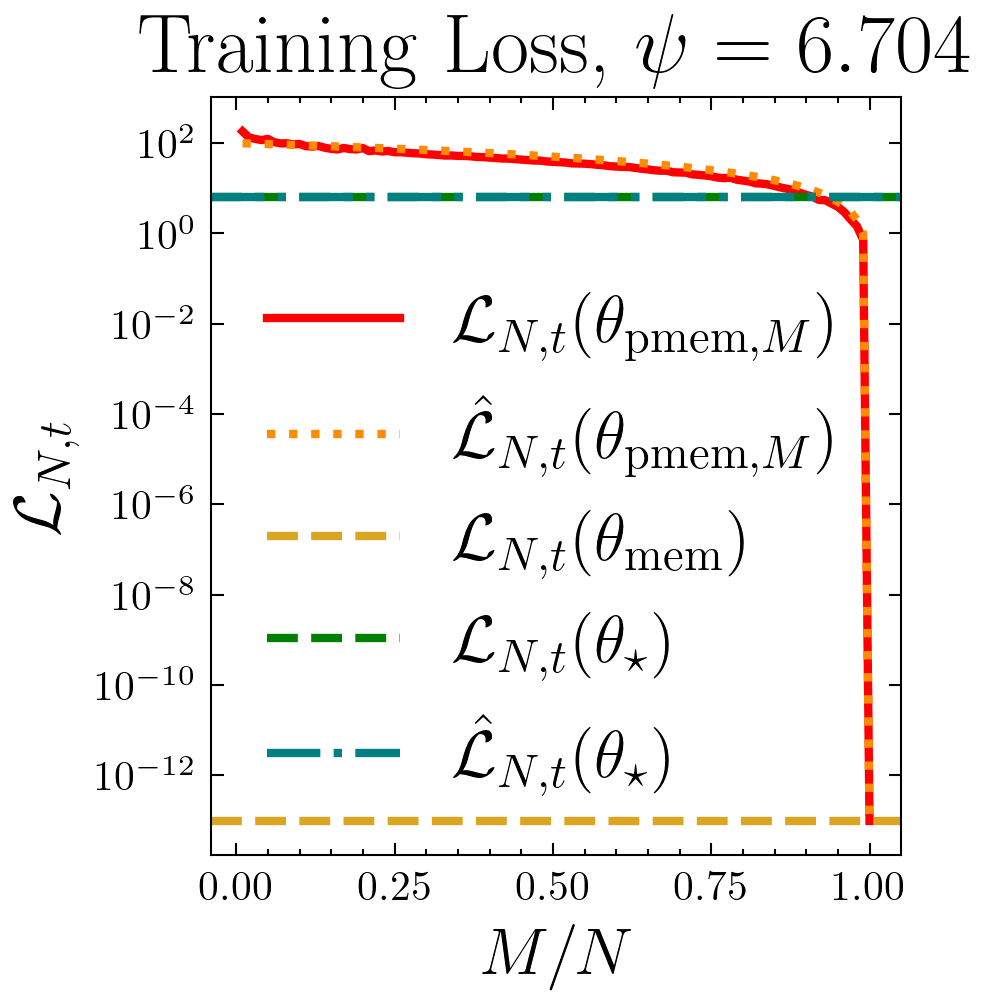

In [8]:
# pick some random guy


run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

# i = 20  # t = 0.201
i = 16  # t = 0.360
t = ts[i]
plt.figure(figsize=(3, 3), dpi=300)
plt.style.use("science")

x_train = num_components_to_train
x_eval = num_components_to_eval
y_train = [
    results["trained"][m]["train_loss"][i]["trained"] * eps_to_x0_weights(t) for m in x_train
]
y_pmem = [
    results["baselines"][m]["train_loss"][i]["partial_mem"] * eps_to_x0_weights(t) for m in x_eval
]
y_gt = results["baselines"][x_eval[0]]["train_loss"][i]["ground_truth"] * eps_to_x0_weights(t)
y_mem = results["baselines"][x_eval[0]]["train_loss"][i]["memorizing"] * eps_to_x0_weights(t)
y_pmem_approx = [2 * dim * gt_var * (1 - m / num_samples_train) + y_mem for m in x_eval]
y_gt_approx = y_mem + (results["baselines"][x_eval[0]]["train_loss"][i][
    "ground_truth_approx"
]) * eps_to_x0_weights(t)

plt.plot(
    [u / num_samples_train for u in x_eval],
    y_pmem,
    linewidth=2,
    color="red",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{pmem}, M})$",
)
plt.plot(
    [u / num_samples_train for u in x_eval],
    y_pmem_approx,
    linestyle=":",
    linewidth=2,
    color="darkorange",
    label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\mathrm{pmem}, M})$",
)

plt.axhline(
    y=y_mem,
    linestyle="--",
    linewidth=2,
    color="goldenrod",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{mem}})$",
)

plt.axhline(
    y=y_gt,
    linestyle="--",
    linewidth=2,
    color="green",
    label=r"$\mathcal{L}_{N, t}(\theta_{\star})$",
)
plt.axhline(
    y=y_gt_approx,
    linestyle="-.",
    linewidth=2,
    color="teal",
    label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\star})$",
)

plt.yscale("log")
plt.legend(fontsize=16)
plt.tight_layout()
plt.title(f"Training Loss, $\psi={snr(t):.3f}$", fontsize=20)
plt.xlabel(r"$M/N$", fontsize=16)
plt.ylabel(r"$\mathcal{L}_{N, t}$", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
print(get_tikz_code())
plt.show()


## Figure 2 (TODO: Replace When Figure Numbers are Set)

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{gray}{RGB}{128,128,128}

\begin{axis}[
tick pos=both,
title={Memorization Ratio},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=0.055, xmax=1.045,
xtick style={color=black},
xtick={0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={Ratio},
ymin=-0.05, ymax=1.05,
ytick style={color=black},
ytick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
yticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
}
]
\addplot [thick, blue, mark=*, mark size=3, mark options={soli

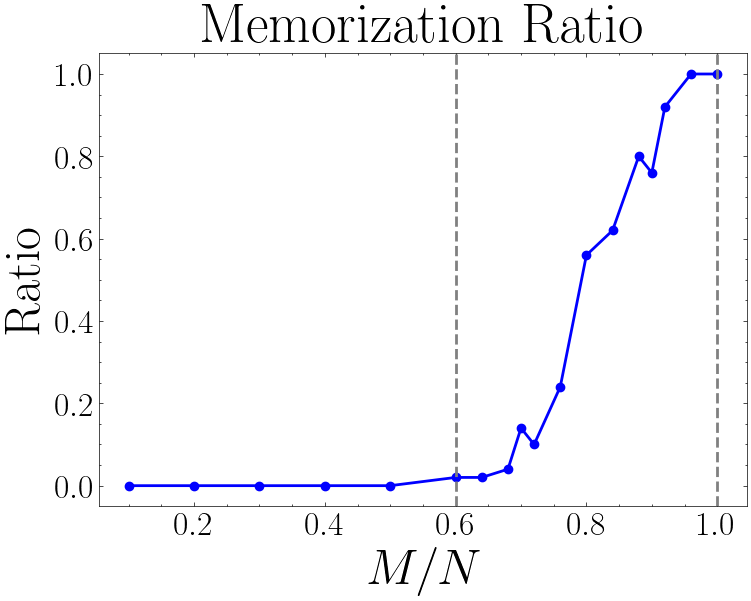

In [9]:
# pick some random guy
run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

plt.figure(figsize=(7, 5))
plt.style.use("science")

x_train = num_components_to_train
y_mem_ratio = [results["trained"][m]["memorization_ratio"] for m in x_train]

plt.plot(
    [u / num_samples_train for u in x_train],
    y_mem_ratio,
    marker="o",
    linewidth=2,
    color="blue",
    label=r"Trained Model",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT Start",
)
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT End",
)

# plt.legend(fontsize=30, frameon=True)
plt.tight_layout()
plt.title("Memorization Ratio", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"Ratio", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()

<>:93: SyntaxWarning: invalid escape sequence '\p'
<>:93: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_84146/883486639.py:93: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f"Training Loss, $\psi={snr(t):.3f}$", fontsize=40)


% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{goldenrod}{RGB}{218,165,32}
\definecolor{gray}{RGB}{128,128,128}
\definecolor{green}{RGB}{0,128,0}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(-0.055,0.02)},
  anchor=south west,
  draw=none
},
log basis y={10},
tick pos=both,
title={Training Loss, \(\displaystyle \psi=6.704\)},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=-0.0395, xmax=1.0495,
xtick style={color=black},
xtick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={\(\displaystyle \mathcal{L}_{N, t}\)},
ymin=1.54080320277688e-14, ymax=1055.2181377

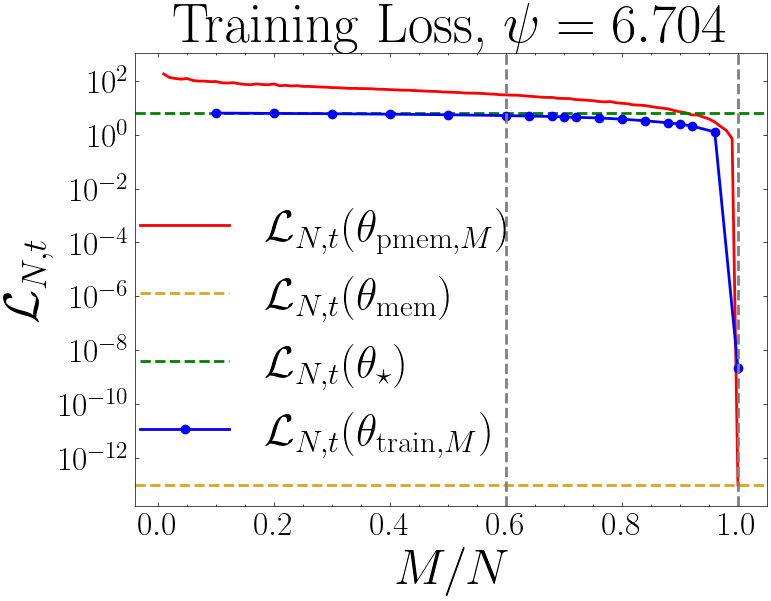

In [10]:
# pick some random guy
run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)
# i = 20  # t = 0.201
i = 16  # t = 0.360
t = ts[i]
plt.figure(figsize=(7, 5))
plt.style.use("science")

x_train = num_components_to_train
x_eval = num_components_to_eval
y_train = [
    results["trained"][m]["train_loss"][i]["trained"] * eps_to_x0_weights(t) for m in x_train
]
y_pmem = [
    results["baselines"][m]["train_loss"][i]["partial_mem"] * eps_to_x0_weights(t) for m in x_eval
]
y_gt = results["baselines"][x_eval[0]]["train_loss"][i]["ground_truth"] * eps_to_x0_weights(t)
y_mem = results["baselines"][x_eval[0]]["train_loss"][i]["memorizing"] * eps_to_x0_weights(t)
y_pmem_approx = [2 * dim * gt_var * (1 - m / num_samples_train) + y_mem for m in x_eval]
y_gt_approx = y_mem + (results["baselines"][x_eval[0]]["train_loss"][i][
    "ground_truth_approx"
] * eps_to_x0_weights(t))

plt.plot(
    [u / num_samples_train for u in x_eval],
    y_pmem,
    linewidth=2,
    color="red",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{pmem}, M})$",
)

plt.axhline(
    y=y_mem,
    linestyle="--",
    linewidth=2,
    color="goldenrod",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{mem}})$",
)

plt.axhline(
    y=y_gt,
    linestyle="--",
    linewidth=2,
    color="green",
    label=r"$\mathcal{L}_{N, t}(\theta_{\star})$",
)
plt.plot(
    [u / num_samples_train for u in x_train],
    y_train,
    marker="o",
    linewidth=2,
    color="blue",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{train}, M})$",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
)  # , label="PT Start")
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
)  # , label="PT End")

plt.yscale("log")
plt.legend(fontsize=32, loc="lower left", bbox_to_anchor=(-0.055, 0.02))
plt.tight_layout()
plt.title(f"Training Loss, $\psi={snr(t):.3f}$", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"$\mathcal{L}_{N, t}$", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()


<>:84: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_84146/395548189.py:84: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f"Test Loss, $\psi={snr(t):.3f}$", fontsize=40)


% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{goldenrod}{RGB}{218,165,32}
\definecolor{gray}{RGB}{128,128,128}
\definecolor{green}{RGB}{0,128,0}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0,0.05)},
  anchor=south west,
  draw=none
},
log basis y={10},
tick pos=both,
title={Test Loss, \(\displaystyle \psi=6.704\)},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=-0.0395, xmax=1.0495,
xtick style={color=black},
xtick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={\(\displaystyle \mathcal{L}_{t}\)},
ymin=5.49932303269927, ymax=215.804467612237,
ymode=log,

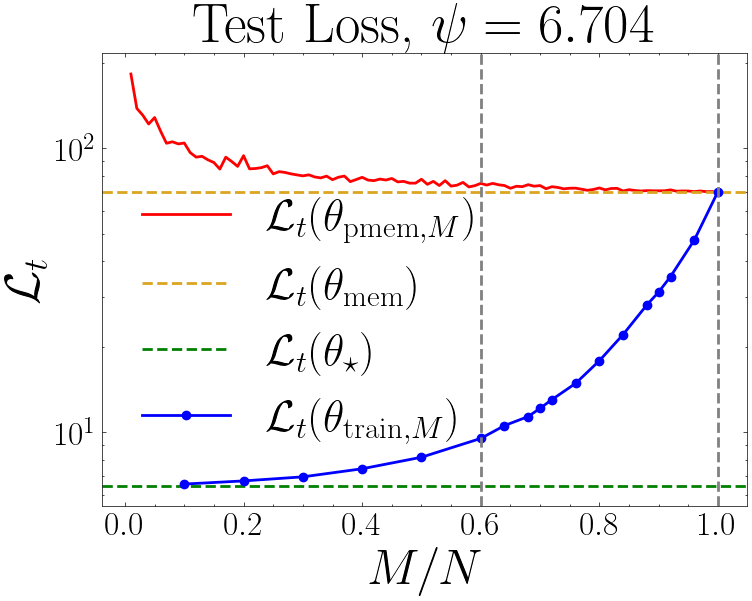

In [11]:
# pick some random guy
run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

# i = 20  # t = 0.201
i = 16  # t = 0.360
t = ts[i]
plt.figure(figsize=(7, 5))
plt.style.use("science")

x_train = num_components_to_train
x_eval = num_components_to_eval
y_train = [results["trained"][m]["val_loss"][i]["trained"] * eps_to_x0_weights(t) for m in x_train]
y_pmem = [
    results["baselines"][m]["val_loss"][i]["partial_mem"] * eps_to_x0_weights(t) for m in x_eval
]
y_gt = results["baselines"][x_eval[0]]["val_loss"][i]["ground_truth"] * eps_to_x0_weights(t)
y_mem = results["baselines"][x_eval[0]]["val_loss"][i]["memorizing"] * eps_to_x0_weights(t)

plt.plot(
    [u / num_samples_train for u in x_eval],
    y_pmem,
    linewidth=2,
    color="red",
    label=r"$\mathcal{L}_{t}(\theta_{\mathrm{pmem}, M})$",
)

plt.axhline(
    y=y_mem,
    linestyle="--",
    linewidth=2,
    color="goldenrod",
    label=r"$\mathcal{L}_{t}(\theta_{\mathrm{mem}})$",
)

plt.axhline(
    y=y_gt, linestyle="--", linewidth=2, color="green", label=r"$\mathcal{L}_{t}(\theta_{\star})$"
)
plt.plot(
    [u / num_samples_train for u in x_train],
    y_train,
    marker="o",
    linewidth=2,
    color="blue",
    label=r"$\mathcal{L}_{t}(\theta_{\mathrm{train}, M})$",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
)  # , label="PT Start")
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
)  # , label="PT End")

plt.yscale("log")
plt.legend(fontsize=32, frameon=False, loc="lower left", bbox_to_anchor=(0, 0.05))
plt.tight_layout()
plt.title(f"Test Loss, $\psi={snr(t):.3f}$", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"$\mathcal{L}_{t}$", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()


## Figure 3 (TODO: Replace When Figure Numbers are Set)

In [12]:
# Now solve this nonlinear linear regression

# First, group the runs by (n, d, k)
n_comp_train = dict()
n_comp_eval = dict()

mem_loss_data = dict()
gen_loss_data = dict()
gen_loss_approx = dict()
pmem_loss_data = dict()
pmem_loss_approx = dict()

mem_pt_start = dict()
mem_pt_mid = dict()
mem_pt_end = dict()

gt_var_data = dict()

for run_id in data:
    run_data = data[run_id]
    results = run_data["results"]
    config = run_data["config"]
    n = config["num_samples_train"]["value"]
    d = config["dim"]["value"]
    k = config["gt_num_components"]["value"]
    gt_var = config["gt_var_scale"]["value"]
    num_times = config["num_times"]["value"]

    n_comp_train[(n, d, k)] = config["num_components_to_train"]["value"]
    n_comp_eval[(n, d, k)] = config["num_components_to_evaluate"]["value"]

    gt_var_data[(n, d, k)] = gt_var

    m0 = n_comp_eval[(n, d, k)][0]

    mem_loss_data[(n, d, k)] = jnp.array(
        [
            results["baselines"][m0]["train_loss"][i]["memorizing"] * eps_to_x0_weights(ts[i])
            for i in range(num_times)
        ]
    )

    gen_loss_data[(n, d, k)] = jnp.array(
        [
            results["baselines"][m0]["train_loss"][i]["ground_truth"] * eps_to_x0_weights(ts[i])
            for i in range(num_times)
        ]
    )
    gen_loss_approx[(n, d, k)] = jnp.array(
        [
            results["baselines"][m0]["train_loss"][i]["ground_truth_approx"]
            * eps_to_x0_weights(ts[i])
            for i in range(num_times)
        ]
    )

    pmem_loss_data[(n, d, k)] = jnp.array(
        [
            [
                results["baselines"][m]["train_loss"][i]["partial_mem"] * eps_to_x0_weights(ts[i])
                for i in range(num_times)
            ]
            for m in n_comp_eval[(n, d, k)]
        ]
    )
    pmem_loss_approx[(n, d, k)] = jnp.array(
        [
            [
                2 * d * gt_var * (1 - (m / n)) + mem_loss_data[(n, d, k)][i]
                for i in range(num_times)
            ]
            for m in n_comp_eval[(n, d, k)]
        ]
    )

    mem_pt_start[(n, d, k)] = config["memorization_phase_transition_start"]["value"]
    mem_pt_end[(n, d, k)] = config["memorization_phase_transition_end"]["value"]
    mem_pt_mid[(n, d, k)] = min(
        n_comp_train[(n, d, k)],
        key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
    )

In [13]:
pmem_minus_gen_loss_data = dict()
pmem_minus_gen_loss_approx = dict()

mem_pt_start_over_n = dict()
mem_pt_mid_over_n = dict()
mem_pt_end_over_n = dict()
n_comp_train_over_n = dict()
n_comp_eval_over_n = dict()

keys_list = list(gen_loss_data.keys())

for (n, d, k) in keys_list:
    pmem_minus_gen_loss_data[(n, d, k)] = pmem_loss_data[(n, d, k)] - gen_loss_data[(n, d, k)][None, :]
    pmem_minus_gen_loss_approx[(n, d, k)] = pmem_loss_approx[(n, d, k)] - gen_loss_approx[(n, d, k)][None, :]

    mem_pt_start_over_n[(n, d, k)] = mem_pt_start[(n, d, k)] / n
    mem_pt_mid_over_n[(n, d, k)] = mem_pt_mid[(n, d, k)] / n
    mem_pt_end_over_n[(n, d, k)] = mem_pt_end[(n, d, k)] / n

    n_comp_train_over_n[(n, d, k)] = [x/n for x in n_comp_train[(n, d, k)]]
    n_comp_eval_over_n[(n, d, k)] = [x/n for x in n_comp_eval[(n, d, k)]]
    

In [14]:
# Now, normalize the stuff
from copy import deepcopy


def normalize_pmem_minus_gen_loss_map(pmem_minus_gen_loss_map: dict):
    normalized_pmem_minus_gen_loss_map = deepcopy(pmem_minus_gen_loss_map)
    for ndk in pmem_minus_gen_loss_map:
        for idx in range(num_times):
            min_pmem_minus_gen_loss = jnp.min(pmem_minus_gen_loss_map[ndk][:, idx])
            max_pmem_minus_gen_loss = jnp.max(pmem_minus_gen_loss_map[ndk][:, idx])
            normalized_pmem_minus_gen_loss_map[ndk] = (
                normalized_pmem_minus_gen_loss_map[ndk]
                .at[:, idx]
                .set(
                    (pmem_minus_gen_loss_map[ndk][:, idx] - min_pmem_minus_gen_loss)
                    / (max_pmem_minus_gen_loss - min_pmem_minus_gen_loss)
                )
            )
    return normalized_pmem_minus_gen_loss_map


normalized_pmem_minus_gen_loss_data = normalize_pmem_minus_gen_loss_map(pmem_minus_gen_loss_data)
normalized_pmem_minus_gen_loss_approx = normalize_pmem_minus_gen_loss_map(
    pmem_minus_gen_loss_approx
)

In [15]:
# Optimal, but slow algorithm


def find_best_m_setting_index(
    params: Dict[str, Array],
    pmem_minus_gen_loss_for_ndk: Array,  # Shape: (num_m_settings, num_times)
    m_for_ndk: Array,  # Shape: (num_m_settings,)
) -> Array:  # Returns i_min, a JAX scalar (0-D array) which is an *index*
    """
    Finds the index of the 'm' setting that minimizes the squared weighted loss.
    """
    w = params["w"]
    weighted_loss_sq = (
        w[None, :] * pmem_minus_gen_loss_for_ndk
    ) ** 2  # Shape: (num_m_settings, num_times)
    interior_func = jnp.sum(weighted_loss_sq, axis=-1)  # Shape: (num_m_settings,)
    i_min = jnp.argmin(interior_func)  # Shape: ()
    m_min = m_for_ndk[i_min]
    return m_min


def objective_one_ndk(
    params: Dict[str, Array],
    pmem_minus_gen_loss_for_ndk: Array,  # Shape: (num_m_settings, num_times)
    mem_pt_for_ndk: Array,  # Shape: (num_times,)
    m_for_ndk: Array,  # Shape: (num_m_settings,)
) -> Array:  # Returns a JAX scalar (sum of squared errors for the best 'm' setting)
    """
    Calculates the objective (sum of squared errors) for a single (n, d, k) configuration,
    using the best 'm' setting.
    """
    best_m_setting_idx = find_best_m_setting_index(
        params, pmem_minus_gen_loss_for_ndk, m_for_ndk
    )  # JAX scalar index
    diff_sq = (best_m_setting_idx - mem_pt_for_ndk) ** 2  # Shape: (num_times,)
    return jnp.sum(diff_sq)


def objective(
    params: Dict[str, Array],
    keys_list: list,  # List of (n,d,k) tuples, e.g., list(pmem_minus_gen_loss_approx.keys())
    pmem_minus_gen_loss_data: dict,  # Maps (n,d,k) to JAX arrays (pmem_minus_gen_loss_approx)
    mem_pt_data: dict,  # Maps (n,d,k) to JAX arrays (mem_pt_mid)
    m_for_ndk_data: dict,  # Maps (n,d,k) to JAX arrays (m_for_ndk)
) -> Array:  # Returns the mean objective over all (n,d,k) configurations
    """
    Calculates the mean objective across all (n, d, k) configurations.
    This function is designed to be JIT-compiled.
    """
    loss_terms = []
    # This loop over a Python list of keys is traceable by JAX if `keys_list`
    # is treated as a static argument (its value/structure doesn't change often).
    for n, d, k in keys_list:
        pmem_minus_gen_loss_for_ndk = pmem_minus_gen_loss_data[(n, d, k)]
        mem_pt_for_ndk = mem_pt_data[(n, d, k)]
        m_for_ndk = m_for_ndk_data[(n, d, k)]

        term = objective_one_ndk(params, pmem_minus_gen_loss_for_ndk, mem_pt_for_ndk, m_for_ndk)
        loss_terms.append(term)
    return jnp.mean(jnp.array(loss_terms))


In [16]:
# Fast continuous relaxation
def smoothed_objective_one_ndk(
    params: Dict[str, Array],
    pmem_minus_gen_loss_for_ndk: Array,  # Shape: (num_m_settings, num_times)
    mem_pt_for_ndk: Array,  # Shape: ()
    m_for_ndk: Array,  # Shape: (num_m_settings,)
    temperature: Array,  # Shape: ()
    sparsity_regularization: float,
    sparsity_eps: float,
    smoothness_regularization: float,
    debug: bool = False,
) -> Array | Tuple[Array, Dict[str, Array]]:
    """
    Calculates the objective (sum of squared errors) for a single (n, d, k) configuration,
    using the best 'm' setting.
    """
    w = params["w"]
    dots = jnp.sum(w[None, :] * pmem_minus_gen_loss_for_ndk, axis=-1)  # Shape: (num_m_settings,)
    p = jax.nn.softmax(-(dots**2) / temperature)  # Shape: (num_m_settings,)
    smoothed_m = jnp.sum(p * m_for_ndk)  # Shape: ()
    mse = (smoothed_m - mem_pt_for_ndk) ** 2  # Shape: ()
    # l4 = -jnp.sum(p ** 4) # Shape: ()
    entropy = -jnp.sum(p * jnp.log(p + sparsity_eps))  # Shape: ()
    smoothness = jnp.sum(jnp.square(w[1:] - w[:-1]))  # Shape: ()
    loss = mse + sparsity_regularization * entropy + smoothness_regularization * smoothness
    if debug:
        outputs = {
            "dots": dots,
            "p": p,
            "smoothed_m": smoothed_m,
            "mse": mse,
            "entropy": entropy,
            "smoothness": smoothness,
        }
        return loss, outputs
    else:
        return loss


def smoothed_objective(
    params: Dict[str, Array],
    keys_list: list,  # List of (n,d,k) tuples, e.g., list(pmem_minus_gen_loss_approx.keys())
    pmem_minus_gen_loss_data: dict,  # Maps (n,d,k) to JAX arrays (pmem_minus_gen_loss_approx)
    mem_pt_data: dict,  # Maps (n,d,k) to JAX arrays (mem_pt_mid)
    m_for_ndk_data: dict,  # Maps (n,d,k) to JAX arrays (m_for_ndk)
    temperature: Array,  # Shape: ()
    sparsity_regularization: float,
    sparsity_eps: float,
    smoothness_regularization: float,
    debug: bool = False,
) -> (
    Array | Tuple[Array, Dict[str, Array]]
):  # Returns the mean objective over all (n,d,k) configurations
    """
    Calculates the mean objective across all (n, d, k) configurations.
    This function is designed to be JIT-compiled.
    """
    loss_terms = []
    # This loop over a Python list of keys is traceable by JAX if `keys_list`
    # is treated as a static argument (its value/structure doesn't change often).
    for n, d, k in keys_list:
        pmem_minus_gen_loss_for_ndk = pmem_minus_gen_loss_data[(n, d, k)]
        mem_pt_for_ndk = mem_pt_data[(n, d, k)]

        term = smoothed_objective_one_ndk(
            params,
            pmem_minus_gen_loss_for_ndk,
            mem_pt_for_ndk,
            m_for_ndk_data[(n, d, k)],
            temperature,
            sparsity_regularization,
            sparsity_eps,
            smoothness_regularization,
            debug,
        )
        loss_terms.append(term)

    if debug:
        loss = jnp.array([term[0] for term in loss_terms])
        smoothed_m = jnp.stack([term[1]["smoothed_m"] for term in loss_terms])
        mse = jnp.stack([term[1]["mse"] for term in loss_terms])
        entropy = jnp.stack([term[1]["entropy"] for term in loss_terms])
        smoothness = jnp.stack([term[1]["smoothness"] for term in loss_terms])
        outputs = {
            "loss": loss,
            "smoothed_m": smoothed_m,
            "mse": mse,
            "entropy": entropy,
            "smoothness": smoothness,
        }
        return jnp.mean(loss), outputs

    else:
        loss = jnp.mean(jnp.array(loss_terms))
        return loss


In [17]:
from functools import partial
from scipy.optimize import minimize

import optax
from optax._src.linear_algebra import global_norm


def train_weights(
    init_params: Dict[str, Array],
    keys_list: list,
    pmem_minus_gen_loss_map: dict,
    mem_pt_map: dict,
    m_for_ndk_map: dict,
    temperature: float,
    sparsity_regularization: float,
    sparsity_eps: float,
    smoothness_regularization: float,
    num_iterations: int,
    learning_rate: float,
) -> Dict[str, Array]:
    """
    Trains the weights for a given set of parameters.
    """
    optimizer = optax.adam(learning_rate)
    opt_state = optimizer.init(init_params)

    objective_fn = partial(
        smoothed_objective,
        keys_list=keys_list,
        pmem_minus_gen_loss_data=pmem_minus_gen_loss_map,
        mem_pt_data=mem_pt_map,
        m_for_ndk_data={
            ndk: jnp.array(m_for_ndk_map[ndk], dtype=jnp.float32) for ndk in n_comp_train.keys()
        },
        temperature=jnp.array(temperature),
        sparsity_regularization=sparsity_regularization,
        sparsity_eps=sparsity_eps,
        smoothness_regularization=smoothness_regularization,
        debug=False,
    )
    grad_objective_fn = jax.grad(objective_fn)

    print("Initial objective: ", objective_fn(init_params))
    print("Initial grad: ", grad_objective_fn(init_params))

    @jax.jit
    def update_step(params, opt_state):
        loss_value, grads = jax.value_and_grad(objective_fn)(params)
        updates, new_opt_state = optimizer.update(grads, opt_state, params)
        new_params = optax.apply_updates(params, updates)
        return new_params, new_opt_state, loss_value

    # Run the optimization
    loss_history = []
    params = init_params
    for i in range(num_iterations):
        params, opt_state, loss = update_step(params, opt_state)
        loss_history.append(loss.item())

        if i % 1000 == 0:
            grad_norm = global_norm(grad_objective_fn(params))
            print(f"Iteration {i}, Loss: {loss}, grad_norm: {grad_norm}")

    # Final results
    print(f"Final params: {params}")
    print(f"Final loss: {objective_fn(params)}")
    print(f"Final grad norm: {global_norm(grad_objective_fn(params))}")

    # Plot the loss history
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(loss_history)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()

    return params


Initial objective:  0.0024555135
Initial grad:  {'w': Array([-0.02646653, -0.02342588, -0.02050923, -0.01771654, -0.01504784,
       -0.01250312, -0.01008238, -0.00778562, -0.00561285, -0.00356405,
       -0.00163924,  0.0001616 ,  0.00183845,  0.00339131,  0.00482021,
        0.00612511,  0.00730604,  0.00836299,  0.00929595,  0.01010493,
        0.01078994,  0.01135096,  0.011788  ,  0.01210106,  0.01229013,
        0.01235523], dtype=float32)}


Iteration 0, Loss: 0.0024555146228522062, grad_norm: 0.057952880859375
Iteration 1000, Loss: 0.00020694438717328012, grad_norm: 0.0001476485194871202
Iteration 2000, Loss: 0.00019097208860330284, grad_norm: 4.275477476767264e-05
Iteration 3000, Loss: 0.0001875336020020768, grad_norm: 1.7748856407706626e-05
Iteration 4000, Loss: 0.00018638929759617895, grad_norm: 8.45162503537722e-06
Iteration 5000, Loss: 0.00018592592095956206, grad_norm: 4.334768618718954e-06
Iteration 6000, Loss: 0.00018571560212876648, grad_norm: 2.325047262274893e-06
Iteration 7000, Loss: 0.0001856129674706608, grad_norm: 1.2830117839257582e-06
Iteration 8000, Loss: 0.00018556050781626254, grad_norm: 7.215684263428557e-07
Iteration 9000, Loss: 0.0001855327864177525, grad_norm: 4.1117365867648914e-07
Iteration 10000, Loss: 0.00018551782704889774, grad_norm: 2.3657294434542564e-07
Iteration 11000, Loss: 0.0001855095906648785, grad_norm: 1.3706650747735694e-07
Iteration 12000, Loss: 0.00018550506501924247, grad_norm: 

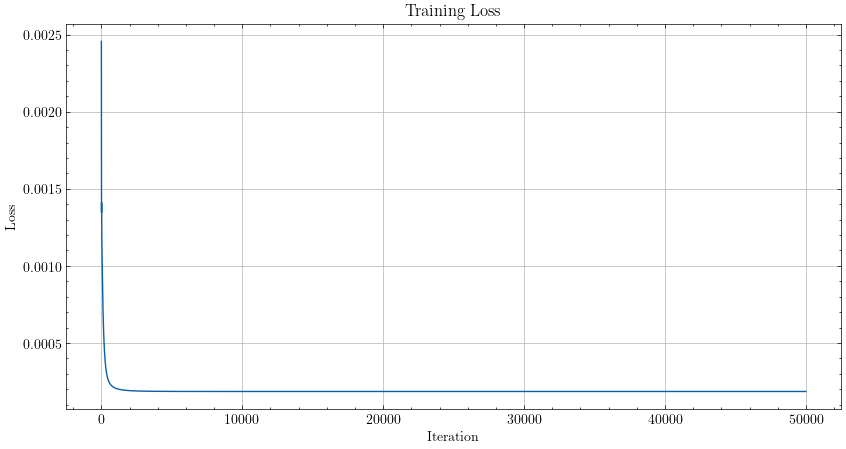

In [18]:
init_key = jax.random.PRNGKey(1)
train_test_split_key = jax.random.PRNGKey(2)
train_indices = jax.random.choice(
    train_test_split_key, jnp.arange(len(keys_list)), shape=(len(keys_list) - 5,), replace=False
)
train_keys_list = [keys_list[i] for i in train_indices]
eval_keys_list = [keys_list[i] for i in range(len(keys_list)) if i not in train_indices]

w_temperature = 1.0
sparsity_regularization = 1e-3
smoothness_regularization = 0
num_iterations = 50000
lr = 1e-3
eps = 1e-8

init_params = {"w": jnp.ones(num_times) / num_times}

params_approx = train_weights(
    init_params=init_params,
    keys_list=train_keys_list,
    pmem_minus_gen_loss_map=pmem_minus_gen_loss_approx,
    mem_pt_map=mem_pt_mid_over_n,
    m_for_ndk_map=n_comp_eval_over_n,
    temperature=w_temperature,
    sparsity_regularization=sparsity_regularization,
    sparsity_eps=eps,
    smoothness_regularization=smoothness_regularization,
    num_iterations=num_iterations,
    learning_rate=lr,
)

In [19]:
obj_values = smoothed_objective(
    params_approx,
    keys_list=eval_keys_list,
    pmem_minus_gen_loss_data=pmem_minus_gen_loss_approx,
    mem_pt_data=mem_pt_mid_over_n,
    m_for_ndk_data={
        ndk: jnp.array(n_comp_eval_over_n[ndk], dtype=jnp.float32) for ndk in n_comp_train.keys()
    },
    temperature=jnp.array(w_temperature),
    sparsity_regularization=sparsity_regularization,
    sparsity_eps=eps,
    smoothness_regularization=smoothness_regularization,
    debug=True,
)

print("Smoothed M:")
print(obj_values[1]["smoothed_m"])
print("Entropy:")
print(obj_values[1]["entropy"])
print("Smoothness:")
print(obj_values[1]["smoothness"])
print("Loss:")
print(obj_values[0])

Smoothed M:
[0.8 0.8 0.8 0.8 0.8]
Entropy:
[-0.000000e+00  2.140531e-08 -0.000000e+00 -0.000000e+00 -0.000000e+00]
Smoothness:
[0.08773312 0.08773312 0.08773312 0.08773312 0.08773312]
Loss:
8.888876e-06


% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{teal1293165}{RGB}{12,93,165}

\begin{axis}[
log basis x={10},
tick pos=both,
title={Loss Weighting},
x grid style={darkgray176},
xlabel={\(\displaystyle \psi\)},
xmin=0.000735795363068942, xmax=2722173.25256142,
xmode=log,
xtick style={color=black},
xtick={1e-06,0.0001,0.01,1,100,10000,1000000,100000000,10000000000},
xticklabels={
  \(\displaystyle {10^{-6}}\),
  \(\displaystyle {10^{-4}}\),
  \(\displaystyle {10^{-2}}\),
  \(\displaystyle {10^{0}}\),
  \(\displaystyle {10^{2}}\),
  \(\displaystyle {10^{4}}\),
  \(\displaystyle {10^{6}}\),
  \(\displaystyle {10^{8}}\),
  \(\displaystyle {10^{10}}\)
},
y grid style={darkgray176},
ylabel={\(\displaystyle \tilde{\lambda}\)},
ymin=0.152767486125231, ymax=0.907359131425619,
ytick style={color=black},
ytick={0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1},
yticklabels={
  \(\displaystyle {0.1}\),
  \(\displaystyle {0.2}\),
 

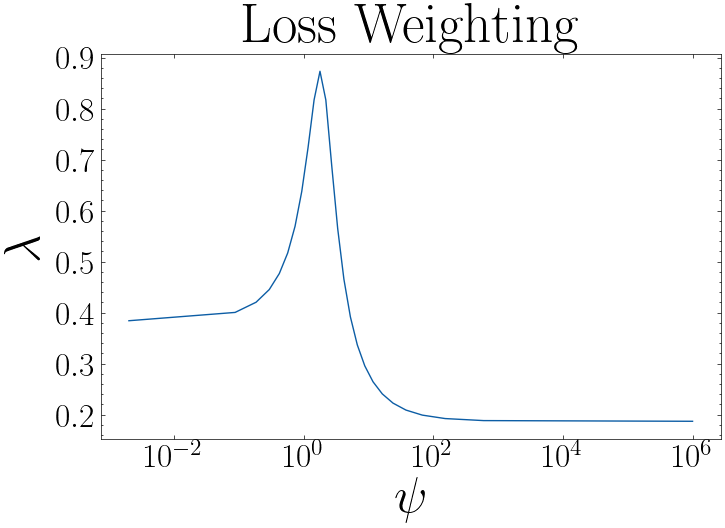

In [20]:
plt.figure(figsize=(8, 5))
plt.style.use("science")

plt.title("Loss Weighting", fontsize=40)
snr_t = jax.vmap(snr)(ts)
plt.plot(snr_t, params_approx["w"], label="Approximate Loss")
plt.xlabel(r"$\psi$", fontsize=36)
plt.ylabel(r"$\tilde{\lambda}$", fontsize=36)
plt.xscale("log")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}

\begin{axis}[
colorbar,
colorbar style={ytick={30,35,40,45,50,55,60},yticklabels={
  \(\displaystyle {30}\),
  \(\displaystyle {35}\),
  \(\displaystyle {40}\),
  \(\displaystyle {45}\),
  \(\displaystyle {50}\),
  \(\displaystyle {55}\),
  \(\displaystyle {60}\)
},ylabel={$d$}},
colormap/viridis,
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0.03,0.97)},
  anchor=north west,
  draw=none
},
point meta max=60,
point meta min=30,
tick pos=both,
title={Location of Phase Transition},
x grid style={darkgray176},
xlabel={\(\displaystyle N\)},
xmin=42.5, xmax=207.5,
xtick style={color=black},
xtick={40,60,80,100,120,140,160,180,200,220},
xticklabels={
  \(\displaystyle {40}\),
  \(\displaystyle {60}\),
  \(\displaystyle {80}\),
  \(\displaystyle {100}\),
  \(\displaystyle {120}\),
  \(\displaystyle {140}\),
  \(\displayst

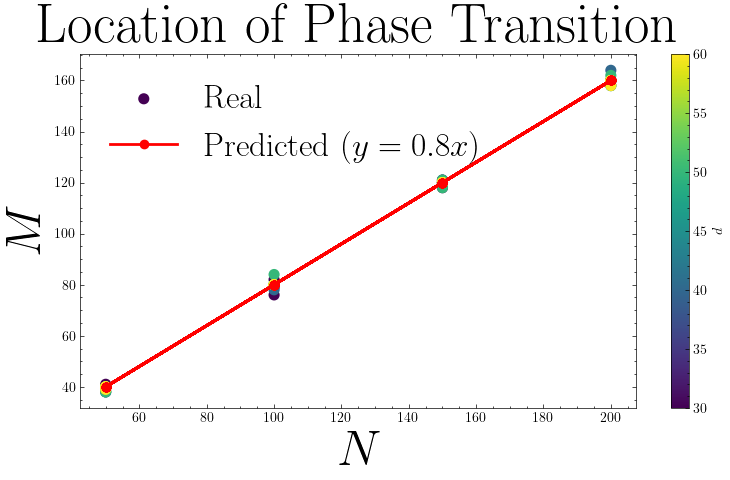

In [21]:
n_values = []
m_for_mem_values = []
m_for_mem_approx_values = []
d_values = []
obj_values = smoothed_objective(
    params_approx,
    keys_list=keys_list,
    pmem_minus_gen_loss_data=pmem_minus_gen_loss_approx,
    mem_pt_data=mem_pt_mid_over_n,
    m_for_ndk_data={
        ndk: jnp.array(n_comp_eval_over_n[ndk], dtype=jnp.float32) for ndk in n_comp_train.keys()
    },
    temperature=jnp.array(w_temperature),
    sparsity_regularization=sparsity_regularization,
    sparsity_eps=eps,
    smoothness_regularization=smoothness_regularization,
    debug=True,
)
for i, (n, d, k) in enumerate(keys_list):
    n_values.append(n)
    m_for_mem_values.append(mem_pt_mid[(n, d, k)])
    m_for_mem_approx_values.append(obj_values[1]["smoothed_m"][i] * n)
    d_values.append(d)

plt.figure(figsize=(8, 5))
plt.style.use("science")

plt.title("Location of Phase Transition", fontsize=40)
plt.xlabel(r"$N$", fontsize=36)
plt.ylabel(r"$M$", fontsize=36)
plt.scatter(n_values, m_for_mem_values, c=d_values, marker="o", linewidth=2, label=r"Real")
plt.plot(
    n_values,
    m_for_mem_approx_values,
    marker="o",
    linewidth=2,
    color="red",
    label=r"Predicted ($y = 0.8x$)",
)
cbar = plt.colorbar(label=r"$d$")
plt.legend(fontsize=24)
plt.tight_layout()
print(get_tikz_code())
plt.show()

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{darkorange2551490}{RGB}{255,149,0}
\definecolor{limegreen018569}{RGB}{0,185,69}
\definecolor{orangered255440}{RGB}{255,44,0}
\definecolor{teal1293165}{RGB}{12,93,165}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0.03,0.97)},
  anchor=north west,
  draw=none
},
log basis y={10},
tick pos=both,
title={Relative Error of Generalizing Denoiser Loss Approximation},
x grid style={darkgray176},
xlabel={\(\displaystyle t\)},
xmin=-0.0489000005938578, xmax=1.04890001351596,
xtick style={color=black},
xtick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={dark

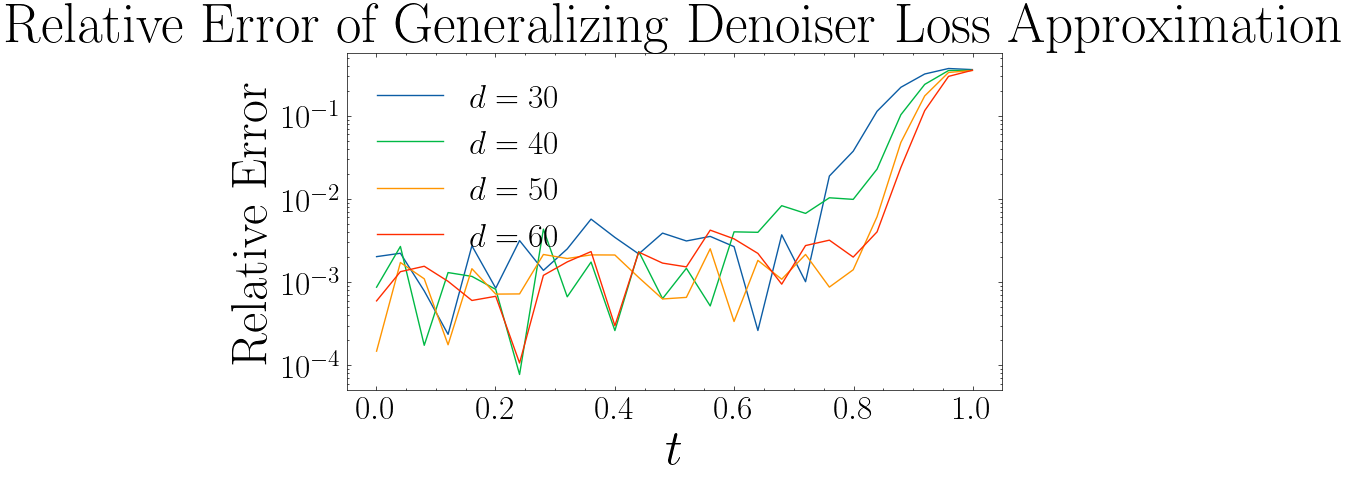

In [22]:
# Percent error plots

# Generalizing denoiser 
n_max = max(x[0] for x in keys_list)
k_max = max(x[2] for x in keys_list)
ds = sorted(list(set(x[1] for x in keys_list)))

plt.figure(figsize=(8, 5))
plt.style.use("science")
for d in ds:
    x = ts 
    y = [jnp.abs((gen_loss_approx[(n_max, d, k_max)][i] - gen_loss_data[(n_max, d, k)][i]) / (gen_loss_approx[(n_max, d, k_max)][i])) for i in range(len(ts))]
    plt.plot(x, y, label=f"$d={d}$")
plt.title("Relative Error of Generalizing Denoiser Loss Approximation", fontsize=40)
plt.xlabel("$t$", fontsize=36)
plt.ylabel("Relative Error", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
plt.yscale("log")
plt.tight_layout()
print(get_tikz_code())
plt.show()




% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{crimson2143940}{RGB}{214,39,40}
\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{darkorange25512714}{RGB}{255,127,14}
\definecolor{forestgreen4416044}{RGB}{44,160,44}
\definecolor{steelblue31119180}{RGB}{31,119,180}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0.5,0.09)},
  anchor=south,
  draw=none
},
tick pos=both,
title={Relative Error of Partial Memorizing Denoiser Loss Approximation},
x grid style={darkgray176},
xlabel={\(\displaystyle t\)},
xmin=-0.0489000005938578, xmax=1.04890001351596,
xtick style={color=black},
xtick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray1

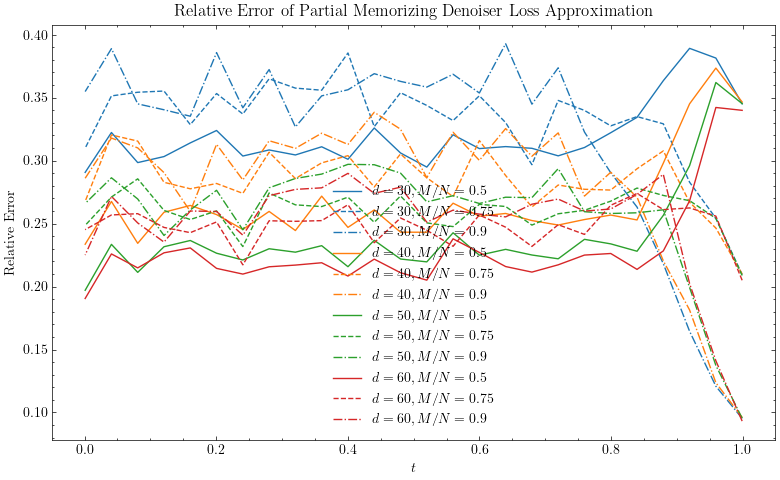

In [23]:
# Partial memorizing denoiser 
n_max = max(x[0] for x in keys_list)
k_max = max(x[2] for x in keys_list)
ds = sorted(list(set(x[1] for x in keys_list)))

plt.figure(figsize=(8, 5))
plt.style.use("science")
colors = plt.cm.tab10(range(len(ds)))  # Get distinct colors for each d
for d_idx, d in enumerate(ds):
    ms_total = n_comp_eval[(n_max, d, k_max)]
    ms_indices = [-1 + len(ms_total) // 2, -1 + 3 * len(ms_total) // 4, 2 + 7 * len(ms_total) // 8]
    x = ts 
    line_styles = ['-', '--', '-.']
    for i, m_index in enumerate(ms_indices):
        y = [jnp.abs((pmem_loss_approx[(n_max, d, k_max)][m_index, i] - pmem_loss_data[(n_max, d, k_max)][m_index, i]) / (pmem_loss_approx[(n_max, d, k_max)][m_index, i])) for i in range(len(ts))]
        plt.plot(x, y, linestyle=line_styles[i % len(line_styles)], color=colors[d_idx], label=f"$d={d}, M/N={ms_total[m_index] / n_max}$")
plt.title("Relative Error of Partial Memorizing Denoiser Loss Approximation")
plt.xlabel("$t$")
plt.ylabel("Relative Error")
plt.xticks()
plt.yticks()
plt.legend()
#plt.yscale("log")
plt.tight_layout()
print(get_tikz_code())
plt.show()

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{crimson2143940}{RGB}{214,39,40}
\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{darkorange25512714}{RGB}{255,127,14}
\definecolor{forestgreen4416044}{RGB}{44,160,44}
\definecolor{steelblue31119180}{RGB}{31,119,180}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0.5,0.09)},
  anchor=south,
  draw=none
},
tick pos=both,
title={Relative Error of Partial Memorizing Denoiser Loss Approximation},
x grid style={darkgray176},
xlabel={\(\displaystyle t\)},
xmin=-0.0489000005938578, xmax=1.04890001351596,
xtick style={color=black},
xtick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray1

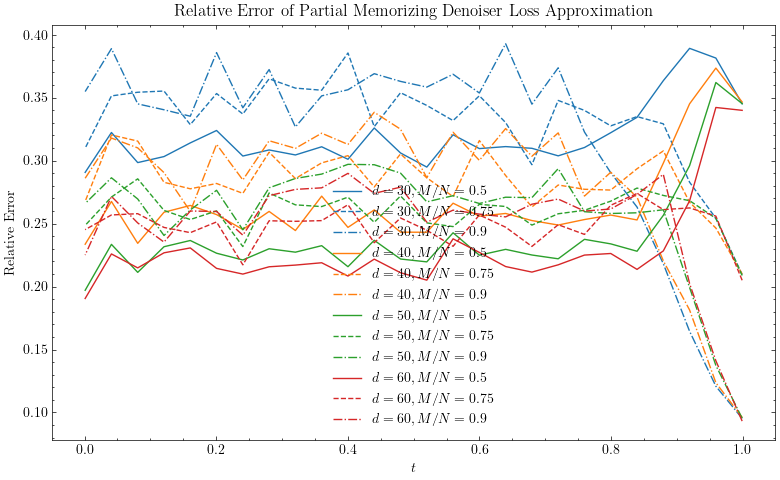

In [24]:
# Partial memorizing denoiser 
n_max = max(x[0] for x in keys_list)
k_max = max(x[2] for x in keys_list)
ds = sorted(list(set(x[1] for x in keys_list)))

plt.figure(figsize=(8, 5))
plt.style.use("science")
colors = plt.cm.tab10(range(len(ds)))  # Get distinct colors for each d
for d_idx, d in enumerate(ds):
    ms_total = n_comp_eval[(n_max, d, k_max)]
    ms_indices = [-1 + len(ms_total) // 2, -1 + 3 * len(ms_total) // 4, 2 + 7 * len(ms_total) // 8]
    x = ts 
    line_styles = ['-', '--', '-.']
    for i, m_index in enumerate(ms_indices):
        y = [jnp.abs((pmem_loss_approx[(n_max, d, k_max)][m_index, i] - pmem_loss_data[(n_max, d, k_max)][m_index, i]) / (pmem_loss_approx[(n_max, d, k_max)][m_index, i])) for i in range(len(ts))]
        plt.plot(x, y, linestyle=line_styles[i % len(line_styles)], color=colors[d_idx], label=f"$d={d}, M/N={ms_total[m_index] / n_max}$")
plt.title("Relative Error of Partial Memorizing Denoiser Loss Approximation")
plt.xlabel("$t$")
plt.ylabel("Relative Error")
plt.xticks()
plt.yticks()
plt.legend()
#plt.yscale("log")
plt.tight_layout()
print(get_tikz_code())
plt.show()

<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_84146/1569472230.py:73: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f"Training Loss, $\psi={snr(ts[t_idx]):.3f}$", fontsize=40)


% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{goldenrod}{RGB}{218,165,32}
\definecolor{gray}{RGB}{128,128,128}
\definecolor{green}{RGB}{0,128,0}

\begin{axis}[
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(-0.055,0.02)},
  anchor=south west,
  draw=none
},
tick pos=both,
title={Training Loss, \(\displaystyle \psi=6.704\)},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=-0.0395, xmax=1.0495,
xtick style={color=black},
xtick={-0.2,0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={\(\displaystyle \mathcal{L}_{N, t}\)},
ymin=-9.05853424072256, ymax=190.229219055176,
ytick style={co

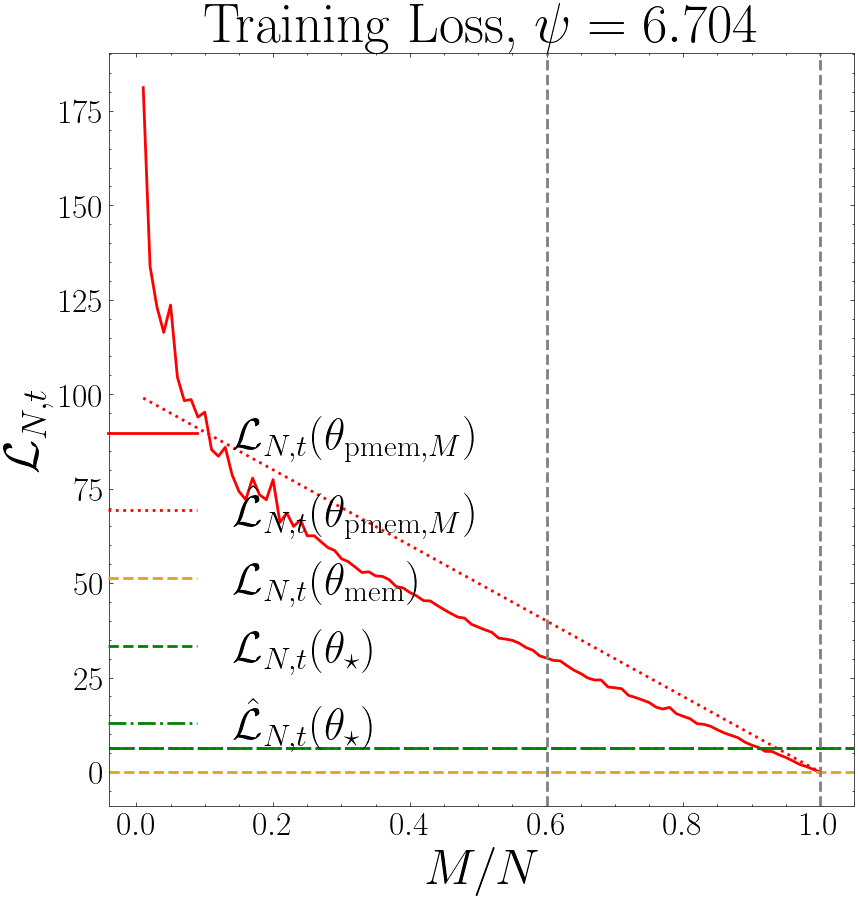

In [25]:
# n_max = max(x[0] for x in keys_list)
# k_max = max(x[2] for x in keys_list)
# ds = sorted(list(set(x[1] for x in keys_list)))
n_max = 200
d = 50
k_max = 12

t_idx = 16

x_train = n_comp_train[(n_max, d, k_max)]
x_eval = n_comp_eval[(n_max, d, k_max)]
y_pmem = pmem_loss_data[(n_max, d, k_max)][:, t_idx]
y_gt = gen_loss_data[(n_max, d, k_max)][t_idx]
y_mem = pmem_loss_data[(n_max, d, k_max)][-1, t_idx]
y_pmem_approx = pmem_loss_approx[(n_max, d, k_max)][:, t_idx]
y_gt_approx = gen_loss_approx[(n_max, d, k_max)][t_idx]
plt.figure(figsize=(8, 8))
plt.plot(
   n_comp_eval_over_n[(n_max, d, k_max)],
    y_pmem,
    linewidth=2,
    color="red",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{pmem}, M})$",
)
plt.plot(
   n_comp_eval_over_n[(n_max, d, k_max)],
    y_pmem_approx,
    linewidth=2,
    color="red",
    linestyle=":",
    label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\mathrm{pmem}, M})$",
)

plt.axhline(
    y=y_mem,
    linestyle="--",
    linewidth=2,
    color="goldenrod",
    label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{mem}})$",
)

plt.axhline(
    y=y_gt,
    linestyle="--",
    linewidth=2,
    color="green",
    label=r"$\mathcal{L}_{N, t}(\theta_{\star})$",
)

plt.axhline(
    y=y_gt_approx,
    linestyle="-.",
    linewidth=2,
    color="green",
    label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\star})$",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
)  # , label="PT Start")
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
)  # , label="PT End")

#plt.yscale("log")
plt.legend(fontsize=32, loc="lower left", bbox_to_anchor=(-0.055, 0.02))
plt.tight_layout()
plt.title(f"Training Loss, $\psi={snr(ts[t_idx]):.3f}$", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"$\mathcal{L}_{N, t}$", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()


## Figure 4 (TODO: Replace When Figure Numbers are Set)

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{gray}{RGB}{128,128,128}

\begin{axis}[
tick pos=both,
title={Learned Variance},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=0.055, xmax=1.045,
xtick style={color=black},
xtick={0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={\(\displaystyle \sigma^{2}\)},
ymin=-0.0442193857557533, ymax=0.928607118090594,
ytick style={color=black},
ytick={-0.2,0,0.2,0.4,0.6,0.8,1},
yticklabels={
  \(\displaystyle {\ensuremath{-}0.2}\),
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\)
}
]
\addplot [thick, blue, mark=*, mark size=3, m

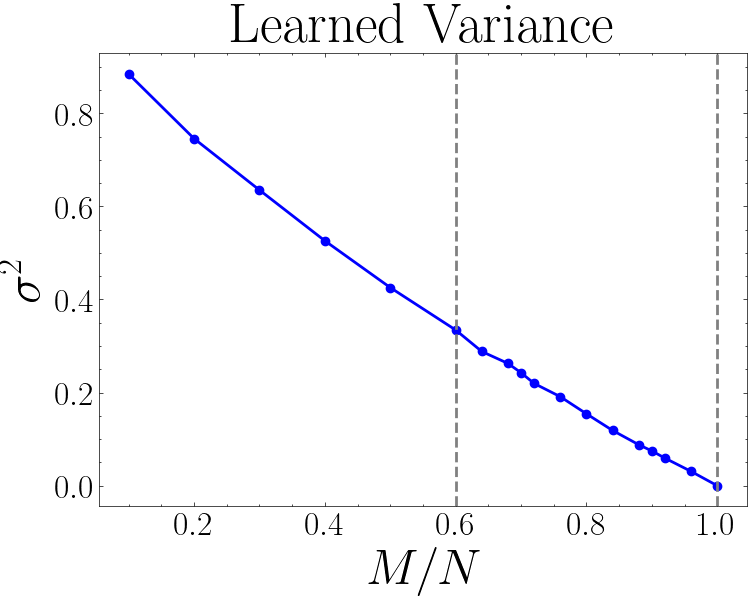

In [26]:
# pick some random guy
run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

plt.figure(figsize=(7, 5))
plt.style.use("science")

x_train = num_components_to_train
y_mem_ratio = [results["trained"][m]["variance"] for m in x_train]

plt.plot(
    [u / num_samples_train for u in x_train],
    y_mem_ratio,
    marker="o",
    linewidth=2,
    color="blue",
    label=r"Trained Model",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT Start",
)
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT End",
)

# plt.legend(fontsize=30, frameon=True)
plt.tight_layout()
plt.title("Learned Variance", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"$\sigma^{2}$", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()


% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{gray}{RGB}{128,128,128}

\begin{axis}[
tick pos=both,
title={Dist. to Nearest Sample},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=0.055, xmax=1.045,
xtick style={color=black},
xtick={0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={Distance},
ymin=-0.225098208926829, ymax=4.72782559983043,
ytick style={color=black},
ytick={-1,0,1,2,3,4,5},
yticklabels={
  \(\displaystyle {\ensuremath{-}1}\),
  \(\displaystyle {0}\),
  \(\displaystyle {1}\),
  \(\displaystyle {2}\),
  \(\displaystyle {3}\),
  \(\displaystyle {4}\),
  \(\displaystyle {5}\)
}
]
\addplot [thick, blue, mark=*, mark size=3, mark options={solid}]
table {%
0.1 4.502

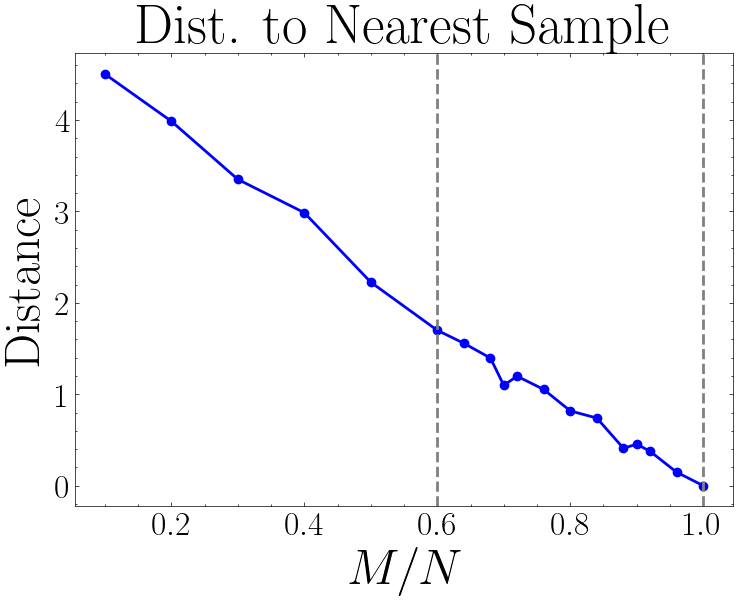

In [27]:
# pick some random guy
run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

plt.figure(figsize=(7, 5))
plt.style.use("science")

x_train = num_components_to_train
y = [results["trained"][m]["avg_distance_to_nearest_sample"] for m in x_train]

plt.plot(
    [u / num_samples_train for u in x_train],
    y,
    marker="o",
    linewidth=2,
    color="blue",
    label=r"Trained Model",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT Start",
)
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT End",
)

# plt.legend(fontsize=30, frameon=True)
plt.tight_layout()
plt.title(label="Dist. to Nearest Sample", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"Distance", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()


50 200 12
% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{gray}{RGB}{128,128,128}

\begin{axis}[
tick pos=both,
title={Dist. to Nearest True Mean},
x grid style={darkgray176},
xlabel={\(\displaystyle M/N\)},
xmin=0.055, xmax=1.045,
xtick style={color=black},
xtick={0,0.2,0.4,0.6,0.8,1,1.2},
xticklabels={
  \(\displaystyle {0.0}\),
  \(\displaystyle {0.2}\),
  \(\displaystyle {0.4}\),
  \(\displaystyle {0.6}\),
  \(\displaystyle {0.8}\),
  \(\displaystyle {1.0}\),
  \(\displaystyle {1.2}\)
},
y grid style={darkgray176},
ylabel={Distance},
ymin=3.38363699913025, ymax=7.19258065223694,
ytick style={color=black},
ytick={3,3.5,4,4.5,5,5.5,6,6.5,7,7.5},
yticklabels={
  \(\displaystyle {3.0}\),
  \(\displaystyle {3.5}\),
  \(\displaystyle {4.0}\),
  \(\displaystyle {4.5}\),
  \(\displaystyle {5.0}\),
  \(\displaystyle {5.5}\),
  \(\displaystyle {6.0}\),
  \(\displaystyle {6.5}\),
  \(\displaystyle {7.0}\),
  \(\di

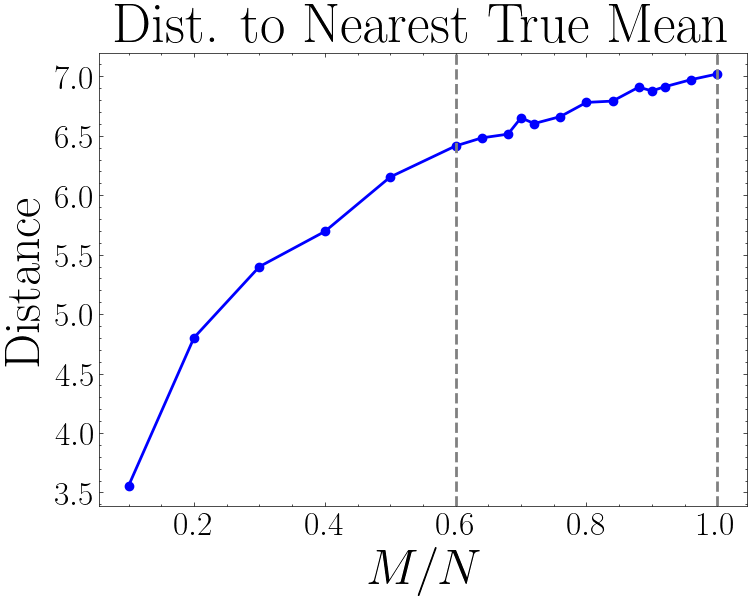

In [28]:
# pick some random guy
run_id = list(data.keys())[46]
run_data = data[run_id]
results = run_data["results"]
config = run_data["config"]

dim = config["dim"]["value"]
gt_var = config["gt_var_scale"]["value"]
num_samples_train = config["num_samples_train"]["value"]
t_min = config["t_min"]["value"]
t_max = config["t_max"]["value"]
num_times = config["num_times"]["value"]
num_gt_components = config["gt_num_components"]["value"]
num_components_to_train = sorted(config["num_components_to_train"]["value"])
num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])
print(dim, num_samples_train, num_gt_components)

memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
memorization_phase_transition_mid = min(
    num_components_to_train,
    key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
)

ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

plt.figure(figsize=(7, 5))
plt.style.use("science")

x_train = num_components_to_train
y = [results["trained"][m]["avg_distance_to_nearest_true_mean"] for m in x_train]

plt.plot(
    [u / num_samples_train for u in x_train],
    y,
    marker="o",
    linewidth=2,
    color="blue",
    label=r"Trained Model",
)
plt.axvline(
    x=memorization_phase_transition_start / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT Start",
)
plt.axvline(
    x=memorization_phase_transition_end / num_samples_train,
    linestyle="--",
    linewidth=2,
    color="gray",
    label="PT End",
)

# plt.legend(fontsize=30, frameon=True)
plt.tight_layout()
plt.title("Dist. to Nearest True Mean", fontsize=40)
plt.xlabel(r"$M/N$", fontsize=36)
plt.ylabel(r"Distance", fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
print(get_tikz_code())
plt.show()


## Generic Analysis for WandB

In [29]:
data_analysis_wandb_run_group = wandb_run_group + "_data_analysis"
wandb_api = wandb.Api()
for run_id in data:
    run_data = data[run_id]
    results = run_data["results"]
    config = run_data["config"]

    experiment_name = config["experiment_name"]["value"] + "_approx_plots"
    if not check_run_exists(wandb_api, WANDB_TEAM, WANDB_PROJECT, experiment_name):
        summary_logger = wandb.init(
            project=WANDB_PROJECT,
            entity=WANDB_TEAM,
            name=experiment_name,
            group=data_analysis_wandb_run_group,
        )

        dim = config["dim"]["value"]
        gt_var = config["gt_var_scale"]["value"]
        num_samples_train = config["num_samples_train"]["value"]
        t_min = config["t_min"]["value"]
        t_max = config["t_max"]["value"]
        num_times = config["num_times"]["value"]
        num_gt_components = config["gt_num_components"]["value"]
        num_components_to_train = sorted(config["num_components_to_train"]["value"])
        num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

        memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
        memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
        memorization_phase_transition_mid = min(
            num_components_to_train,
            key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
        )

        ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

        for i, t in enumerate(ts):
            plt.figure(figsize=(12, 6))
            plt.style.use("science")

            x_train = num_components_to_train
            x_eval = num_components_to_eval
            y_train = [
                results["trained"][m]["train_loss"][i]["trained"] * eps_to_x0_weights(t)
                for m in x_train
            ]
            y_pmem = [
                results["baselines"][m]["train_loss"][i]["partial_mem"] * eps_to_x0_weights(t)
                for m in x_eval
            ]
            y_gt = results["baselines"][x_eval[0]]["train_loss"][i][
                "ground_truth"
            ] * eps_to_x0_weights(t)
            y_mem = results["baselines"][x_eval[0]]["train_loss"][i][
                "memorizing"
            ] * eps_to_x0_weights(t)
            y_pmem_approx = [2 * dim * gt_var * (1 - m / num_samples_train) for m in x_eval]
            y_gt_approx = results["baselines"][x_eval[0]]["train_loss"][i][
                "ground_truth_approx"
            ] * eps_to_x0_weights(t)

            plt.plot(
                x_eval,
                y_pmem,
                marker="o",
                linewidth=2,
                color="red",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{pmem}, M})$",
            )
            plt.plot(
                x_eval,
                y_pmem_approx,
                marker="o",
                linewidth=2,
                color="orange",
                label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\mathrm{pmem}, M})$",
            )

            plt.axhline(
                y=y_gt,
                linestyle="--",
                linewidth=2,
                color="green",
                label=r"$\mathcal{L}_{N, t}(\theta_{\star})$",
            )

            plt.axhline(
                y=y_gt_approx,
                linestyle="--",
                linewidth=2,
                color="lime",
                label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\star})$",
            )

            plt.axhline(
                y=y_mem,
                linestyle="--",
                linewidth=2,
                color="red",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{mem}})$",
            )

            plt.yscale("log")
            plt.legend(fontsize=24)
            plt.tight_layout()
            plt.title(f"Training Loss, $t={t:.3f}$", fontsize=32)
            plt.xlabel("Number of Components", fontsize=28)
            plt.ylabel("Loss", fontsize=28)
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)
            save_path = (
                data_analysis_folder
                / WANDB_TEAM
                / WANDB_PROJECT
                / (config["experiment_name"]["value"] + "_approx_plots")
                / (f"train_loss_t={t:.3f}".replace(".", "_") + ".png")
            )
            save_path.parent.mkdir(parents=True, exist_ok=True)
            plt.savefig(save_path)
            summary_logger.log({f"train_loss/t={t:.3f}": wandb.Image(str(save_path))}, step=0)
            plt.close()

        summary_logger.finish()


wandb: Currently logged in as: druvpai to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/tmp/ipykernel_84146/2654557229.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))
/tmp/ipykernel_84146/2654557229.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))
/tmp/ipykernel_84146/2654557229.py:309: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

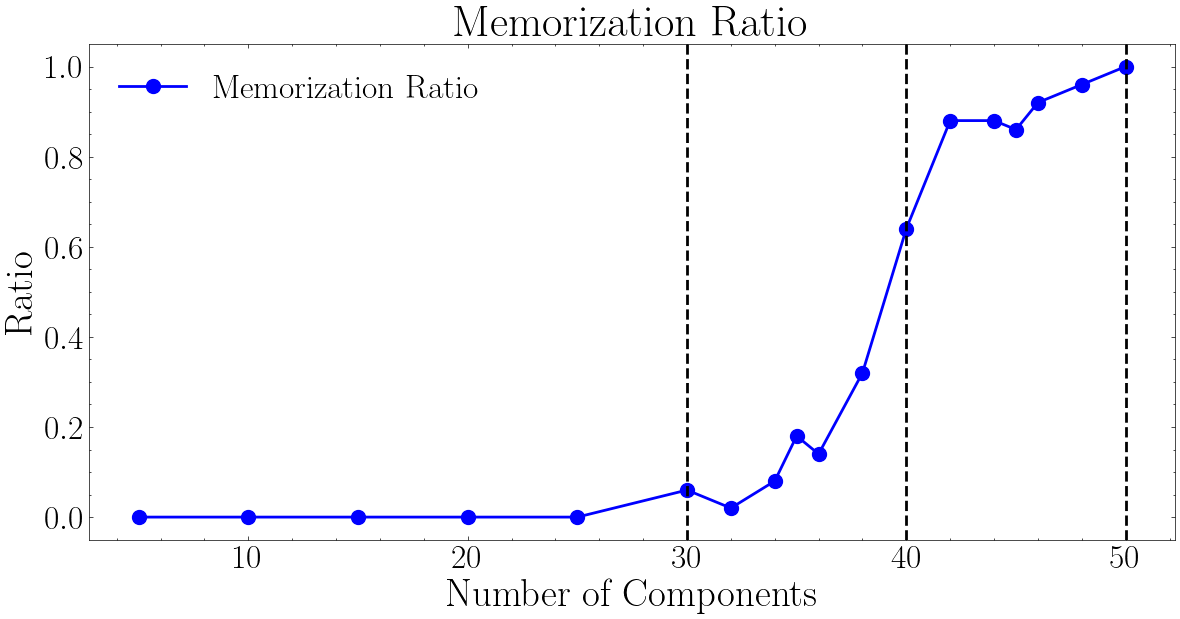

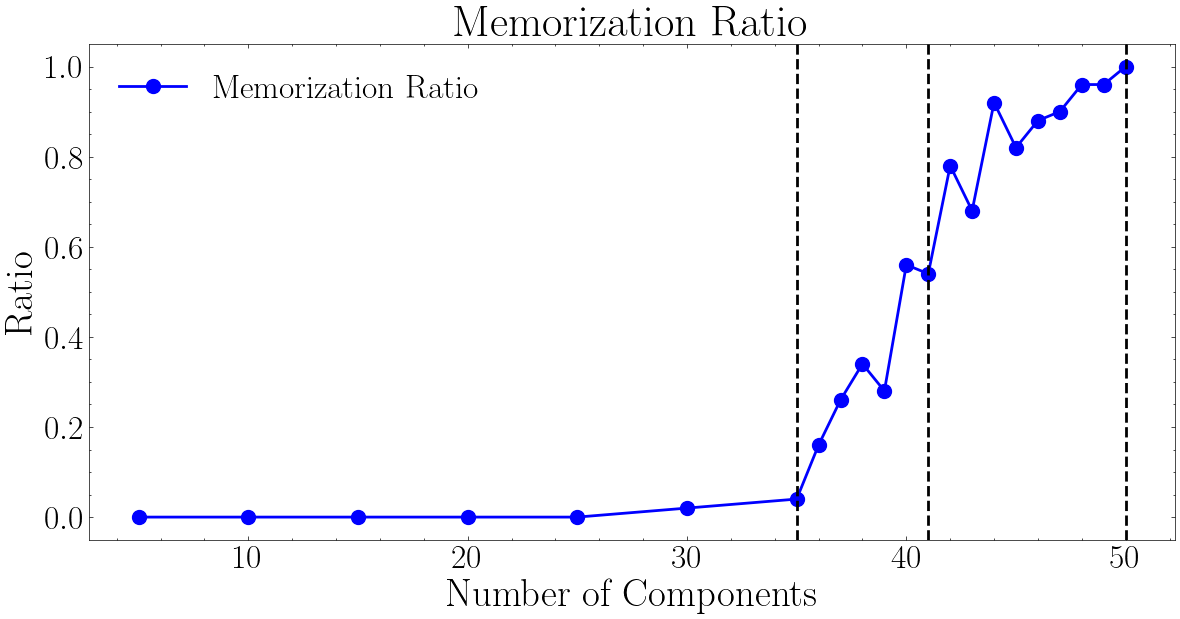

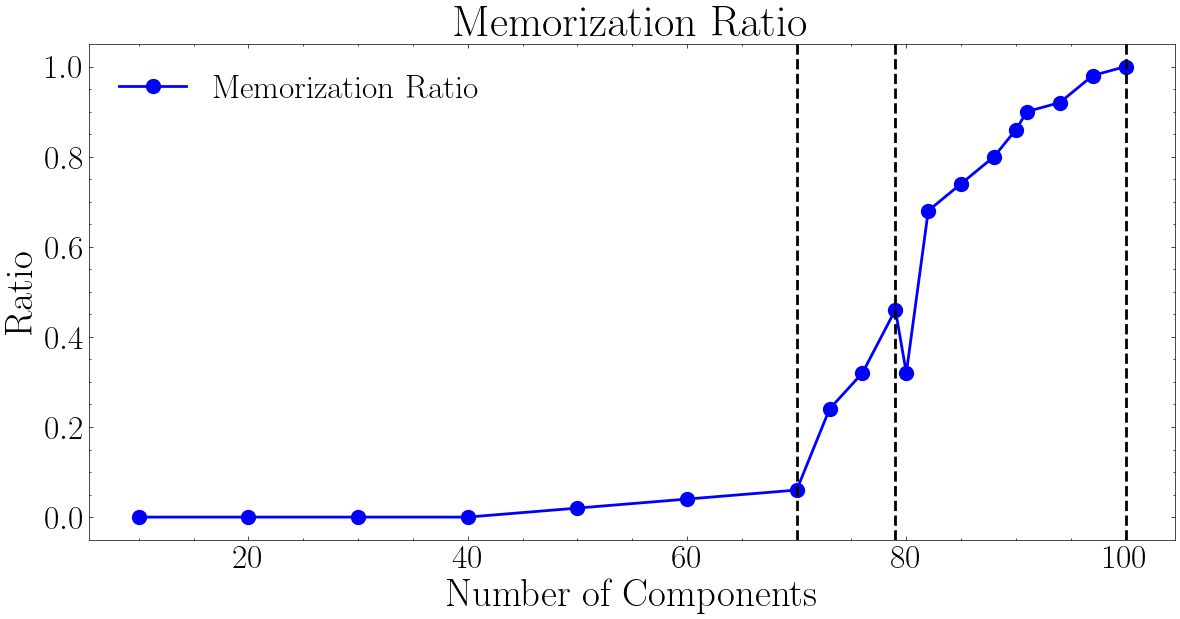

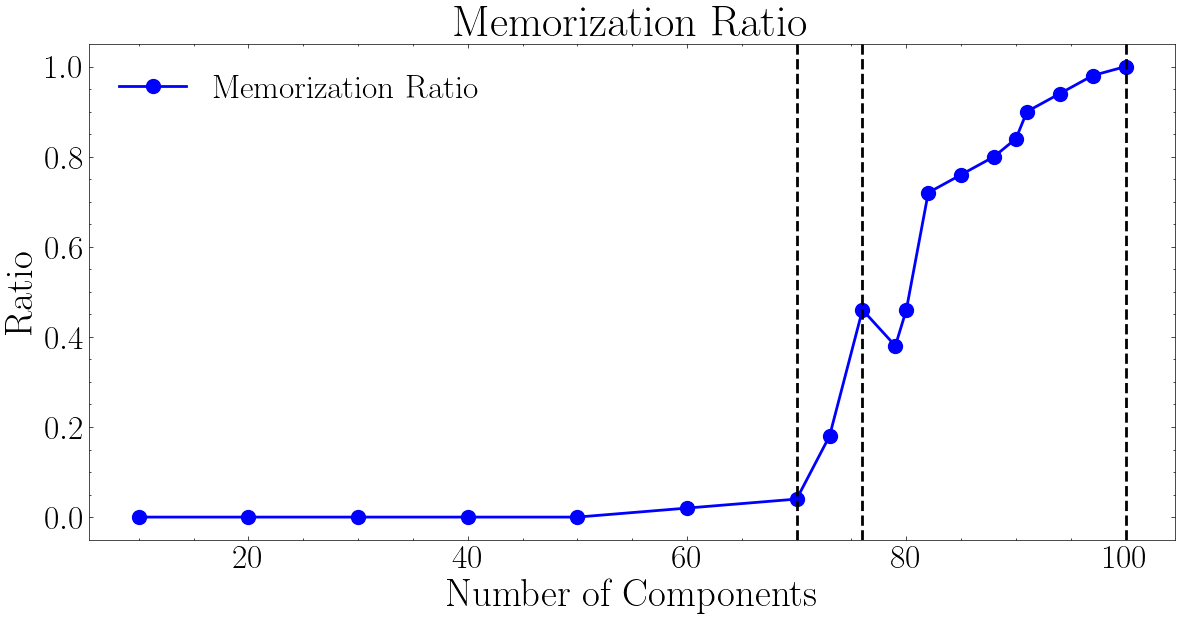

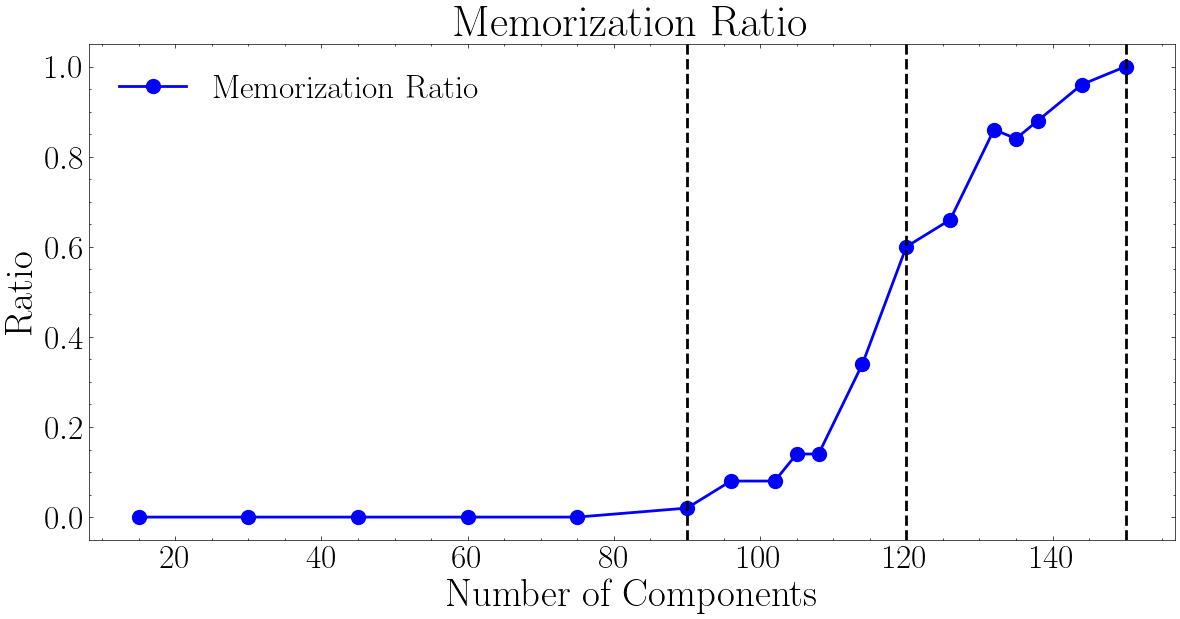

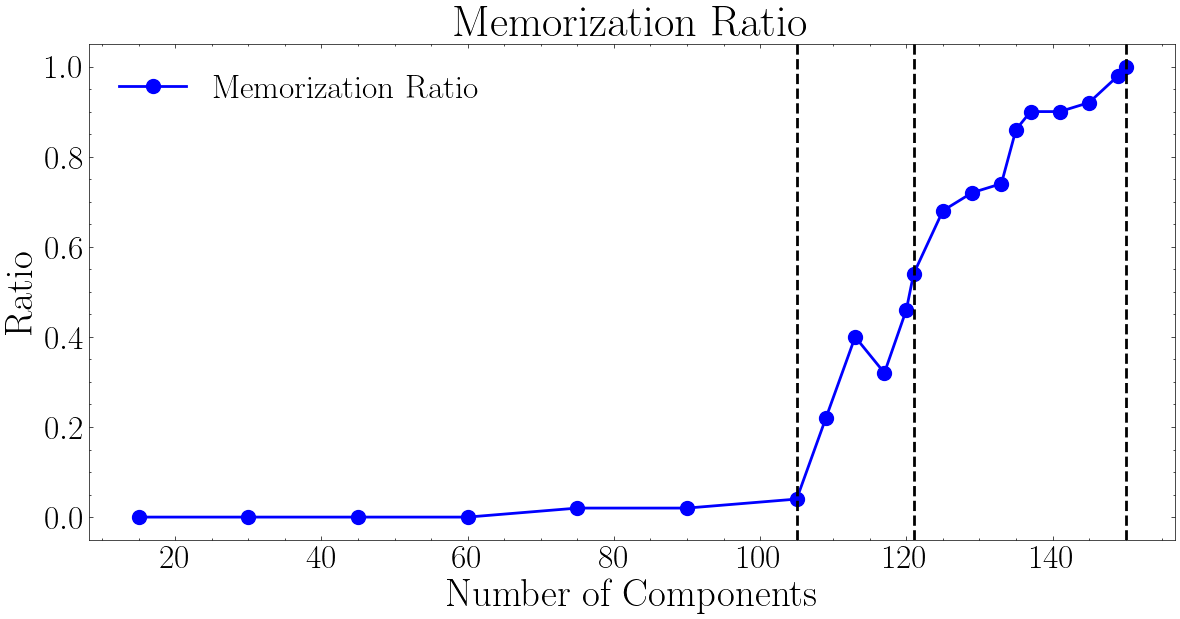

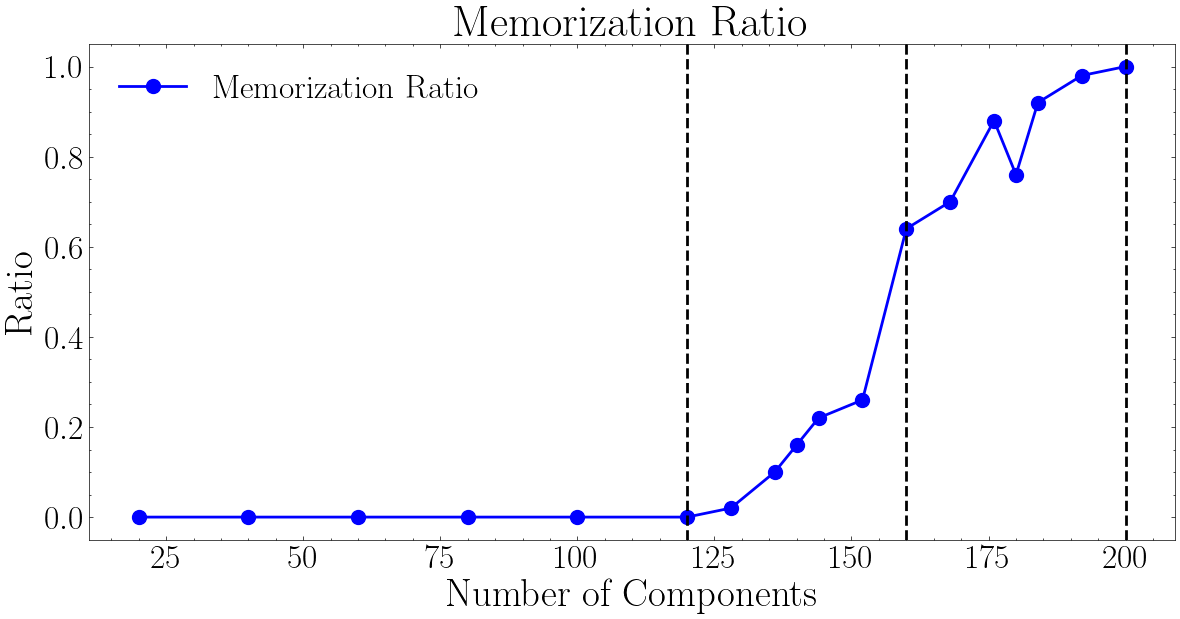

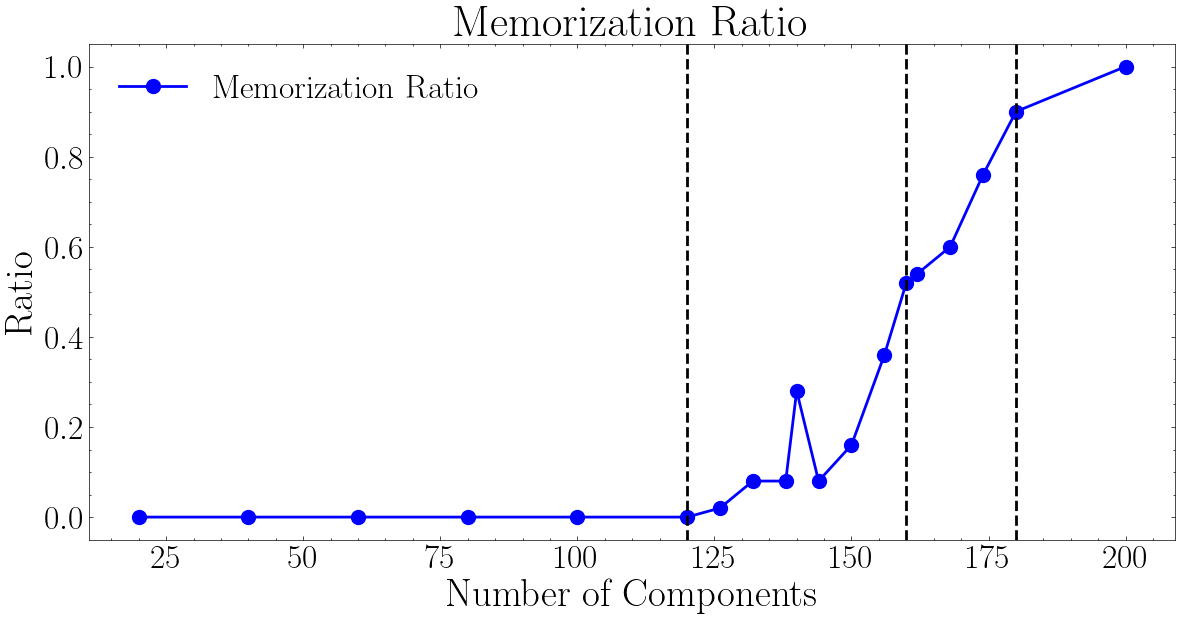

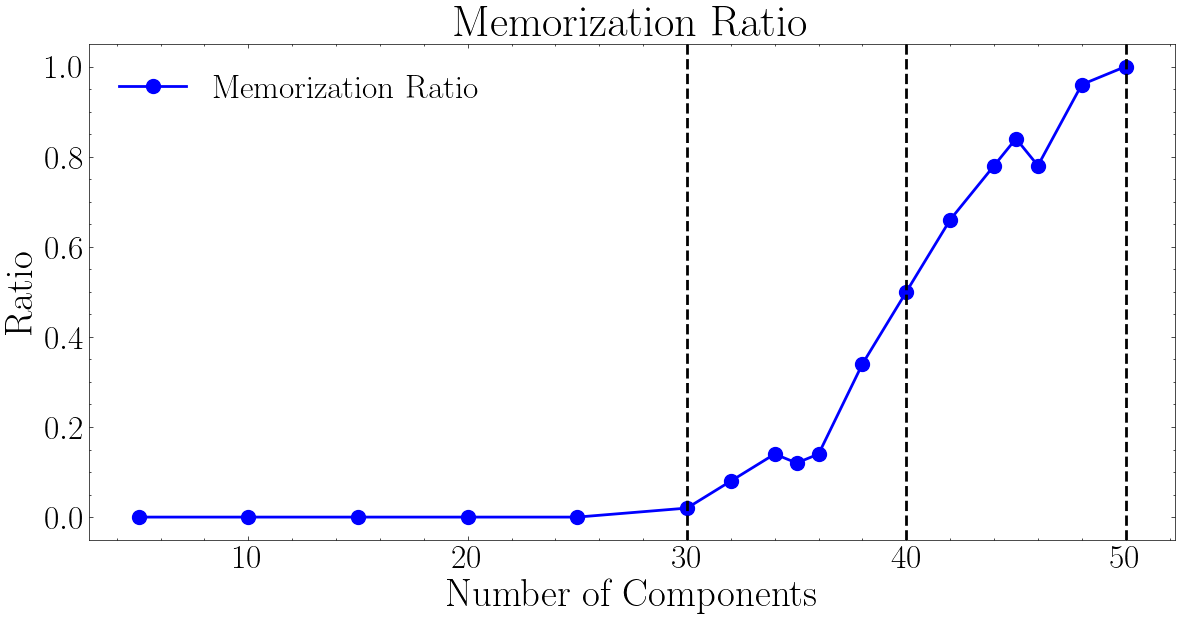

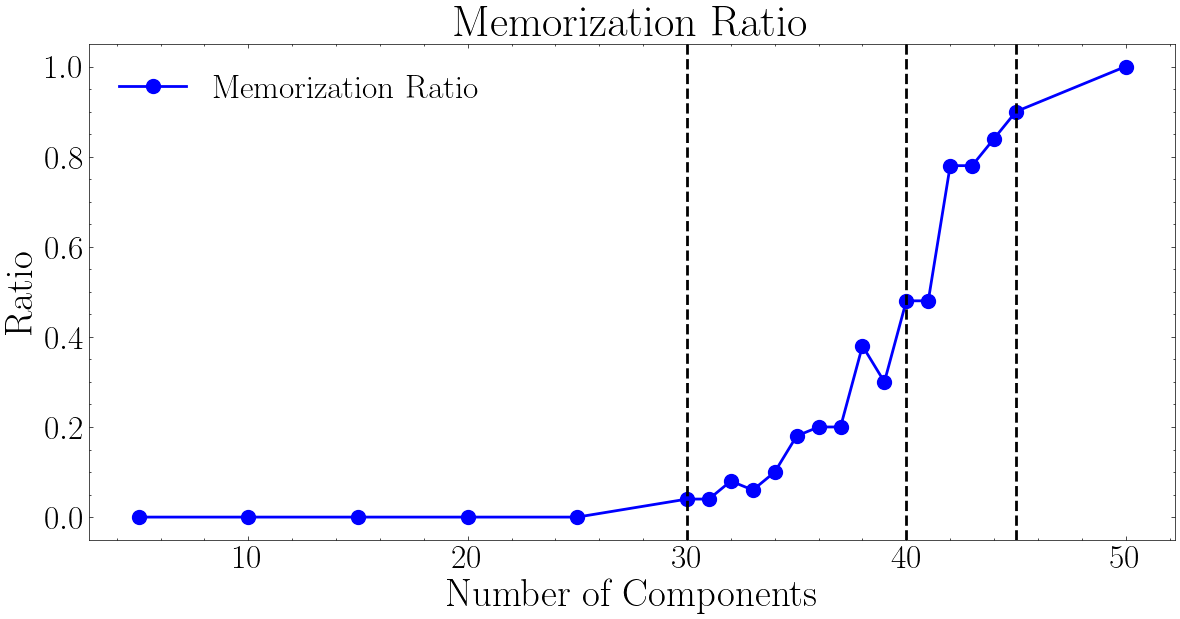

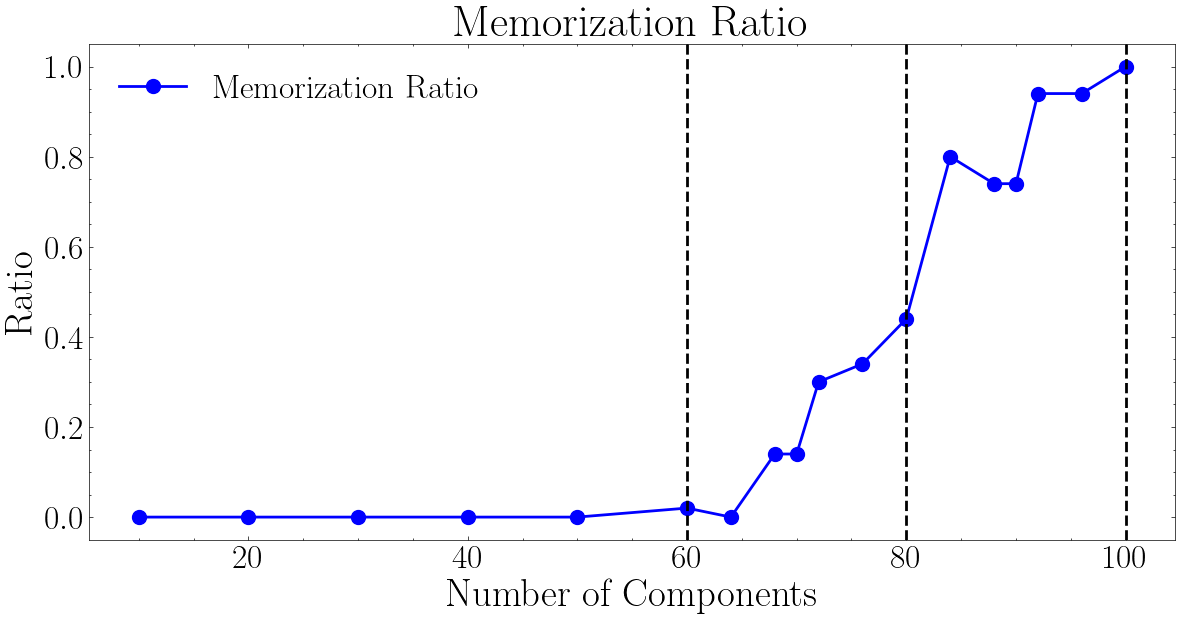

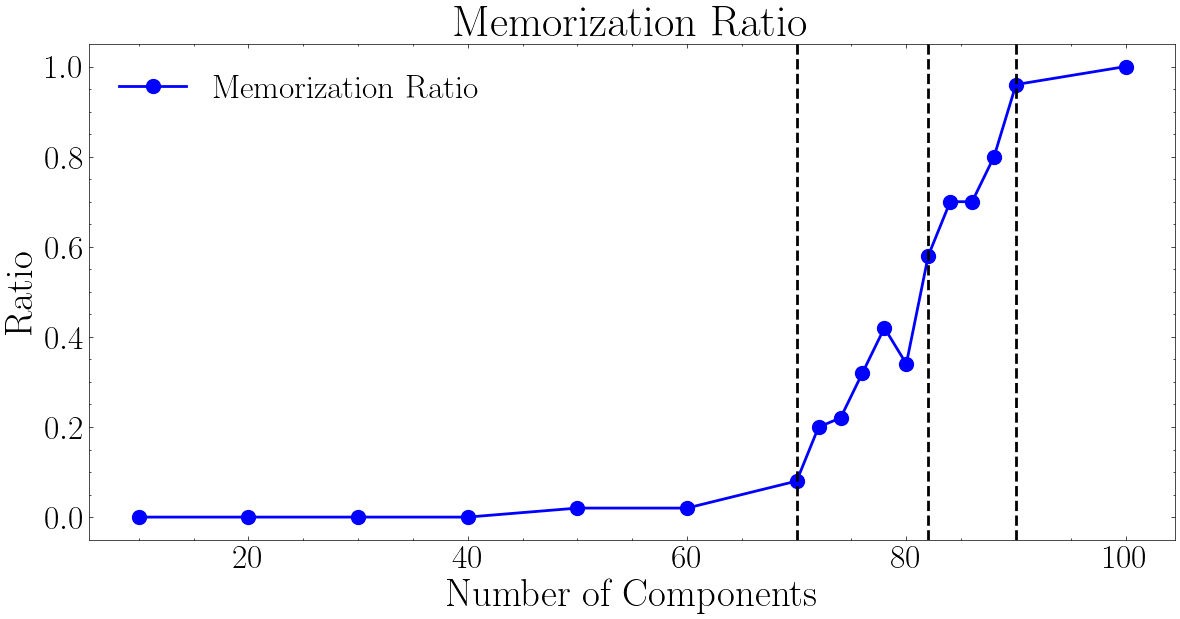

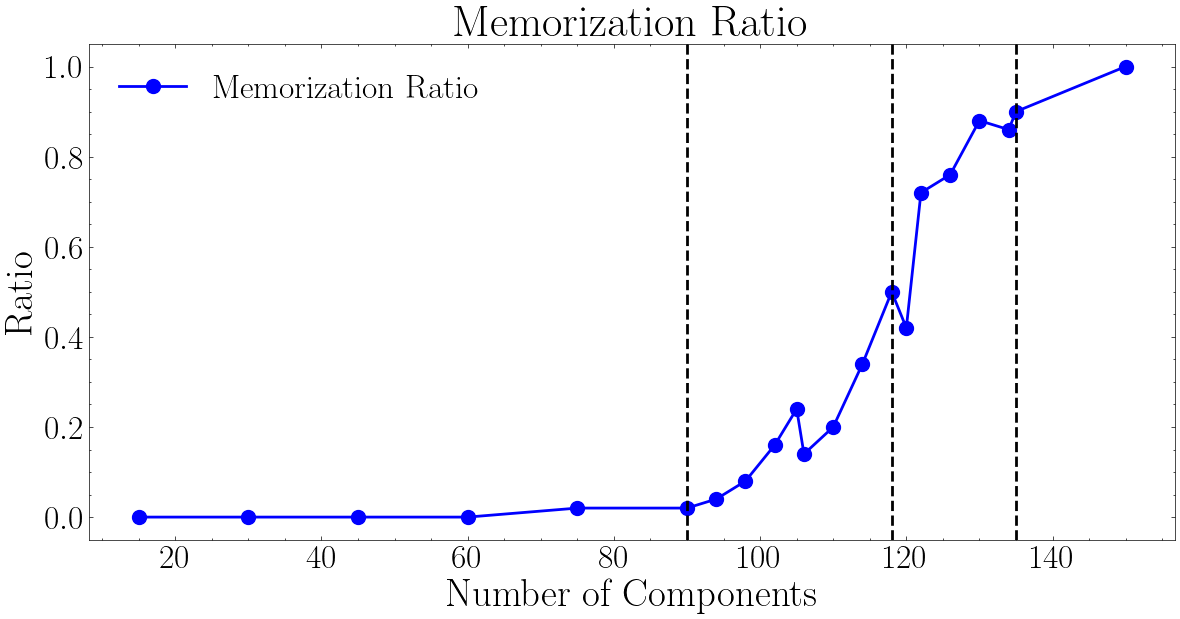

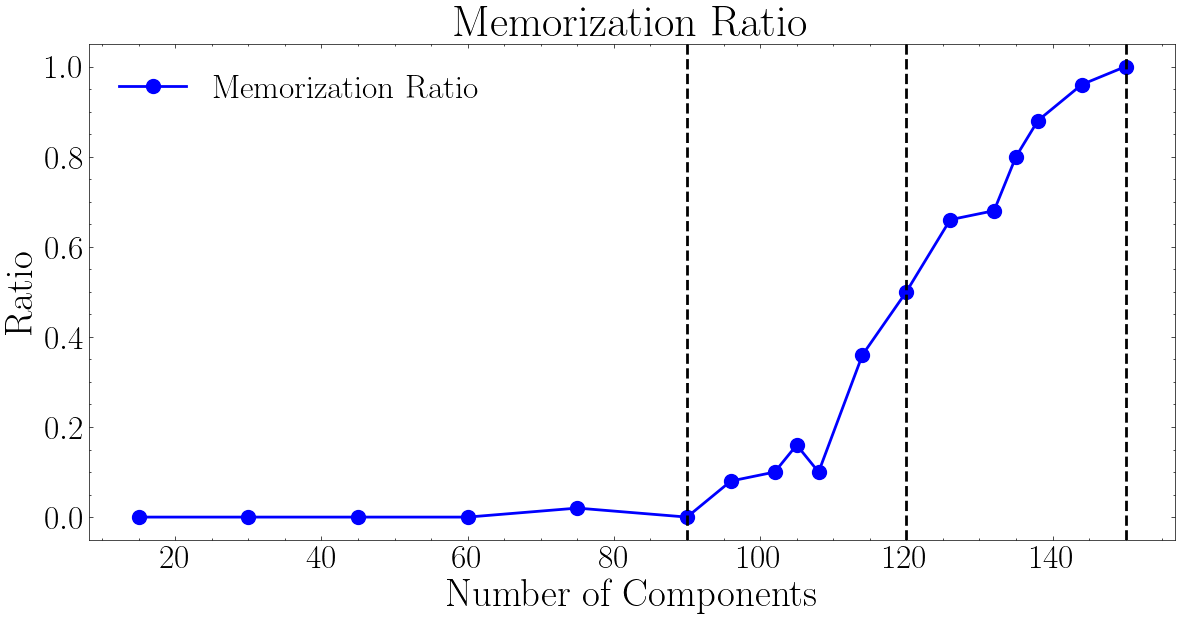

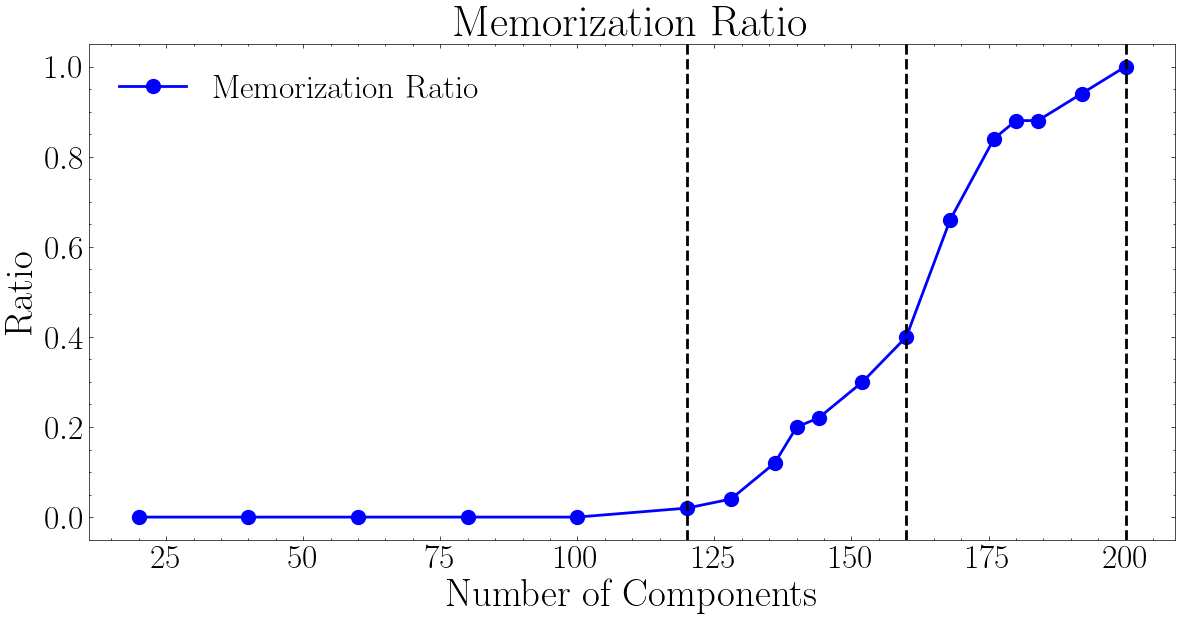

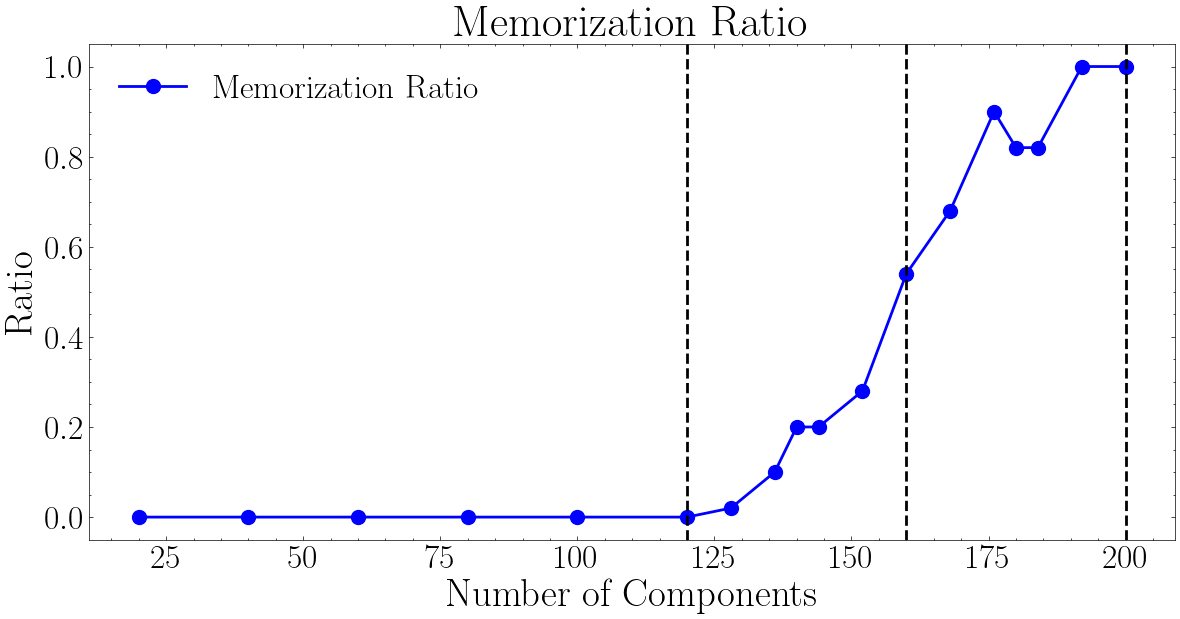

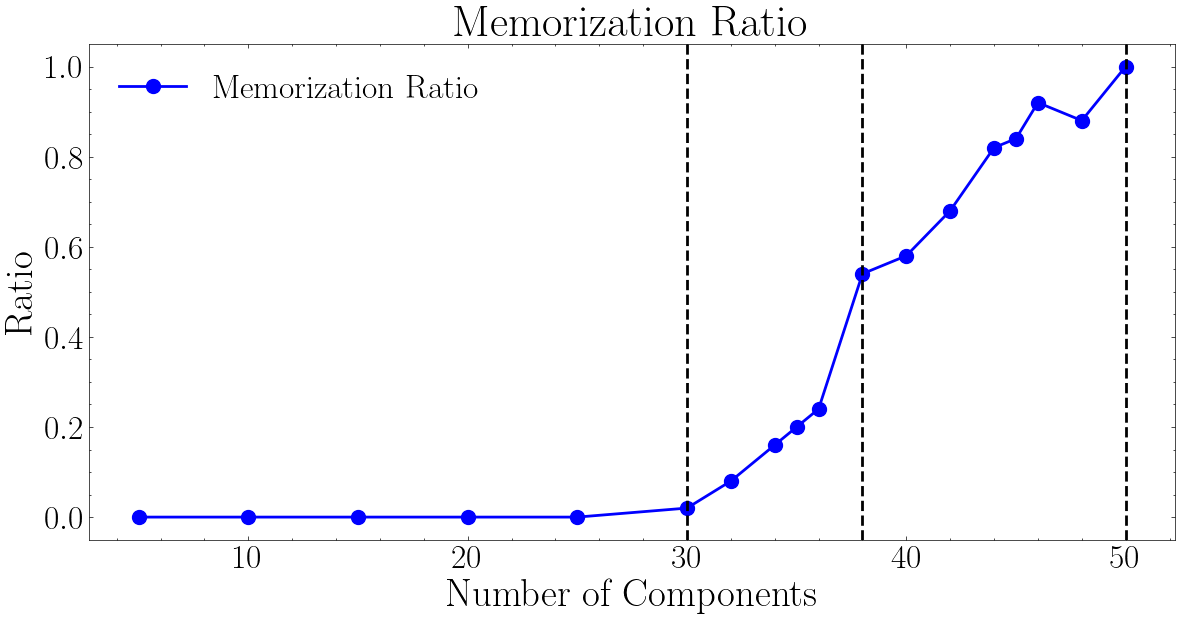

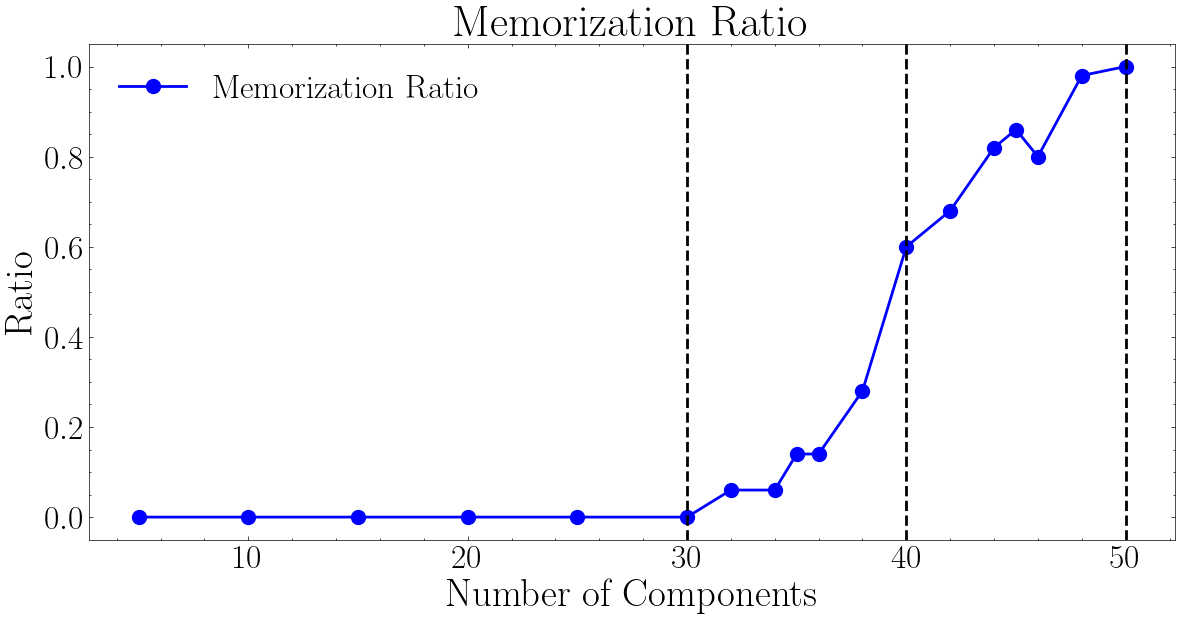

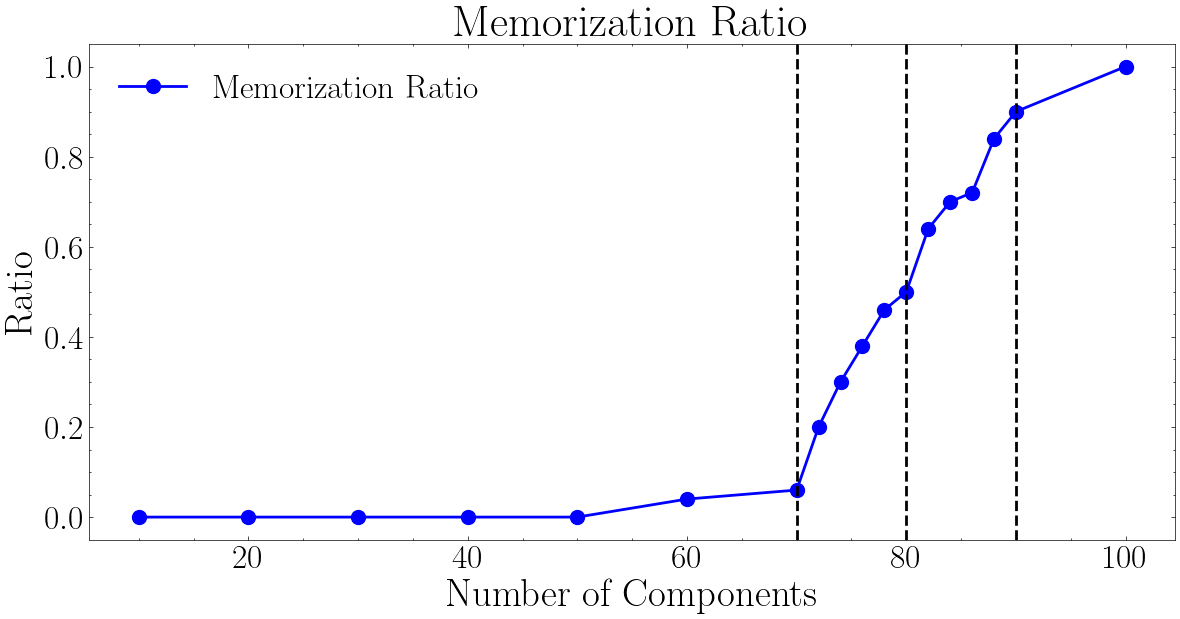

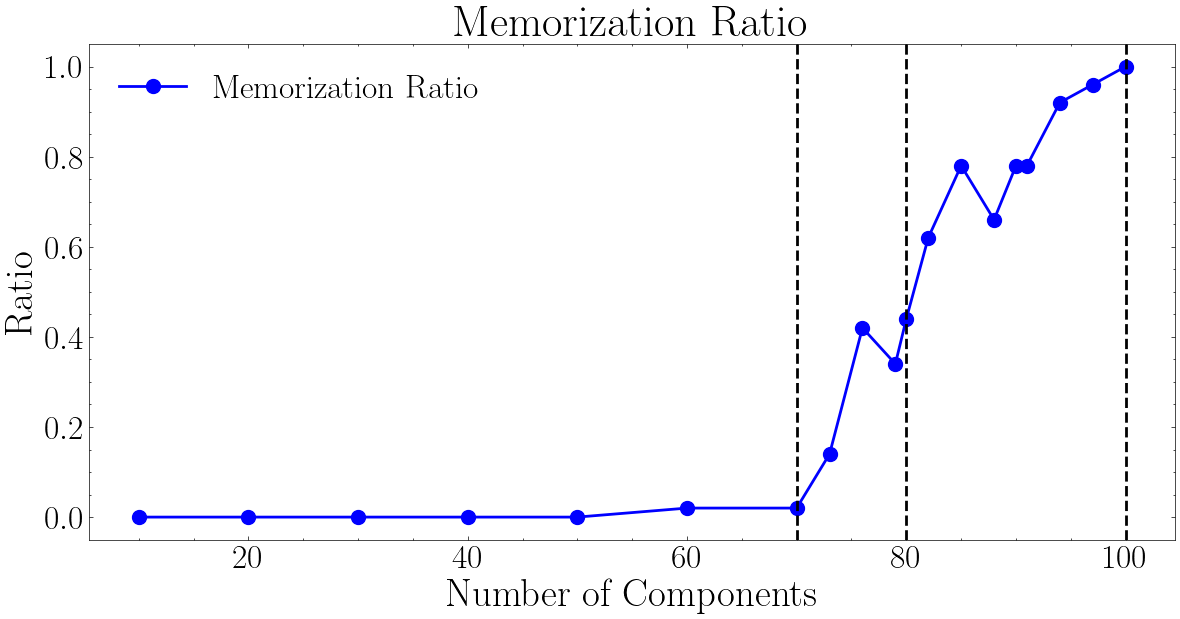

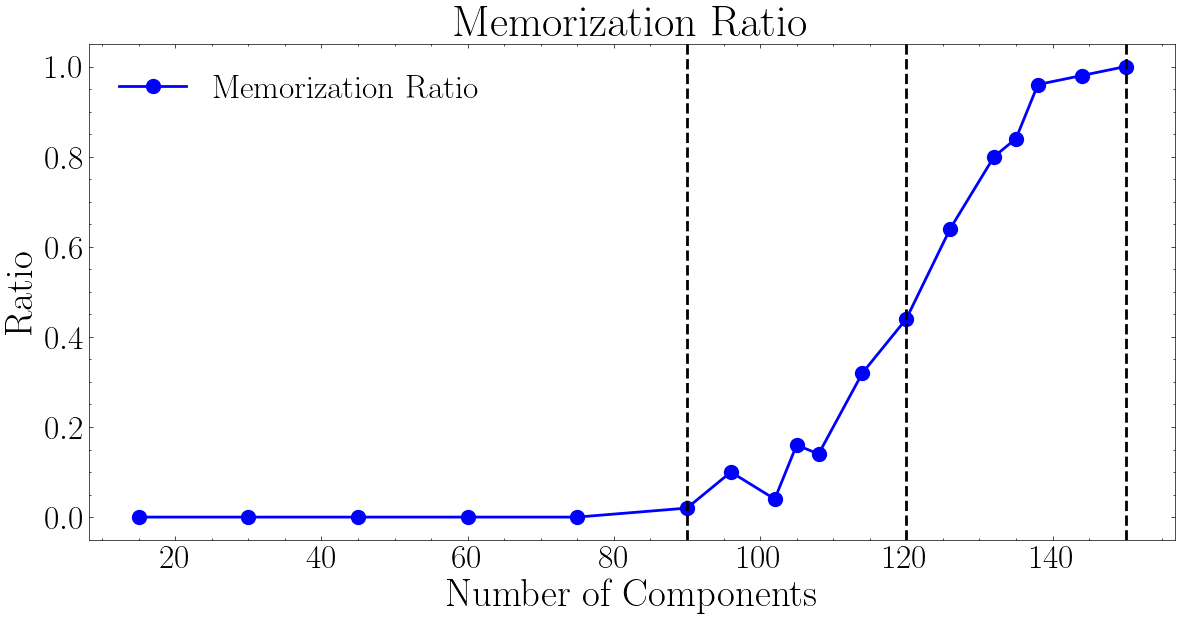

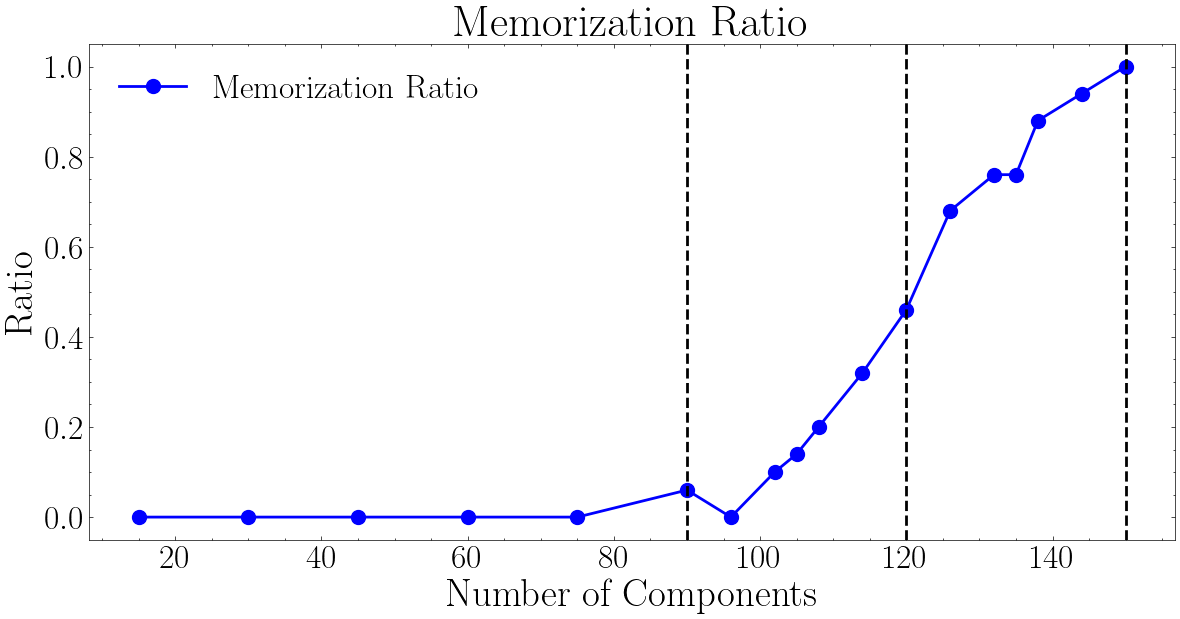

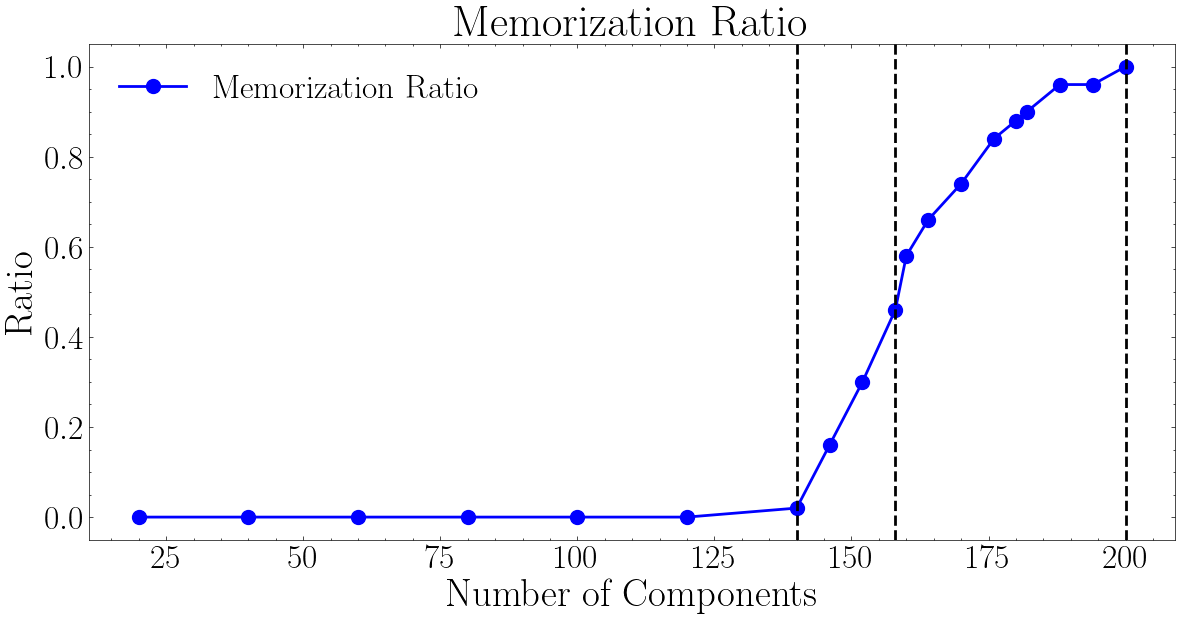

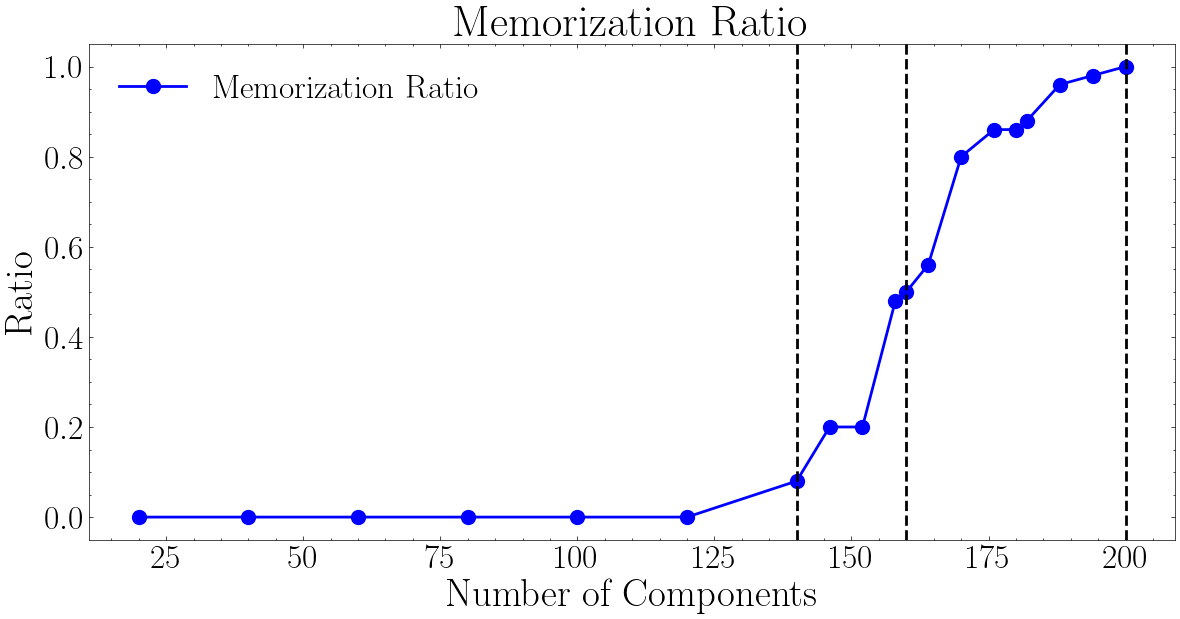

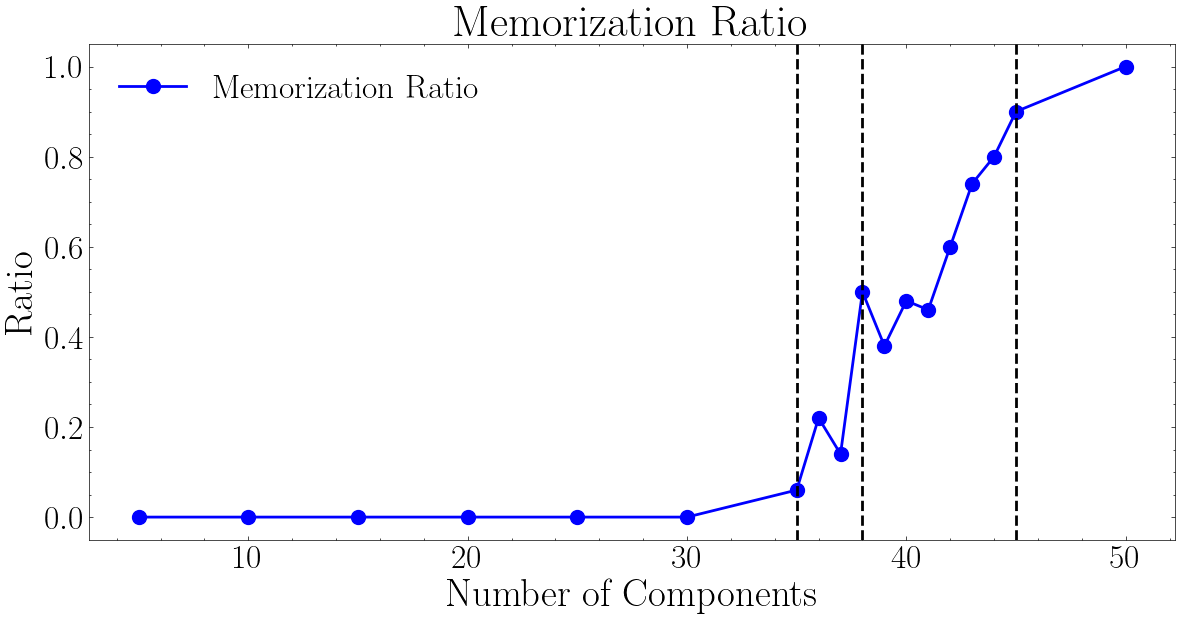

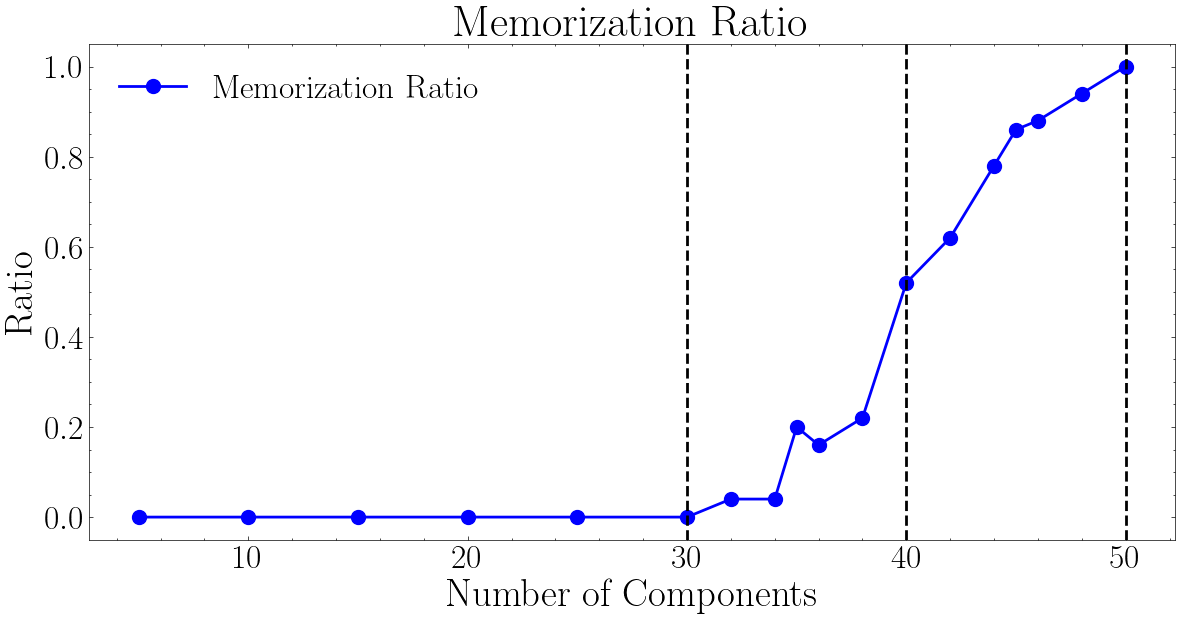

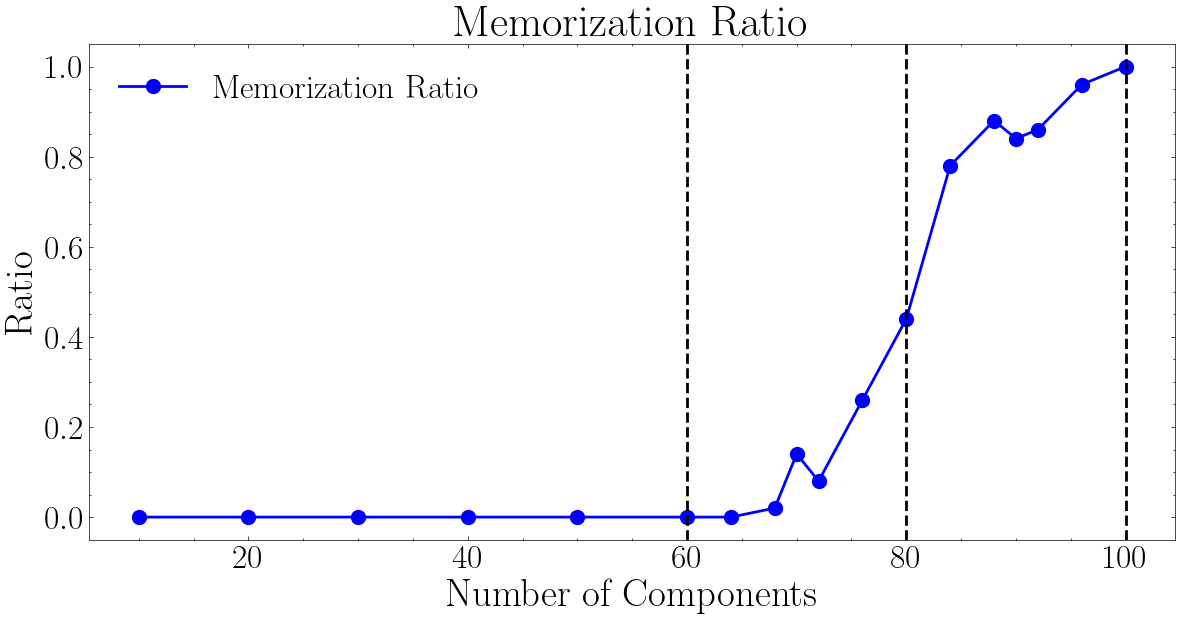

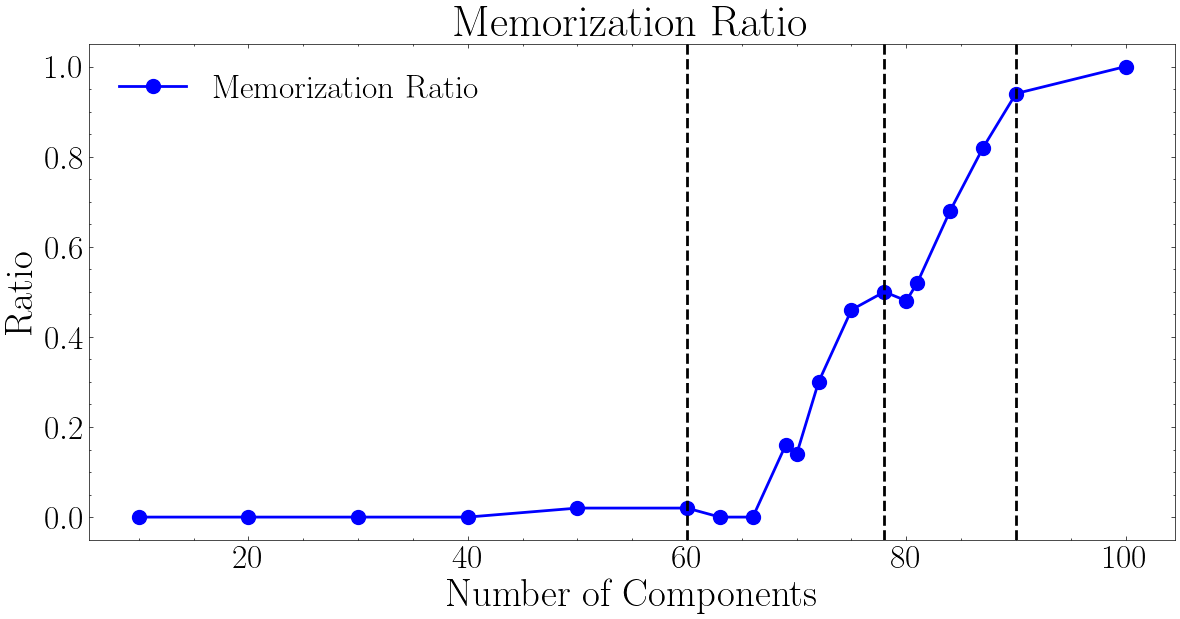

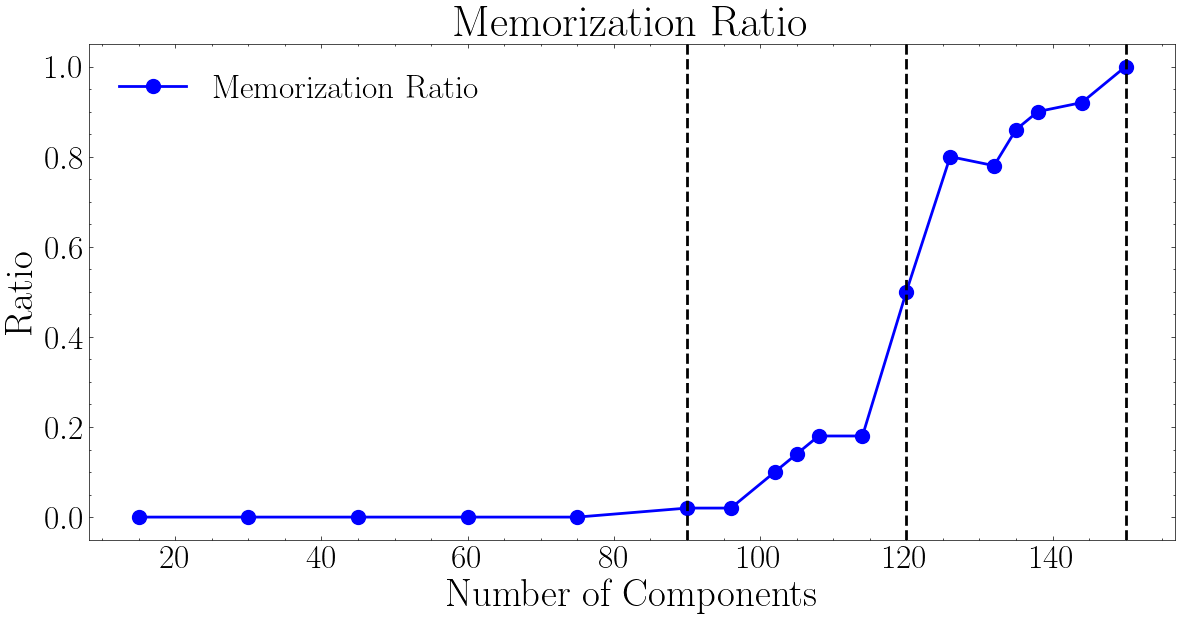

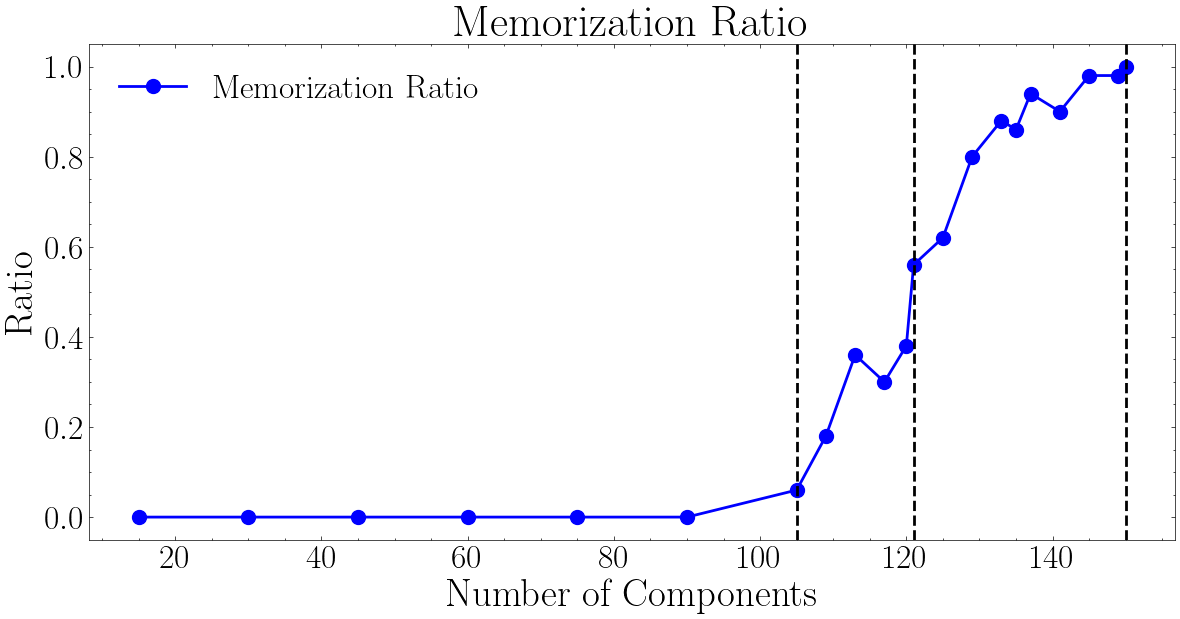

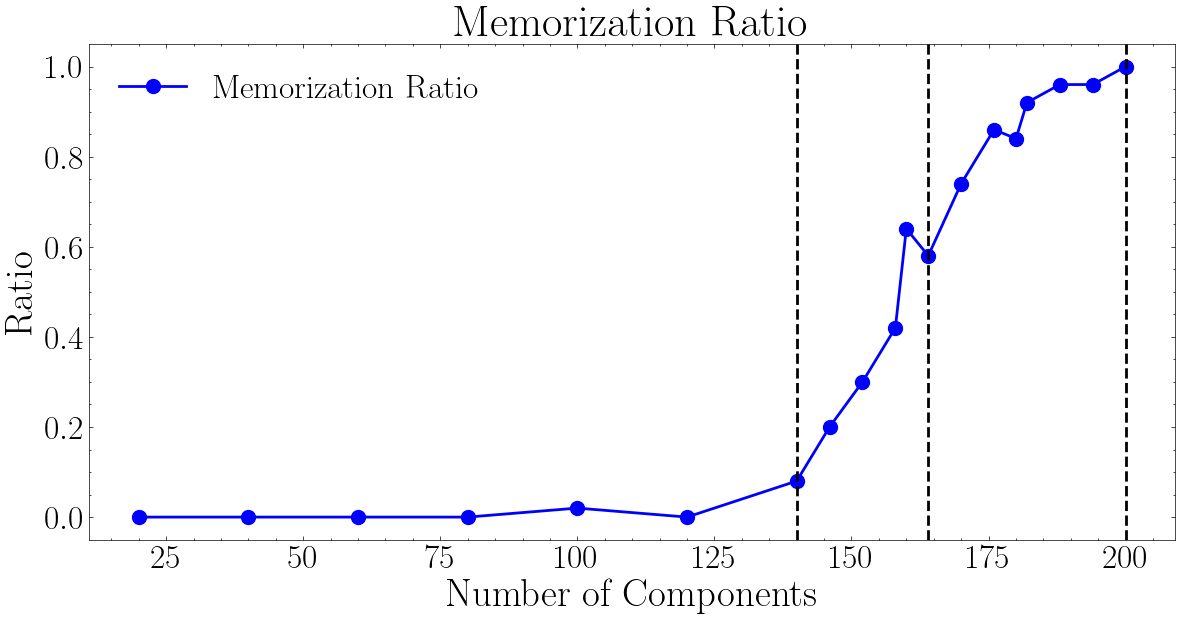

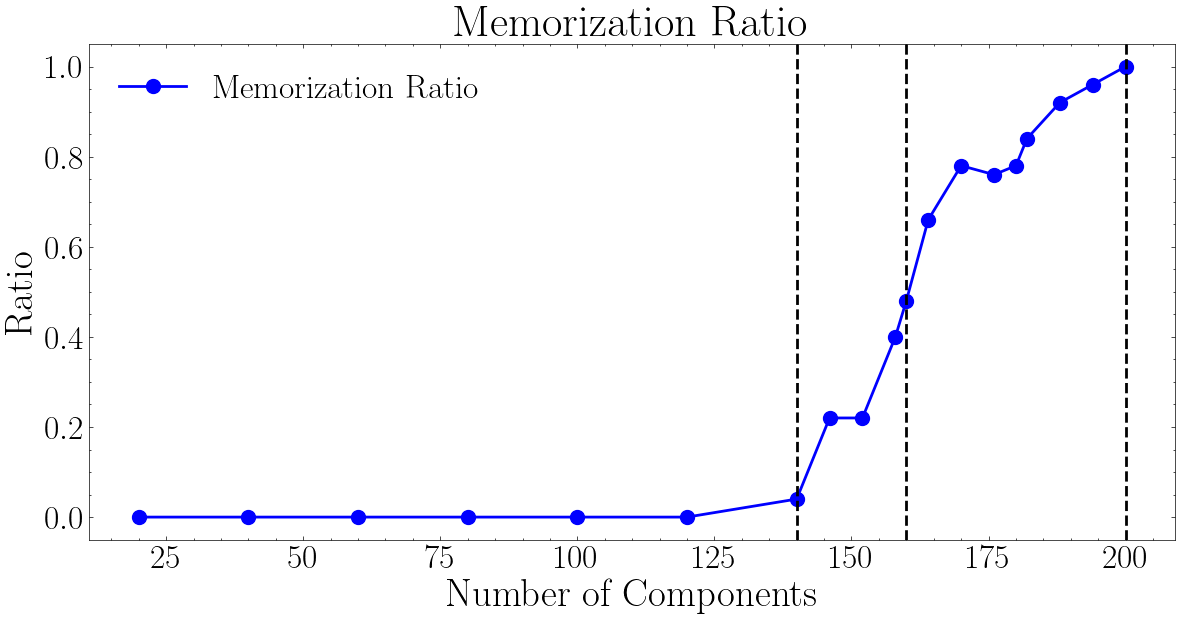

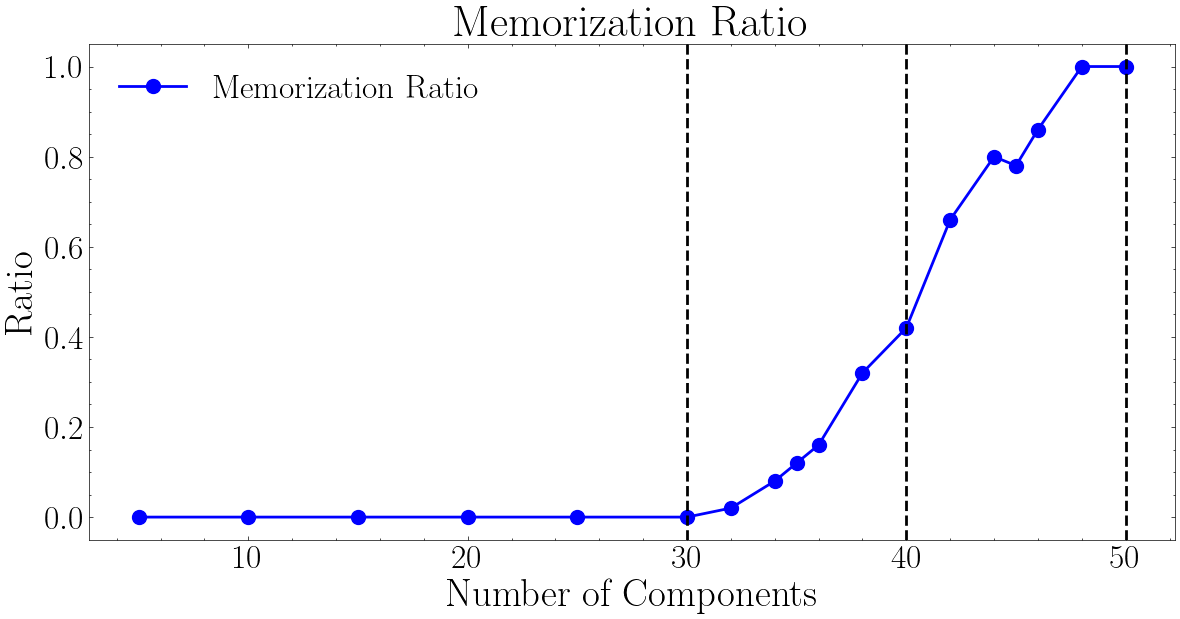

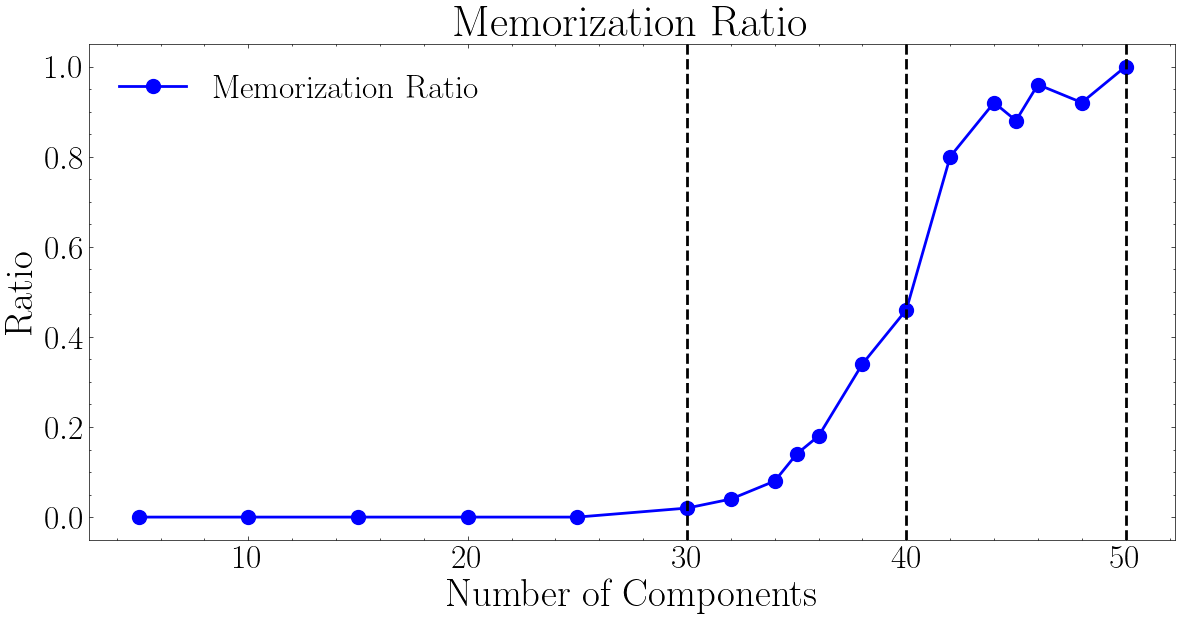

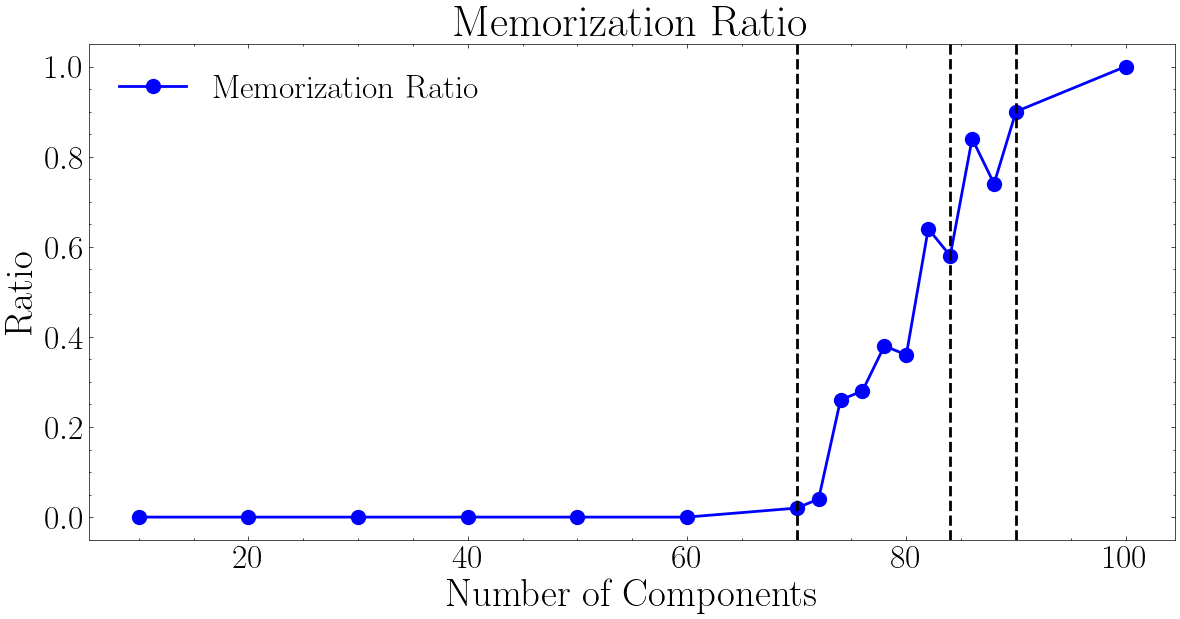

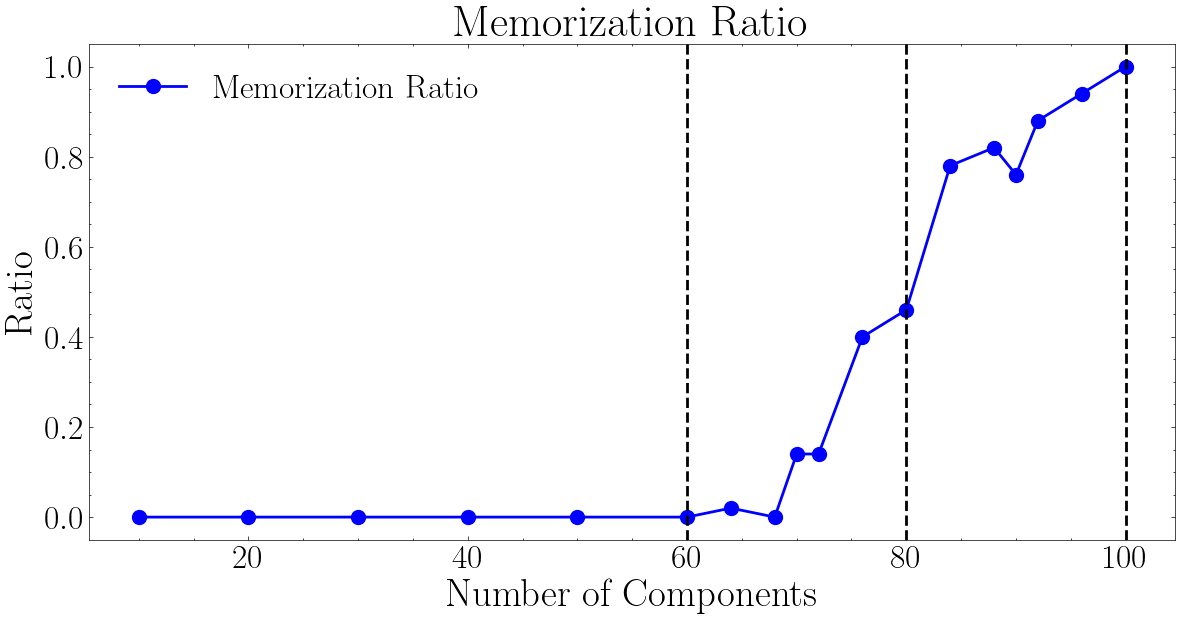

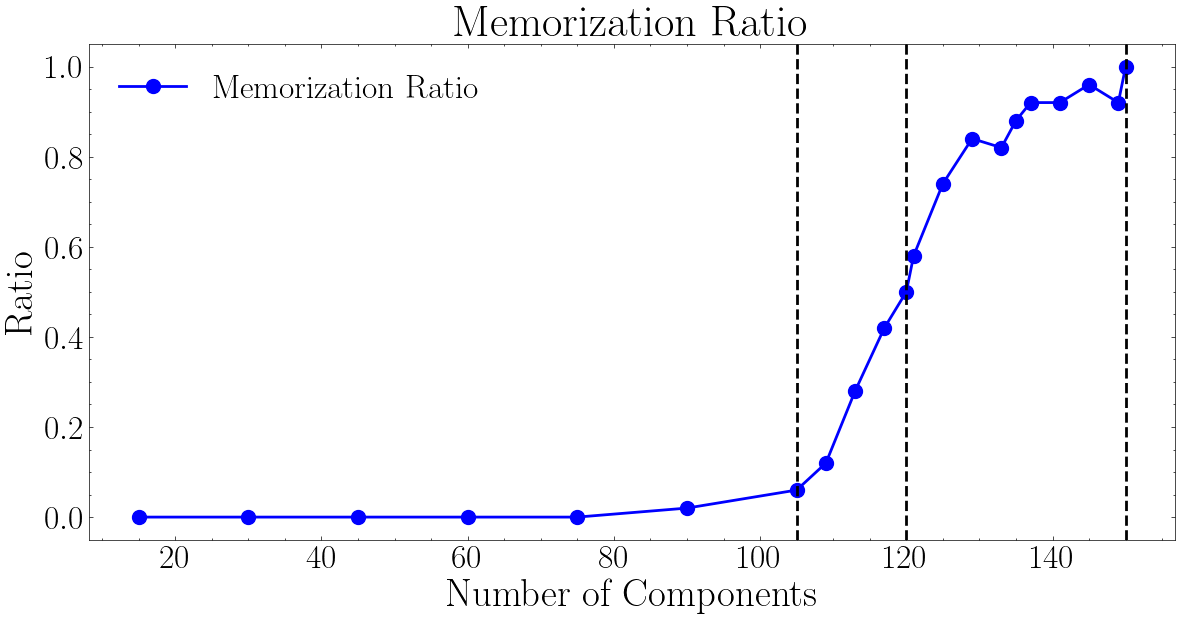

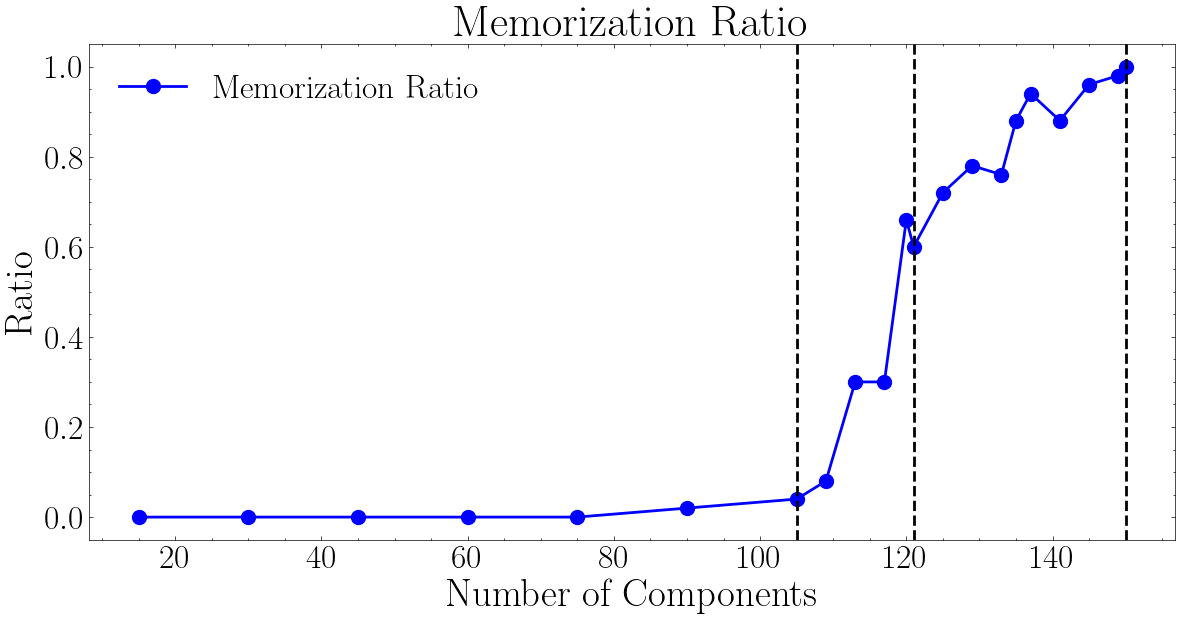

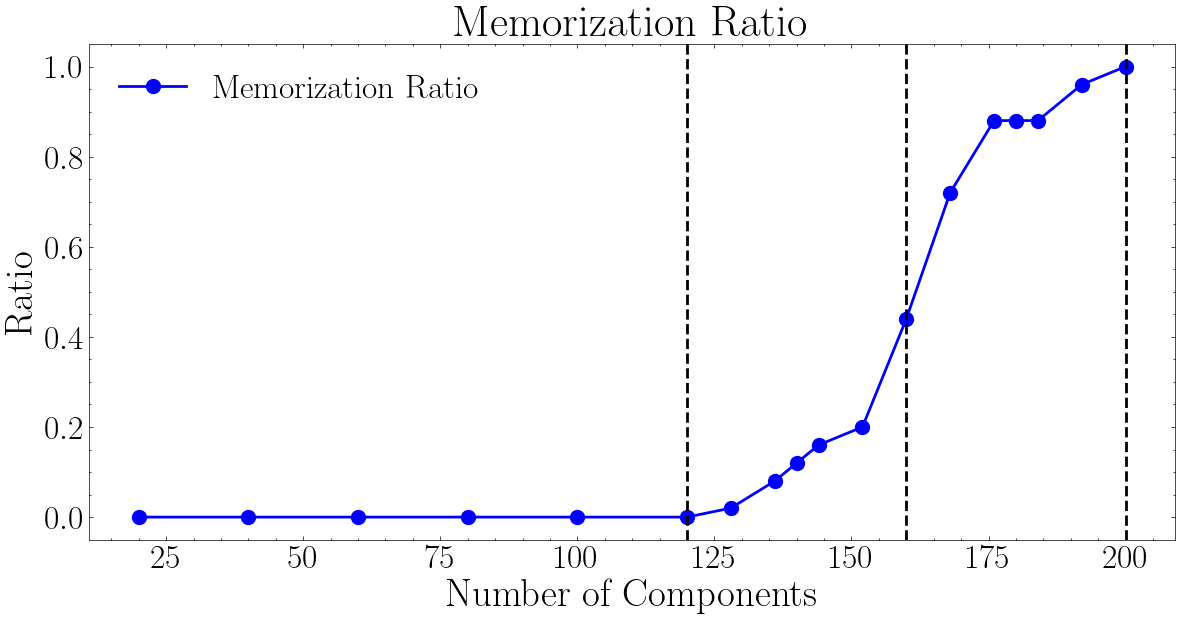

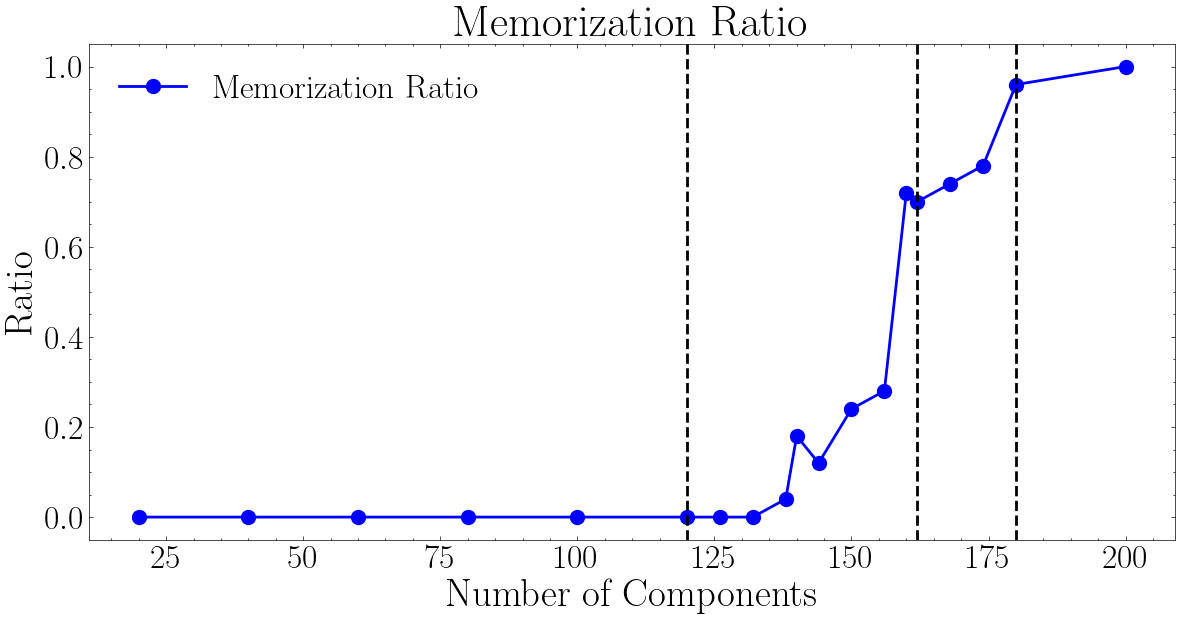

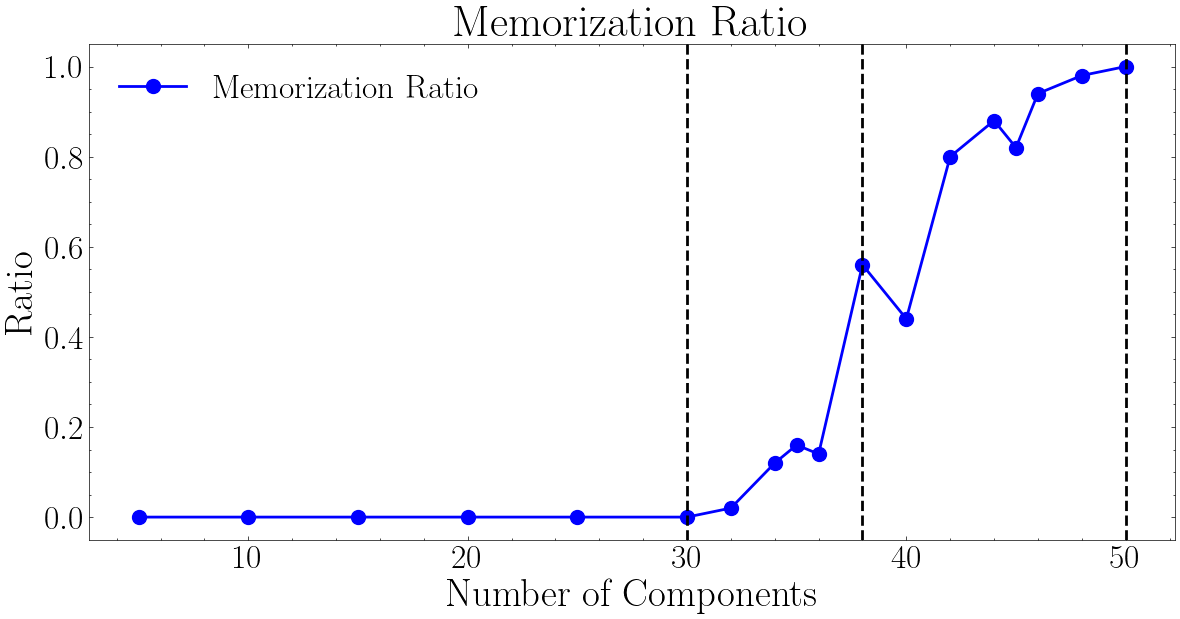

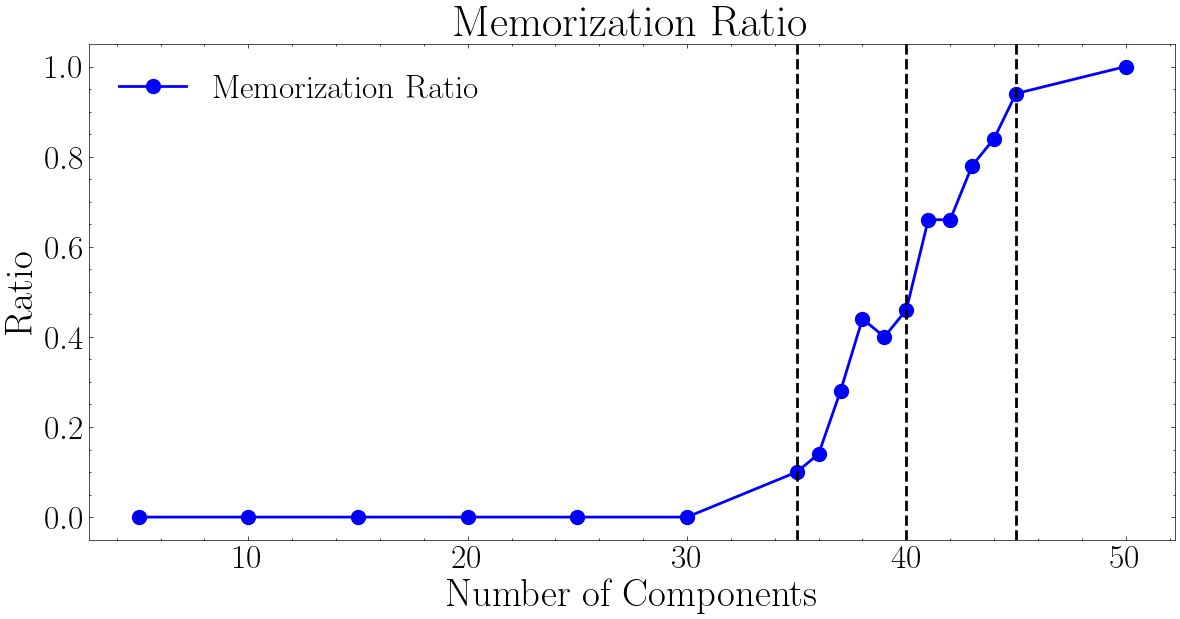

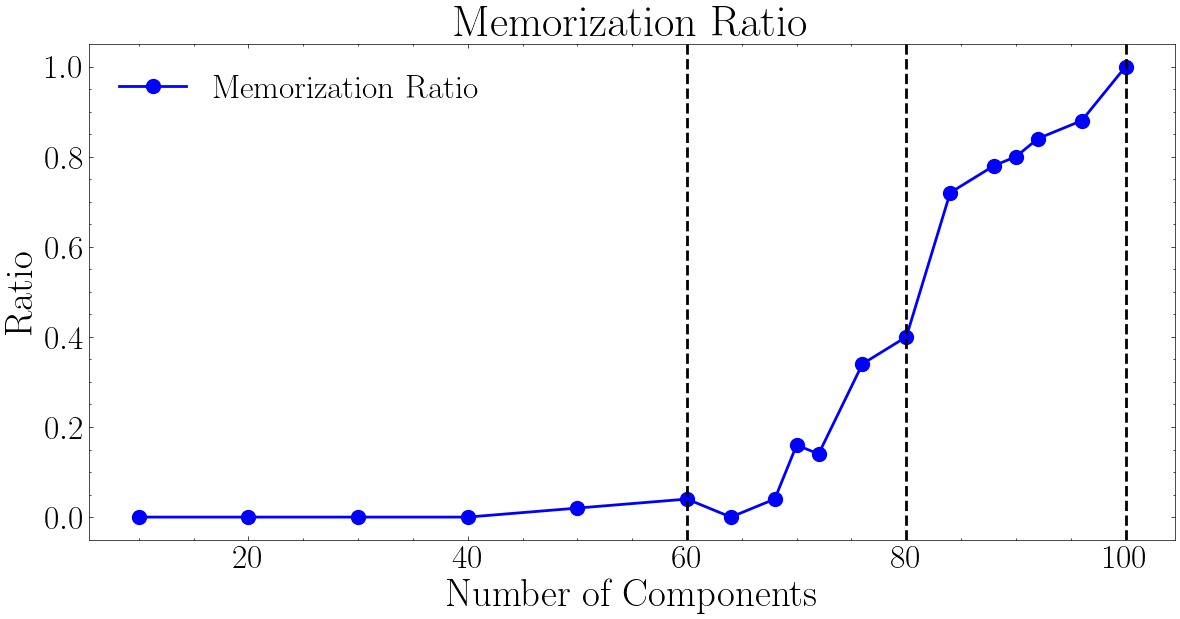

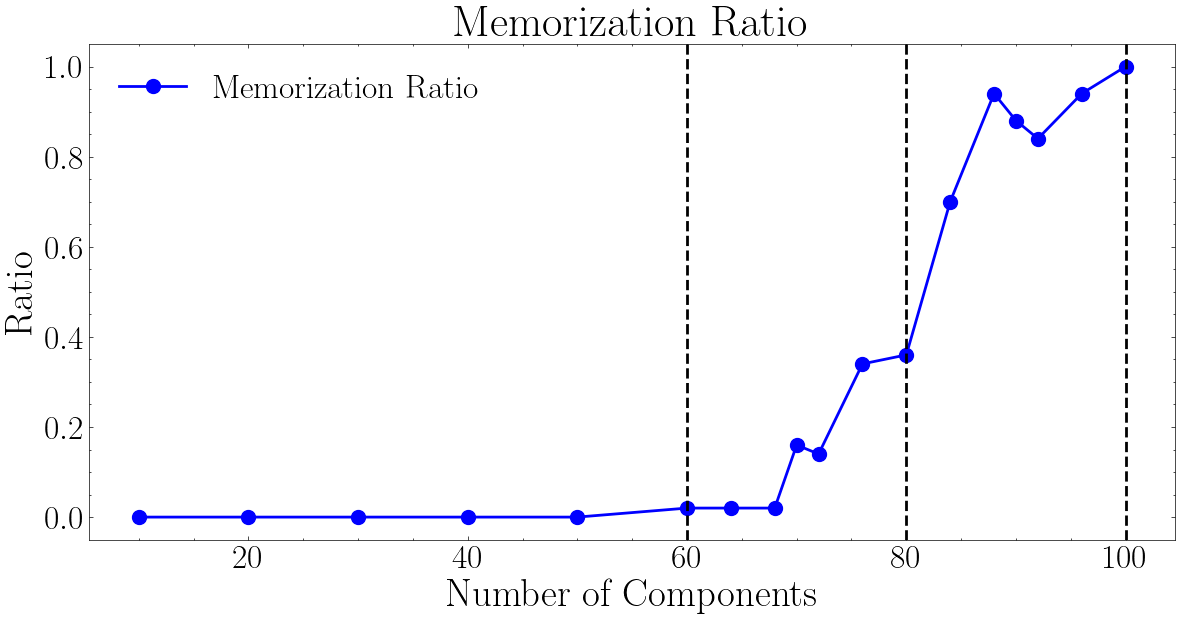

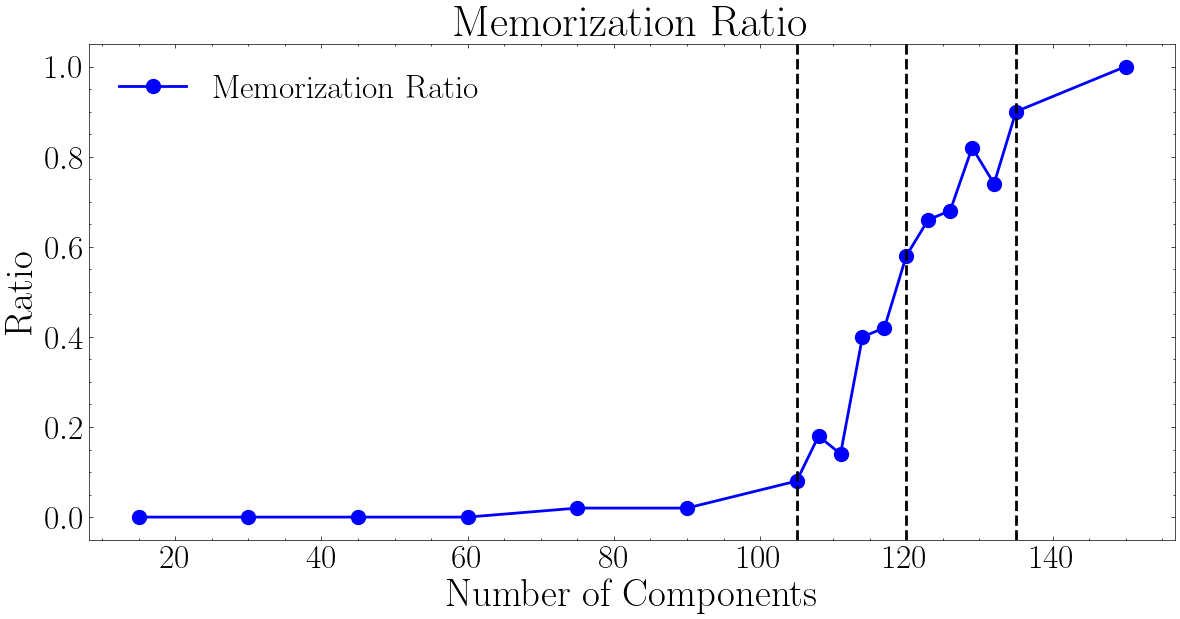

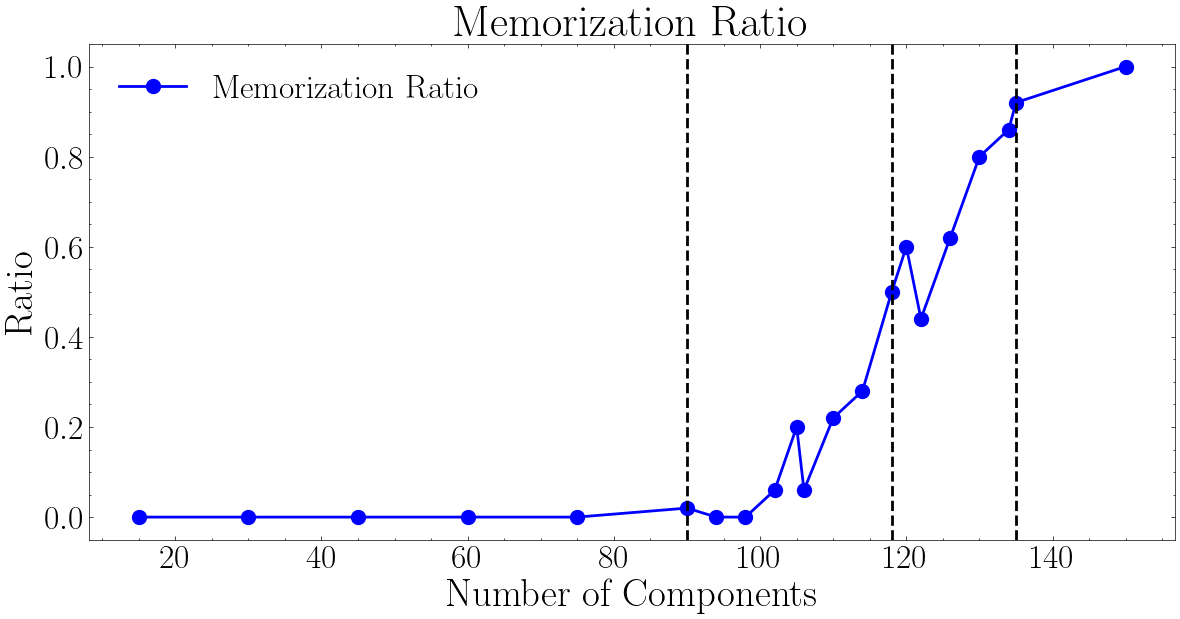

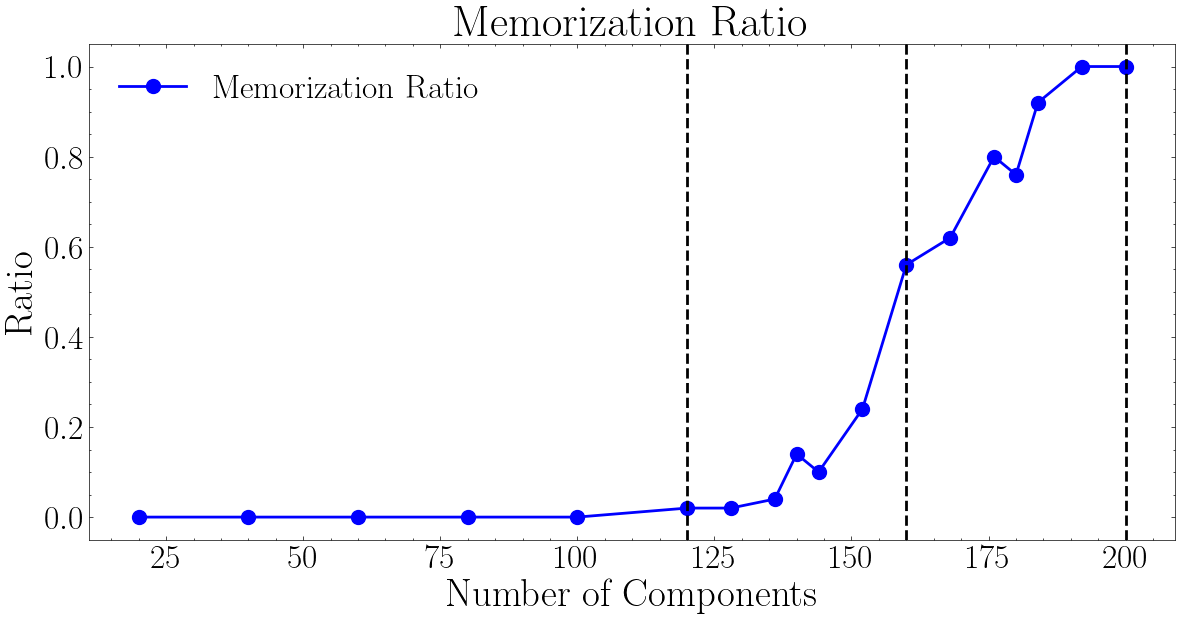

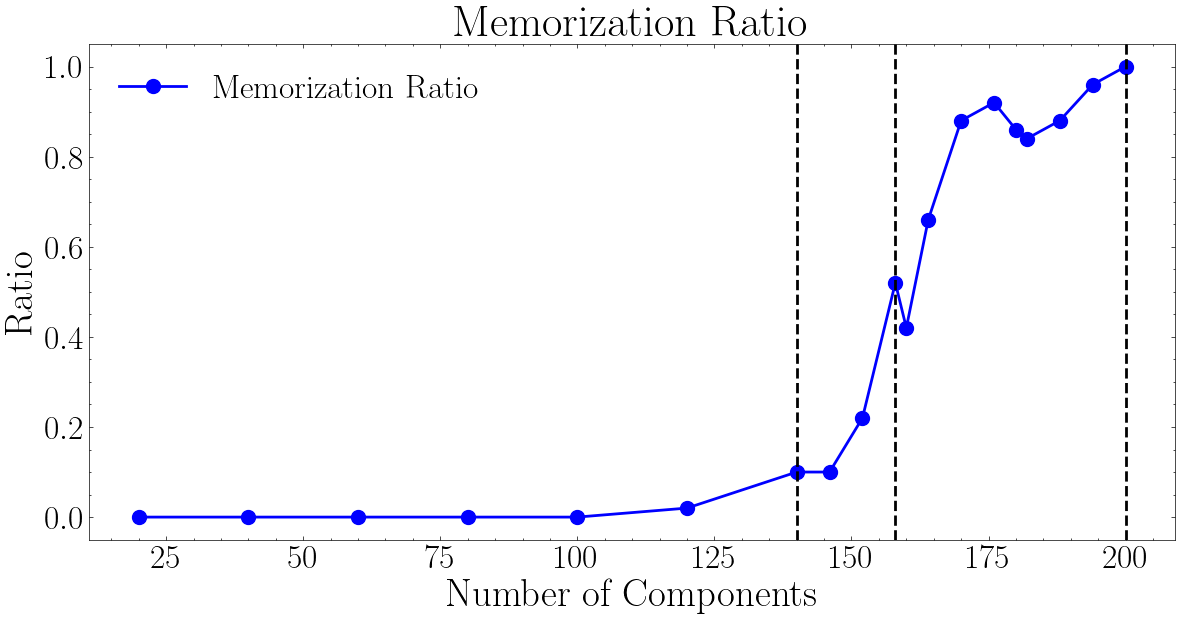

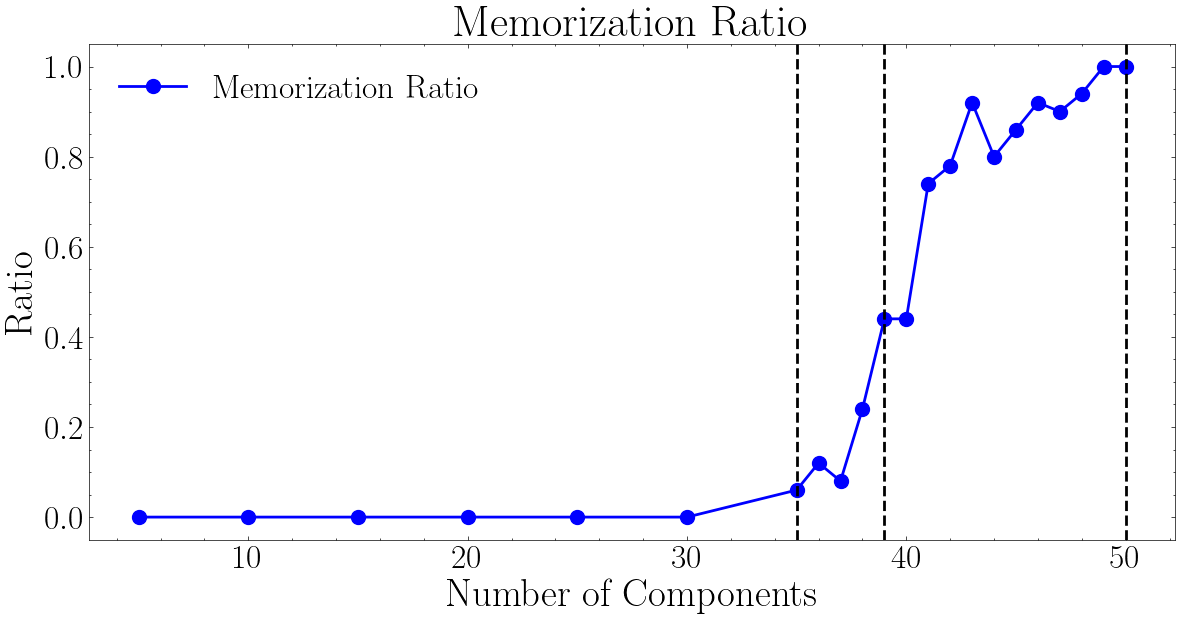

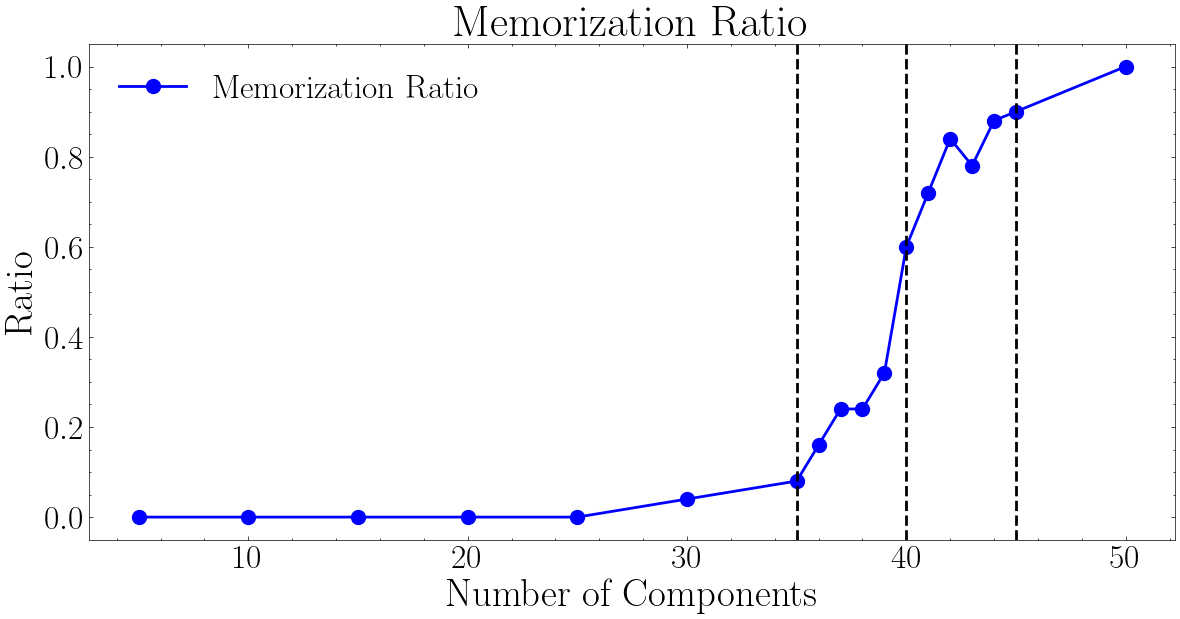

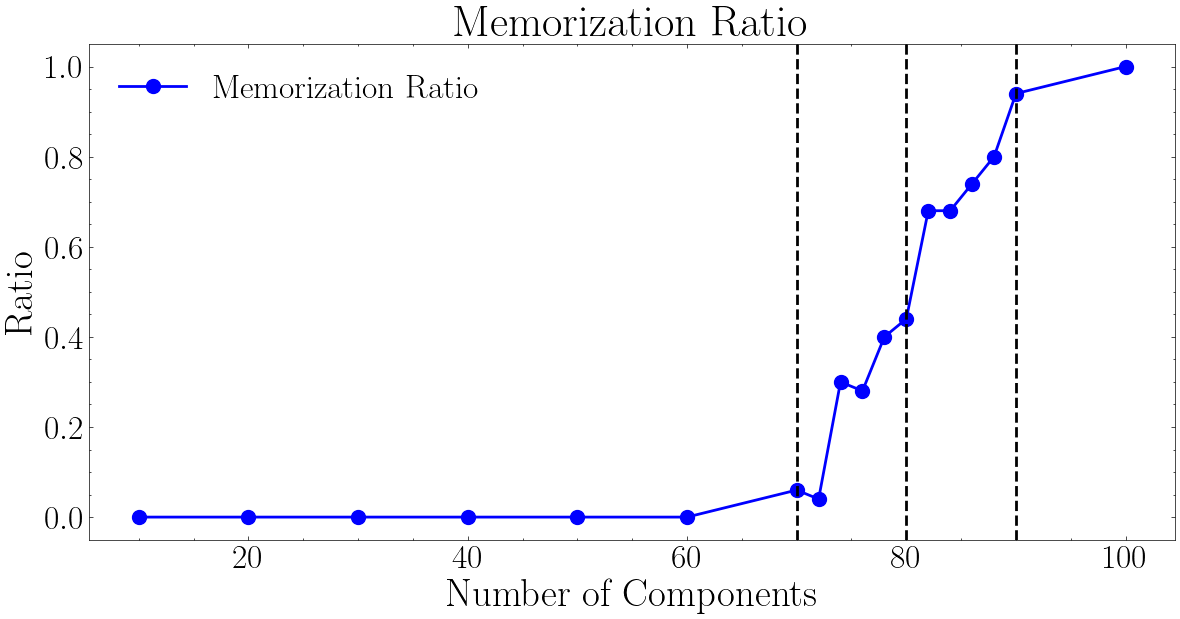

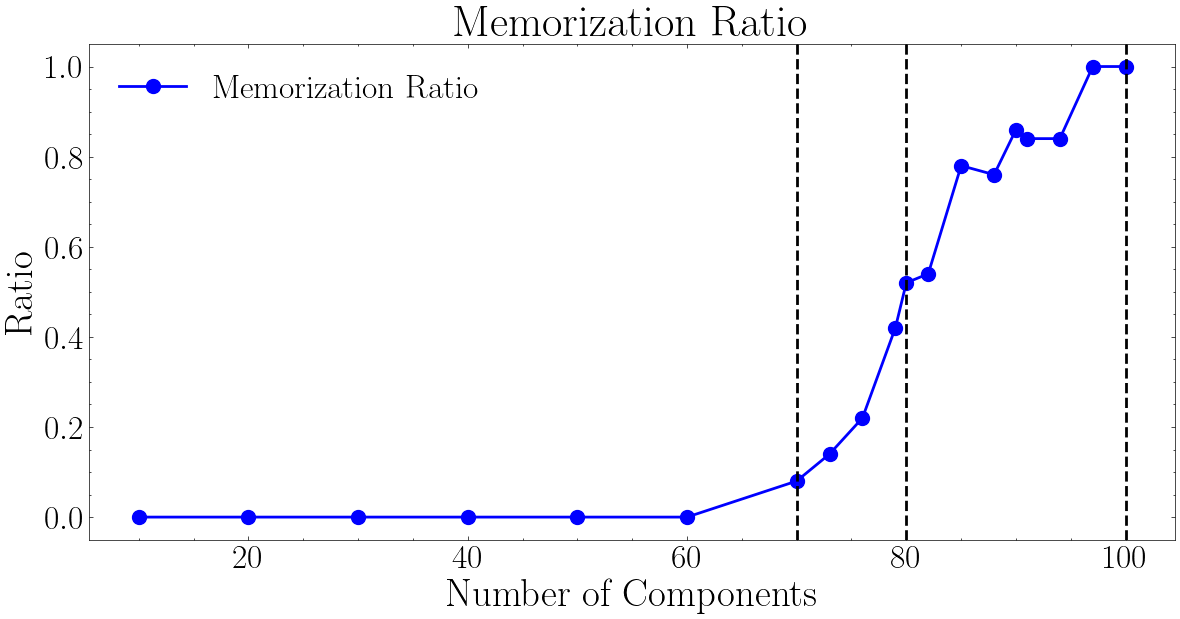

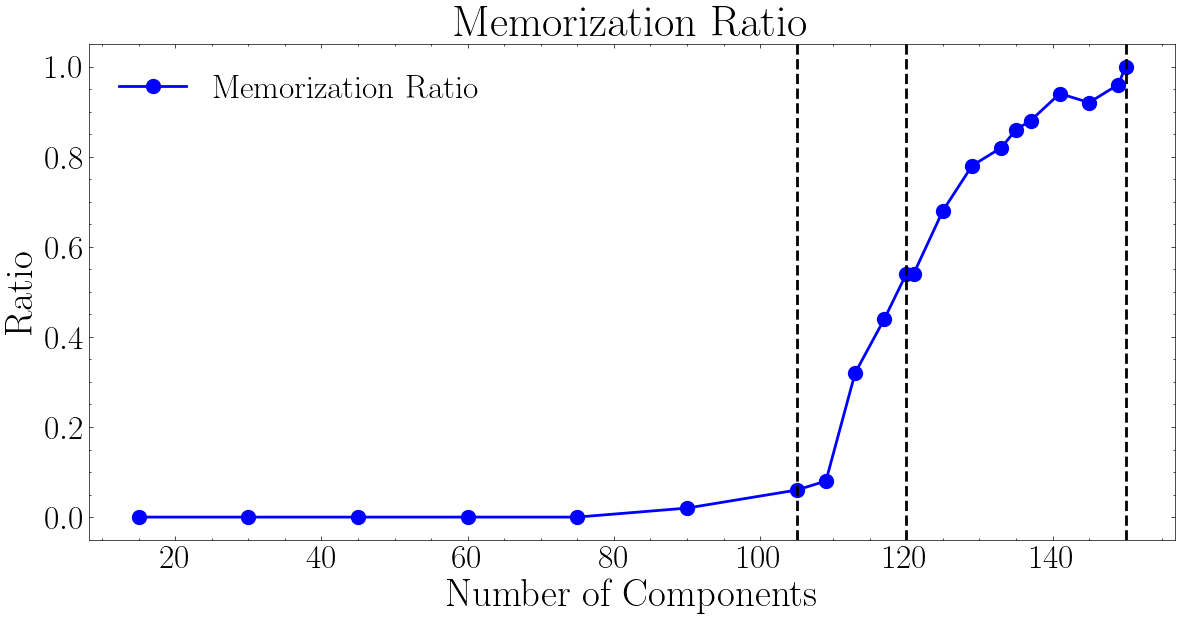

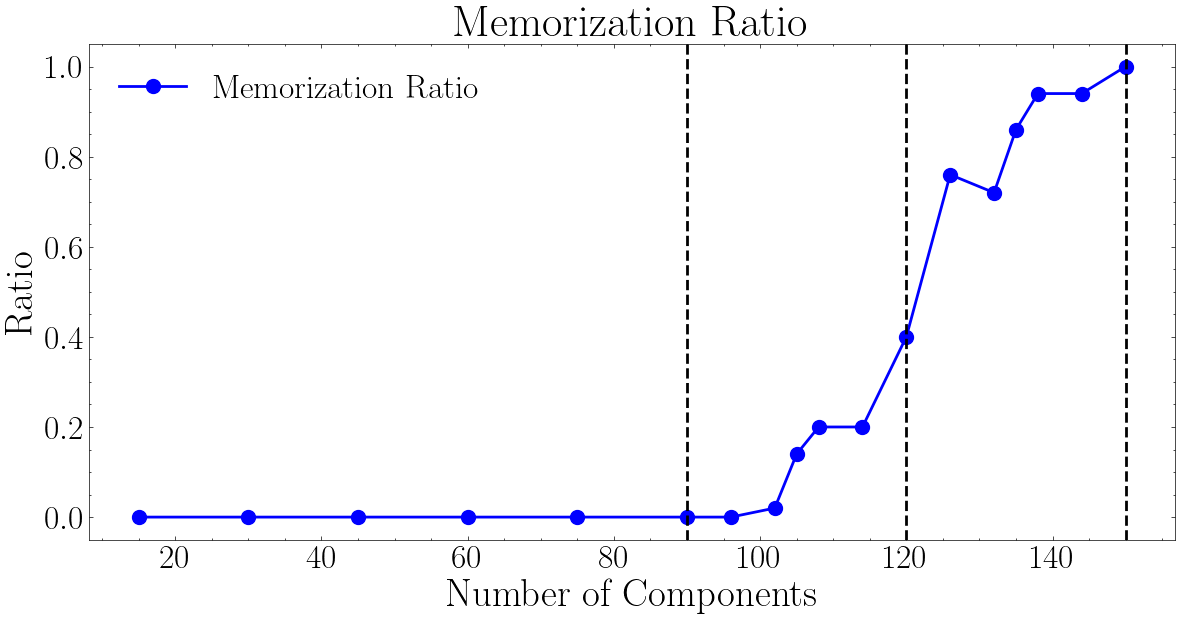

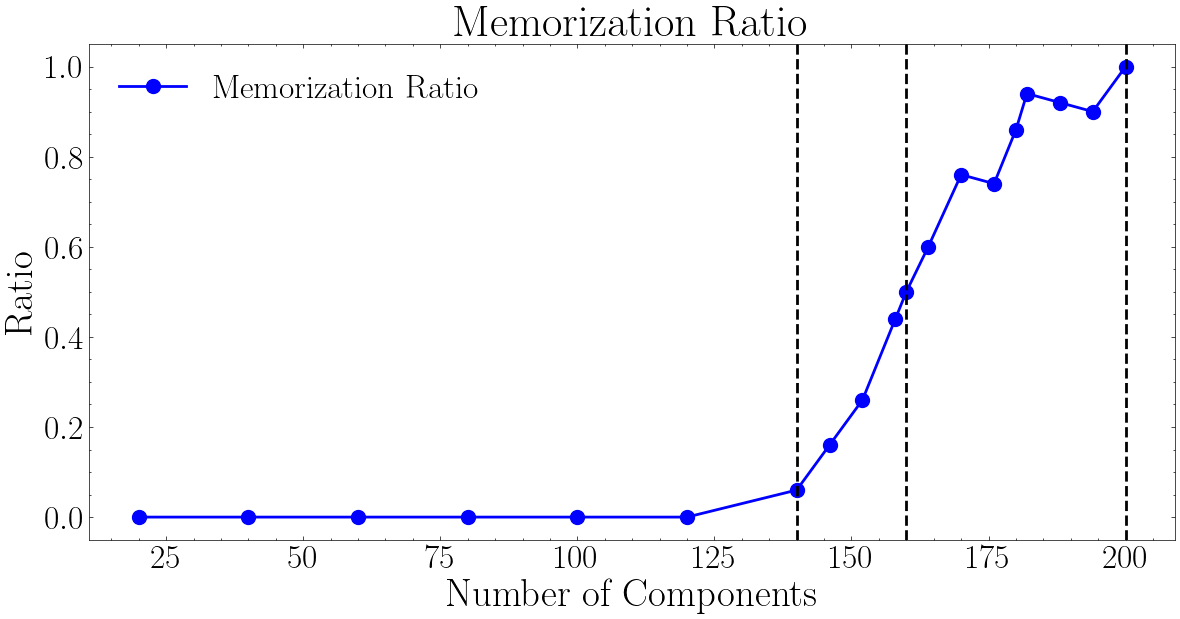

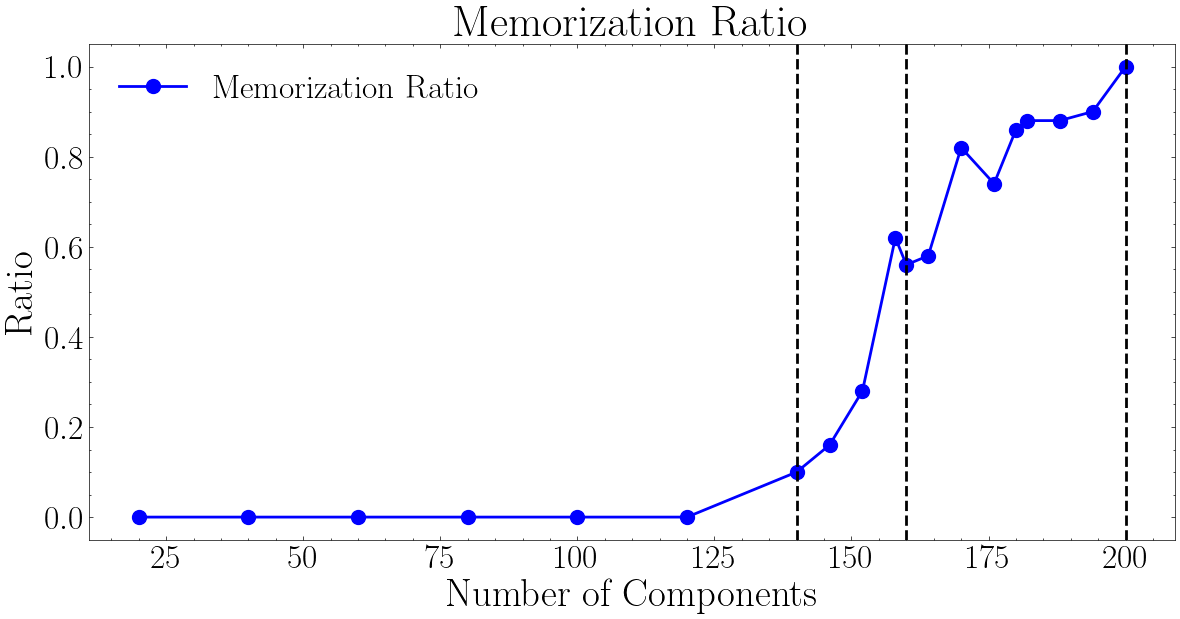

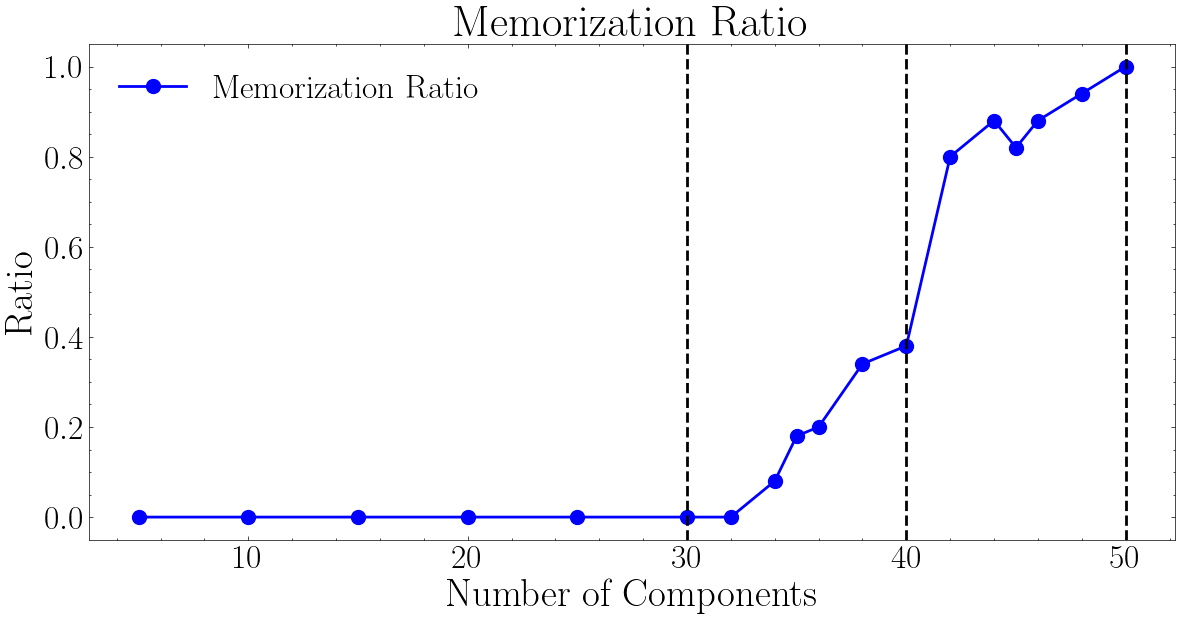

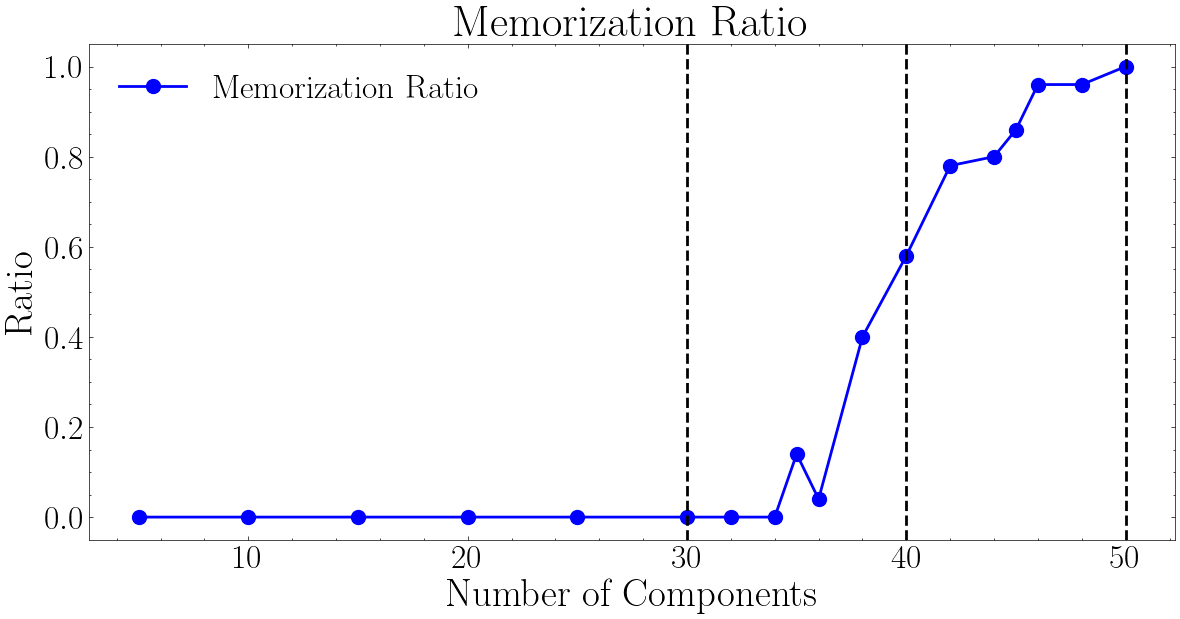

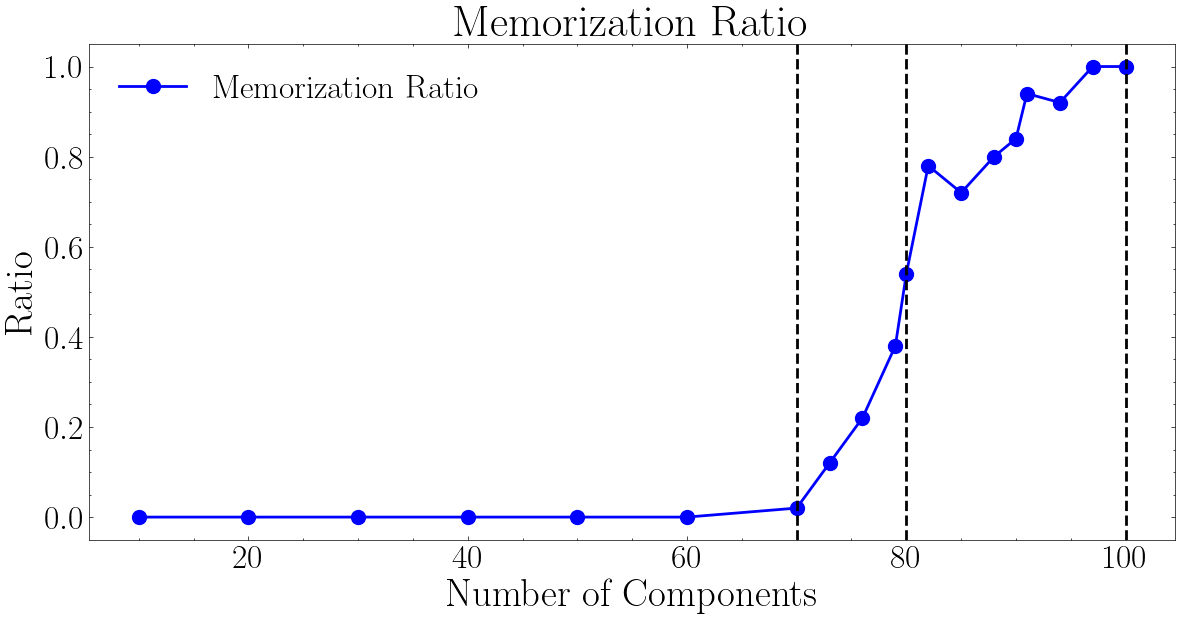

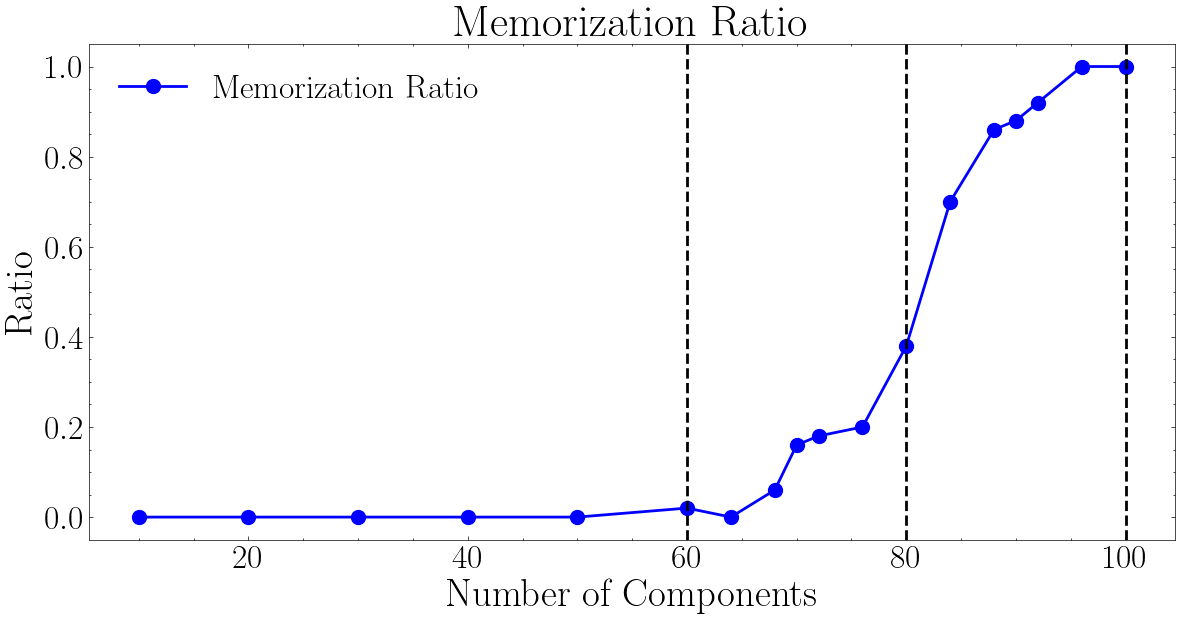

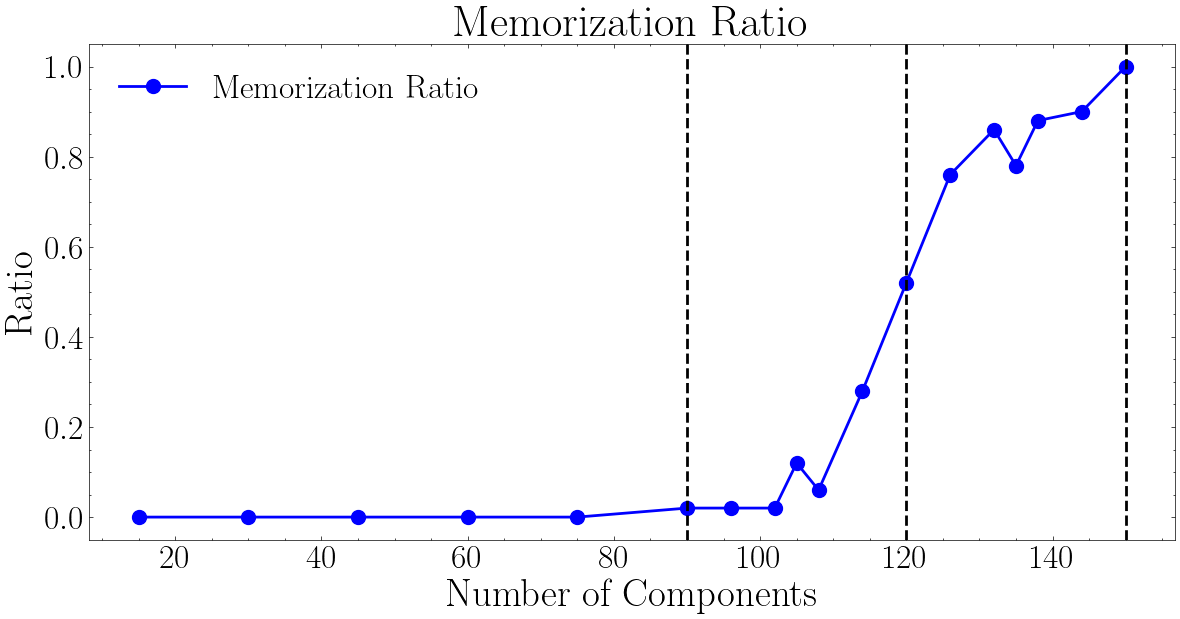

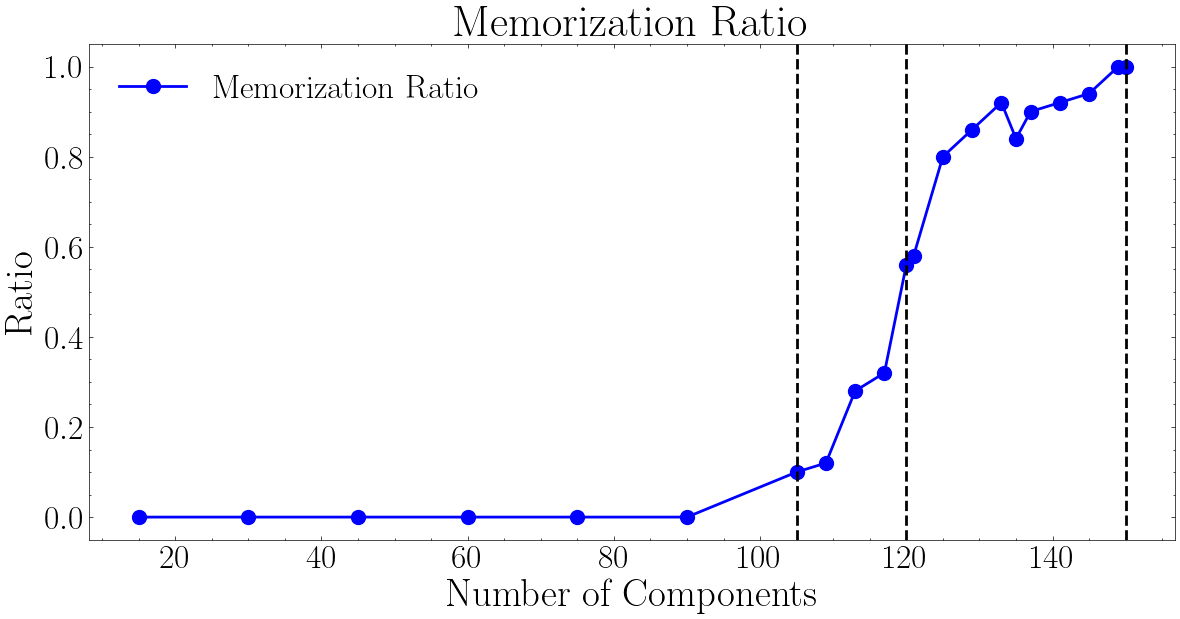

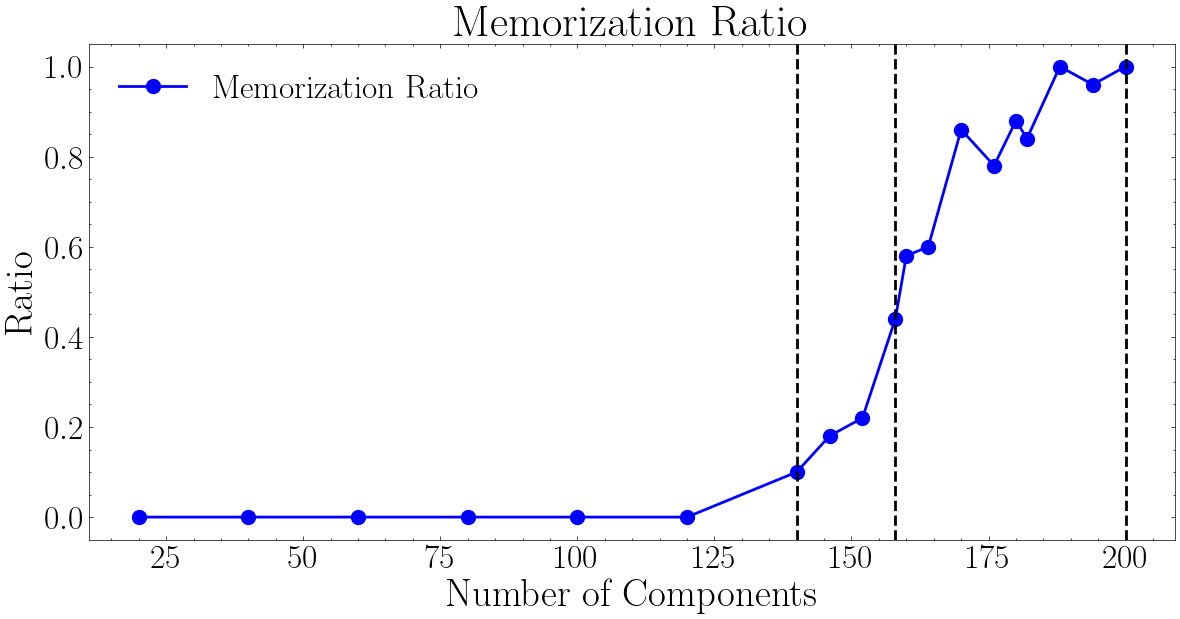

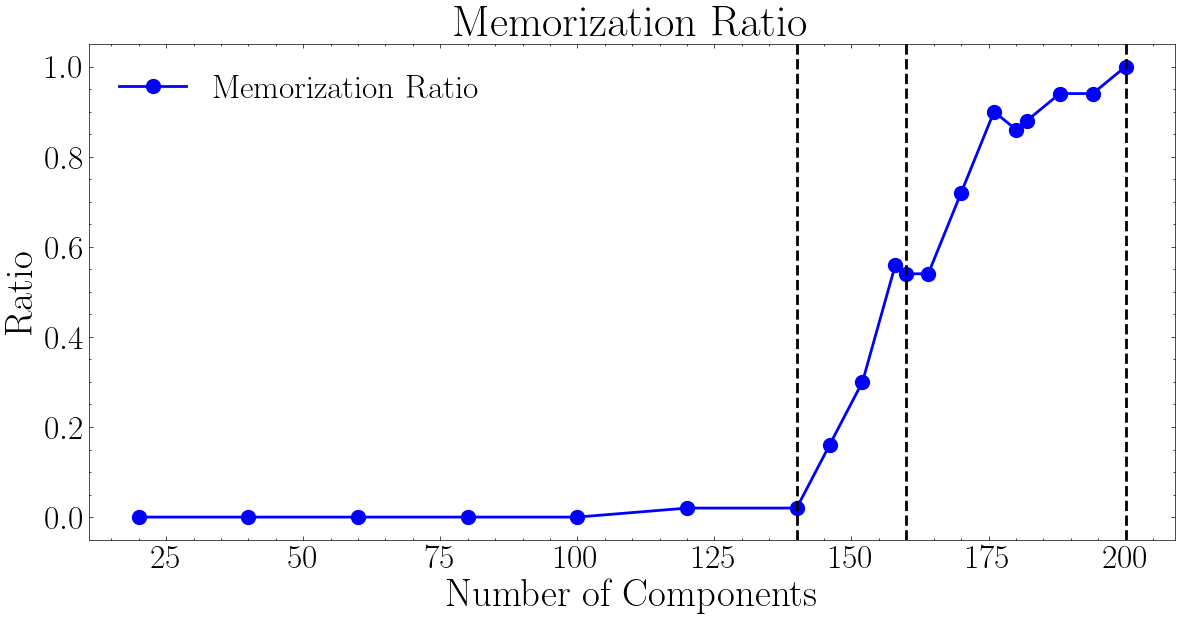

In [30]:
data_analysis_wandb_run_group = wandb_run_group + "_data_analysis"
wandb_api = wandb.Api()
lite_mode = False
for run_id in data:
    run_data = data[run_id]
    results = run_data["results"]
    config = run_data["config"]

    experiment_name = (
        config["experiment_name"]["value"] + "_data_analysis" + ("_lite" if lite_mode else "")
    )
    if not check_run_exists(wandb_api, WANDB_TEAM, WANDB_PROJECT, experiment_name):
        summary_logger = wandb.init(
            project=WANDB_PROJECT,
            entity=WANDB_TEAM,
            name=experiment_name,
            group=data_analysis_wandb_run_group,
        )

        dim = config["dim"]["value"]
        gt_var = config["gt_var_scale"]["value"]
        num_samples_train = config["num_samples_train"]["value"]
        t_min = config["t_min"]["value"]
        t_max = config["t_max"]["value"]
        num_times = config["num_times"]["value"]
        num_gt_components = config["gt_num_components"]["value"]
        num_components_to_train = sorted(config["num_components_to_train"]["value"])
        num_components_to_eval = sorted(config["num_components_to_evaluate"]["value"])

        memorization_phase_transition_start = config["memorization_phase_transition_start"]["value"]
        memorization_phase_transition_end = config["memorization_phase_transition_end"]["value"]
        memorization_phase_transition_mid = min(
            num_components_to_train,
            key=lambda m: abs(results["trained"][m]["memorization_ratio"] - (1 / 2)),
        )

        ts = UniformScheduler().get_ts(t_min=t_min, t_max=t_max, num_steps=num_times - 1)

        for i, t in enumerate(ts):
            # Crossover point between pmem and gen
            crossover_point = -1
            crossover_point_approx = -1
            for m in num_components_to_eval:
                if (
                    crossover_point == -1
                    and results["baselines"][m]["train_loss"][i]["partial_mem"]
                    < results["baselines"][m]["train_loss"][i]["ground_truth"]
                ):
                    crossover_point = m
                if (
                    crossover_point_approx == -1
                    and results["baselines"][m]["train_loss"][i]["partial_mem_approx"]
                    < results["baselines"][m]["train_loss"][i]["ground_truth_approx"]
                    and m > (1 + math.log(dim)) * num_gt_components * math.log(num_gt_components)
                ):
                    crossover_point_approx = m
                if crossover_point != -1 and crossover_point_approx != -1:
                    break

            if crossover_point == -1:
                crossover_point = num_samples_train
            if crossover_point_approx == -1:
                crossover_point_approx = num_samples_train

            plt.figure(figsize=(12, 6))
            plt.style.use("science")

            x_train = num_components_to_train
            x_eval = num_components_to_eval
            y_train = [
                results["trained"][m]["train_loss"][i]["trained"] * eps_to_x0_weights(t)
                for m in x_train
            ]
            y_pmem = [
                results["baselines"][m]["train_loss"][i]["partial_mem"] * eps_to_x0_weights(t)
                for m in x_eval
            ]
            y_gt = results["baselines"][x_eval[0]]["train_loss"][i][
                "ground_truth"
            ] * eps_to_x0_weights(t)
            y_mem = results["baselines"][x_eval[0]]["train_loss"][i][
                "memorizing"
            ] * eps_to_x0_weights(t)
            y_pmem_approx = [2 * dim * gt_var * (1 - m / num_samples_train) for m in x_eval]
            y_gt_approx = results["baselines"][x_eval[0]]["train_loss"][i][
                "ground_truth_approx"
            ] * eps_to_x0_weights(t)

            plt.plot(
                x_train,
                y_train,
                marker="o",
                markersize=10,
                linewidth=2,
                color="blue",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{train}})$",
            )
            plt.plot(
                x_eval,
                y_pmem,
                marker="o",
                linewidth=2,
                color="red",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{pmem}, M})$",
            )
            plt.axhline(
                y=y_gt,
                linestyle="--",
                linewidth=2,
                color="green",
                label=r"$\mathcal{L}_{N, t}(\theta_{\star})$",
            )
            plt.axhline(
                y=y_mem,
                linestyle="--",
                linewidth=2,
                color="red",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{mem}})$",
            )

            if not lite_mode:
                plt.plot(
                    x_eval,
                    y_pmem_approx,
                    marker="o",
                    linewidth=2,
                    color="orange",
                    label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\mathrm{pmem}, M})$",
                )
                plt.axhline(
                    y=y_gt_approx,
                    linestyle="--",
                    linewidth=2,
                    color="lime",
                    label=r"$\hat{\mathcal{L}}_{N, t}(\theta_{\star})$",
                )

                # plt.axvline(
                #     x=crossover_point, linestyle="--", linewidth=2, color="purple", label="Crossover Point"
                # )
                # plt.axvline(
                #     x=crossover_point_approx,
                #     linestyle="--",
                #     linewidth=2,
                #     color="magenta",
                #     label="Crossover Point Approximation",
                # )
                plt.axvline(
                    x=memorization_phase_transition_start,
                    linestyle="--",
                    linewidth=2,
                    color="black",
                    label="Memorization Phase Transition Start",
                )
                plt.axvline(
                    x=memorization_phase_transition_mid,
                    linestyle="--",
                    linewidth=2,
                    color="black",
                    label="Memorization Phase Transition Mid",
                )
                plt.axvline(
                    x=memorization_phase_transition_end,
                    linestyle="--",
                    linewidth=2,
                    color="black",
                    label="Memorization Phase Transition End",
                )

            plt.yscale("log")
            plt.legend(fontsize=24)
            plt.tight_layout()
            plt.title(f"Training Loss, $t={t:.3f}$", fontsize=32)
            plt.xlabel("Number of Components", fontsize=28)
            plt.ylabel("Loss", fontsize=28)
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)
            save_path = (
                data_analysis_folder
                / WANDB_TEAM
                / WANDB_PROJECT
                / (config["experiment_name"]["value"] + "_summary")
                / (
                    f"train_loss_t={t:.3f}".replace(".", "_")
                    + ("_lite" if lite_mode else "")
                    + ".png"
                )
            )
            plt.savefig(save_path)
            summary_logger.log(
                {
                    "train_loss" + ("/lite" if lite_mode else "") + f"/t={t:.3f}": wandb.Image(
                        str(save_path)
                    )
                },
                step=0,
            )
            plt.close()

            plt.figure(figsize=(12, 6))
            plt.style.use("science")

            x_train = num_components_to_train
            x_eval = num_components_to_eval
            y_train = [
                results["trained"][m]["val_loss"][i]["trained"] * eps_to_x0_weights(t)
                for m in x_train
            ]
            y_pmem = [
                results["baselines"][m]["val_loss"][i]["partial_mem"] * eps_to_x0_weights(t)
                for m in x_eval
            ]
            y_gt = results["baselines"][x_eval[0]]["val_loss"][i][
                "ground_truth"
            ] * eps_to_x0_weights(t)
            y_mem = results["baselines"][x_eval[0]]["val_loss"][i][
                "memorizing"
            ] * eps_to_x0_weights(t)

            plt.plot(
                x_train,
                y_train,
                marker="o",
                markersize=10,
                linewidth=2,
                color="blue",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{train}})$",
            )
            plt.plot(
                x_eval,
                y_pmem,
                marker="o",
                linewidth=2,
                color="red",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{pmem}, M})$",
            )
            plt.axhline(
                y=y_gt,
                linestyle="--",
                linewidth=2,
                color="green",
                label=r"$\mathcal{L}_{N, t}(\theta_{\star})$",
            )
            plt.axhline(
                y=y_mem,
                linestyle="--",
                linewidth=2,
                color="red",
                label=r"$\mathcal{L}_{N, t}(\theta_{\mathrm{mem}})$",
            )

            if not lite_mode:
                # plt.axvline(
                #     x=crossover_point, linestyle="--", linewidth=2, color="purple", label="Crossover Point"
                # )
                plt.axvline(
                    x=memorization_phase_transition_start,
                    linestyle="--",
                    linewidth=2,
                    color="black",
                    # label="Memorization Phase Transition Start",
                )
                plt.axvline(
                    x=memorization_phase_transition_mid,
                    linestyle="--",
                    linewidth=2,
                    color="black",
                    # label="Memorization Phase Transition Mid",
                )
                plt.axvline(
                    x=memorization_phase_transition_end,
                    linestyle="--",
                    linewidth=2,
                    color="black",
                    # label="Memorization Phase Transition End",
                )

            plt.yscale("log")
            plt.legend(fontsize=24)
            plt.tight_layout()
            plt.title(f"Validation Loss, $t={t:.3f}$", fontsize=32)
            plt.xlabel("Number of Components", fontsize=28)
            plt.ylabel("Loss", fontsize=28)
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)
            save_path = (
                data_analysis_folder
                / WANDB_TEAM
                / WANDB_PROJECT
                / (config["experiment_name"]["value"] + "_summary")
                / (
                    f"val_loss_t={t:.3f}".replace(".", "_")
                    + ("_lite" if lite_mode else "")
                    + ".png"
                )
            )
            plt.savefig(save_path)
            summary_logger.log(
                {
                    "val_loss" + ("/lite" if lite_mode else "") + f"/t={t:.3f}": wandb.Image(
                        str(save_path)
                    )
                },
                step=0,
            )
            plt.close()

        if not lite_mode:
            plt.figure(figsize=(12, 6))
            plt.style.use("science")

            x_train = num_components_to_train
            y_train = [results["trained"][m]["memorization_ratio"] for m in x_train]
            plt.plot(
                x_train,
                y_train,
                marker="o",
                markersize=10,
                linewidth=2,
                color="blue",
                label="Memorization Ratio",
            )
            plt.axvline(
                x=memorization_phase_transition_start,
                linestyle="--",
                linewidth=2,
                color="black",
                # label="Memorization Phase Transition Start",
            )
            plt.axvline(
                x=memorization_phase_transition_mid,
                linestyle="--",
                linewidth=2,
                color="black",
                # label="Memorization Phase Transition Mid",
            )
            plt.axvline(
                x=memorization_phase_transition_end,
                linestyle="--",
                linewidth=2,
                color="black",
                # label="Memorization Phase Transition End",
            )
            plt.ylabel(" Ratio", fontsize=28)
            plt.xlabel("Number of Components", fontsize=28)
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)
            plt.legend(fontsize=24)
            plt.tight_layout()
            plt.title("Memorization Ratio", fontsize=32)

        summary_logger.finish()
